# **CSN - Machine Learning Project**
## Anomaly Detection in Industry
### Team Members: Thanuskant Thangavadivel, Julia Montes, Thais Farias




In [7]:
import sklearn
assert sklearn.__version__ >= "1.0"
# %pip install -q -U scikit-learn>=1.0.0
import pandas as pd
import missingno as msno
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import average_precision_score, precision_score, \
                        recall_score, precision_recall_curve, roc_curve, \
                        roc_auc_score
from sklearn.metrics import log_loss
! wget https://raw.githubusercontent.com/andreaaraldo/machine-learning-for-networks/master/course_library/visualization.py
import visualization
!pip install category_encoders
from sklearn.preprocessing import StandardScaler
import category_encoders as ce
import math
import os
import sys
from pandas.plotting import scatter_matrix
!wget https://raw.githubusercontent.com/andreaaraldo/machine-learning-for-networks/master/course_library/feature_engineering.py
import feature_engineering
import random
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import IsolationForest
from sklearn.metrics import average_precision_score, precision_score, \
                        recall_score, precision_recall_curve, roc_curve, \
                        roc_auc_score
from sklearn.utils import shuffle
! wget https://raw.githubusercontent.com/andreaaraldo/machine-learning-for-networks/master/course_library/andrea_models.py
! wget https://raw.githubusercontent.com/andreaaraldo/machine-learning-for-networks/master/course_library/visualization.py
from andrea_models import subsample
from visualization import silhouette_diagram, plot_conf_mat, \
                      false_positive_rate, evaluate_anomaly_detector
!pip install ipython-autotime
%load_ext autotime
from imblearn.over_sampling import SMOTE





--2023-11-09 01:56:04--  https://raw.githubusercontent.com/andreaaraldo/machine-learning-for-networks/master/course_library/visualization.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13023 (13K) [text/plain]
Saving to: ‘visualization.py’

visualization.py    100%[===================>]  12.72K  --.-KB/s    in 0s      

2023-11-09 01:56:04 (27.6 MB/s) - ‘visualization.py’ saved [13023/13023]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.5 MB/s eta 0:00:00
--2023-11-09 01:56:12--  https://raw.githubusercontent.com/andreaaraldo/machine-learning-for-networks/master/course_library/feature_engineering.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.g

This project seeks to create a predictive model that can preemptively detect defects in starter motor production, optimizing the quality control process by identifying and addressing issues at an earlier stage in the production line.



##Import data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
file_path = '/content/drive/MyDrive/Colab_Notebooks/traininginputs.csv'
df = pd.read_csv(file_path)
X_train = df
X_train.drop("PROC_TRACEINFO",axis=1,inplace=True)

time: 683 ms (started: 2023-11-09 01:56:33 +00:00)


In [10]:
file_path = '/content/drive/MyDrive/Colab_Notebooks/trainingoutput.csv'
df = pd.read_csv(file_path)
y_train = df
y_train.drop("PROC_TRACEINFO",axis=1,inplace=True)

time: 819 ms (started: 2023-11-09 01:56:39 +00:00)


Our data is presented as 3 files: traininginputs, trainingoutput and testinginput. We choose to use only the training data and then, split it in order to get the test data set.

In [9]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
time: 1.55 s (started: 2023-11-09 01:56:37 +00:00)


In [11]:
file_path = '/content/drive/MyDrive/Colab_Notebooks/all-csv-files.csv'
df = pd.read_csv(file_path)


time: 952 ms (started: 2023-11-09 01:56:43 +00:00)


##Preprocess data

Concatenating training input and output

In [13]:
df = pd.concat([X_train, y_train], axis=1)

time: 4.16 ms (started: 2023-11-09 01:56:50 +00:00)


In [14]:
df.head()

OP070_V_1_angle_value  OP090_SnapRingPeakForce_value  \
0                  180.4                         190.51   
1                  138.7                         147.70   
2                  180.9                         150.87   
3                  173.5                         159.56   
4                  174.5                         172.29   

   OP070_V_2_angle_value  OP120_Rodage_I_mesure_value  \
0                  173.1                       113.64   
1                  163.5                       109.77   
2                  181.2                       109.79   
3                  151.8                       113.25   
4                  177.5                       112.88   

   OP090_SnapRingFinalStroke_value  OP110_Vissage_M8_torque_value  \
0                            12.04                          12.16   
1                            12.12                          12.19   
2                            11.86                          12.24   
3                            11.82                          12.35   
4                            12.07                          12.19   

   OP100_Capuchon_insertion_mesure  OP120_Rodage_U_mesure_value  \
0                              NaN                        11.97   
1                             0.39                        11.97   
2                              NaN                        11.97   
3                             0.39                        11.97   
4                              NaN                        11.97   

   OP070_V_1_torque_value  OP090_StartLinePeakForce_value  \
0                    6.62                           26.37   
1                    6.41                           21.03   
2                    6.62                           25.81   
3                    6.62                           24.62   
4                    6.62                           29.22   

   OP110_Vissage_M8_angle_value  OP090_SnapRingMidPointForce_val  \
0                          18.8                           109.62   
1                          18.5                           105.48   
2                          17.5                           100.03   
3                          15.6                           104.94   
4                          33.6                            99.19   

   OP070_V_2_torque_value  Binar OP130_Resultat_Global_v  
0                    6.60                              0  
1                    6.40                              0  
2                    6.61                              0  
3                    6.61                              0  
4                    6.61                              0

time: 85.1 ms (started: 2023-11-09 01:56:50 +00:00)


In [ ]:
n

###Correlation between features

In [15]:
feats = feature_engineering.get_features_correlated_to_target(
        df, target_feature='Binar OP130_Resultat_Global_v'
        )
feats

Binar OP130_Resultat_Global_v      1.00
OP070_V_1_torque_value            -0.04
OP070_V_2_torque_value            -0.04
OP100_Capuchon_insertion_mesure    0.03
OP090_SnapRingFinalStroke_value    0.02
OP070_V_1_angle_value             -0.01
OP090_SnapRingPeakForce_value     -0.01
OP070_V_2_angle_value             -0.01
OP120_Rodage_U_mesure_value       -0.01
OP090_StartLinePeakForce_value     0.01
OP110_Vissage_M8_angle_value       0.01
OP090_SnapRingMidPointForce_val    0.01
OP120_Rodage_I_mesure_value        0.00
OP110_Vissage_M8_torque_value     -0.00
Name: Binar OP130_Resultat_Global_v, dtype: float64

time: 70.7 ms (started: 2023-11-09 01:56:50 +00:00)


The previous correlation chart, suggests that the linear relationships between the features and the target label may not be strong. However, this does not necessarily mean that the features are not informative for predicting the target variable.

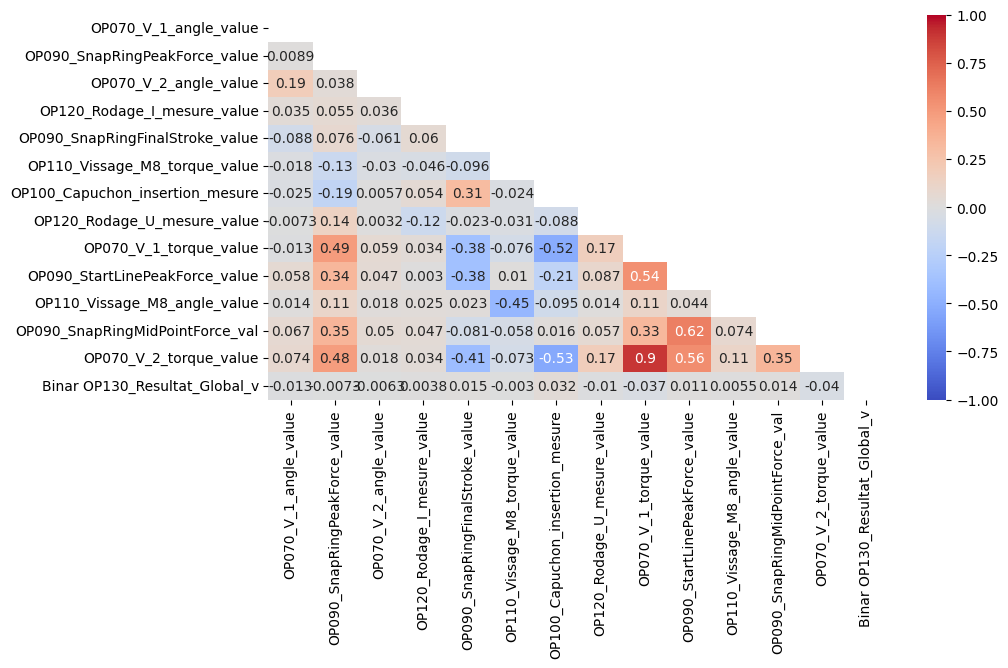

time: 1.83 s (started: 2023-11-09 01:56:50 +00:00)


In [16]:
visualization.plot_corr(df, width=10, height=5,
                        print_value=True)

### Feature Distribution


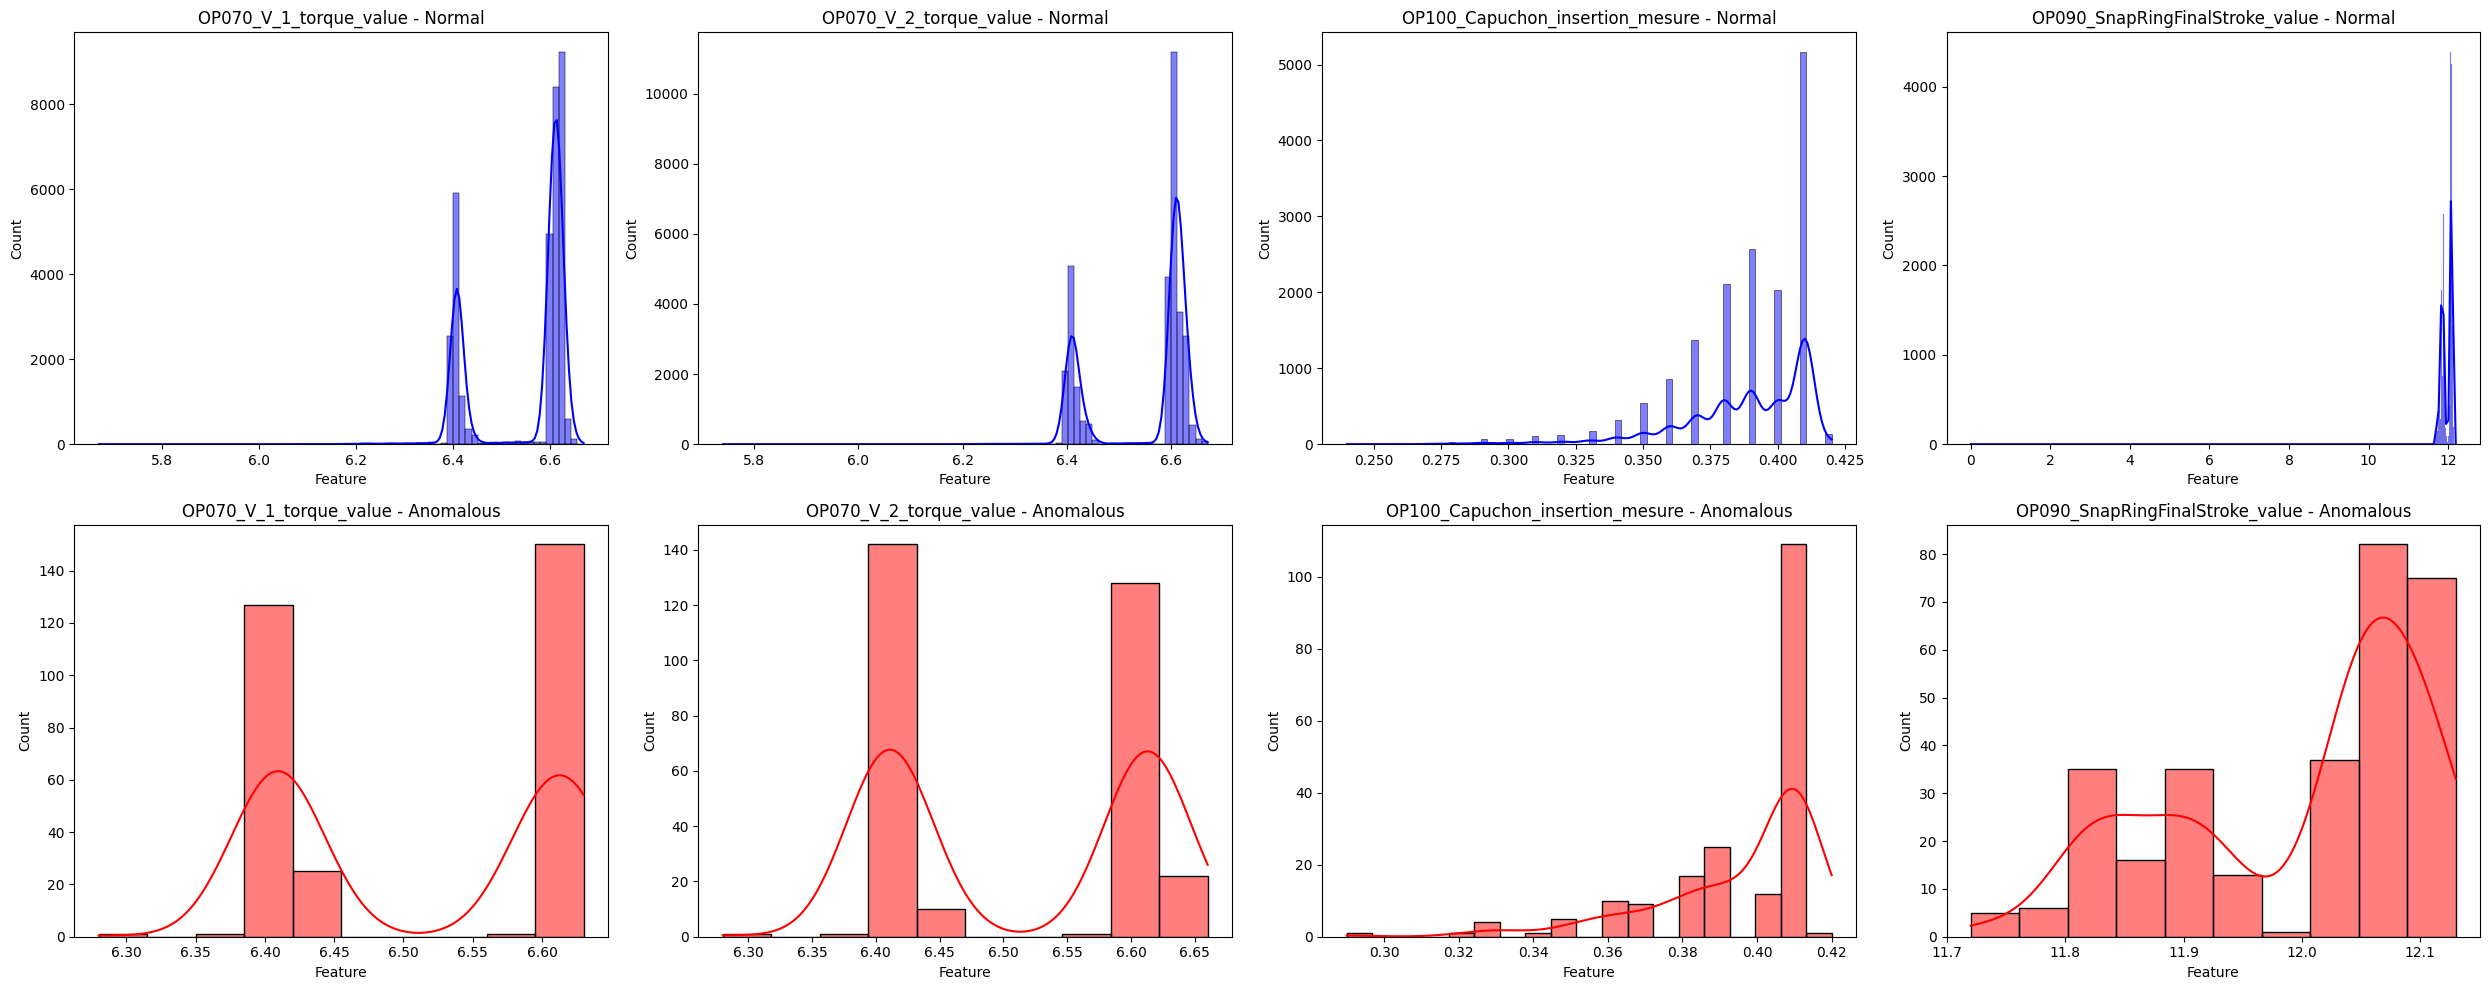

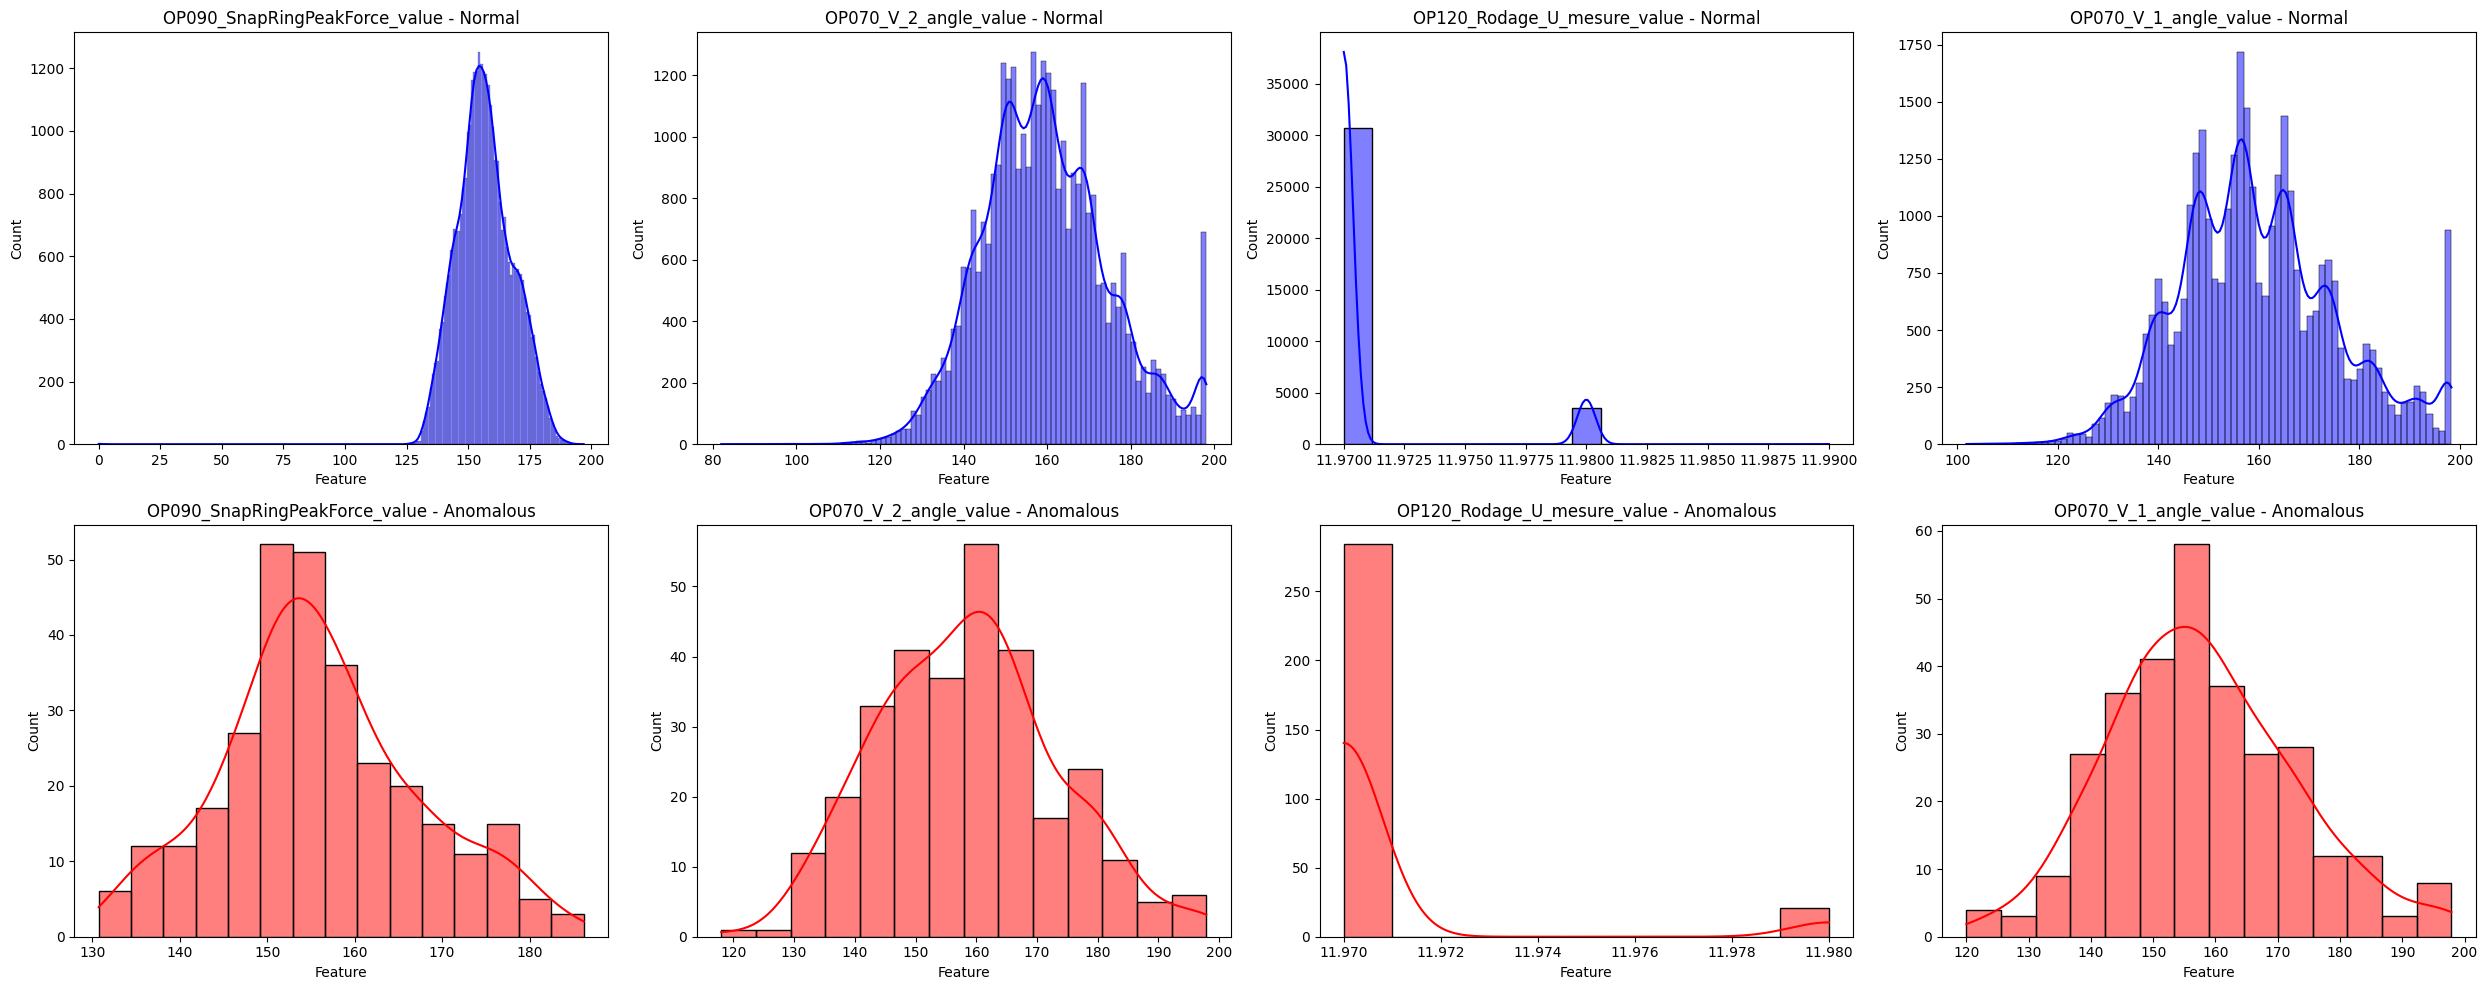

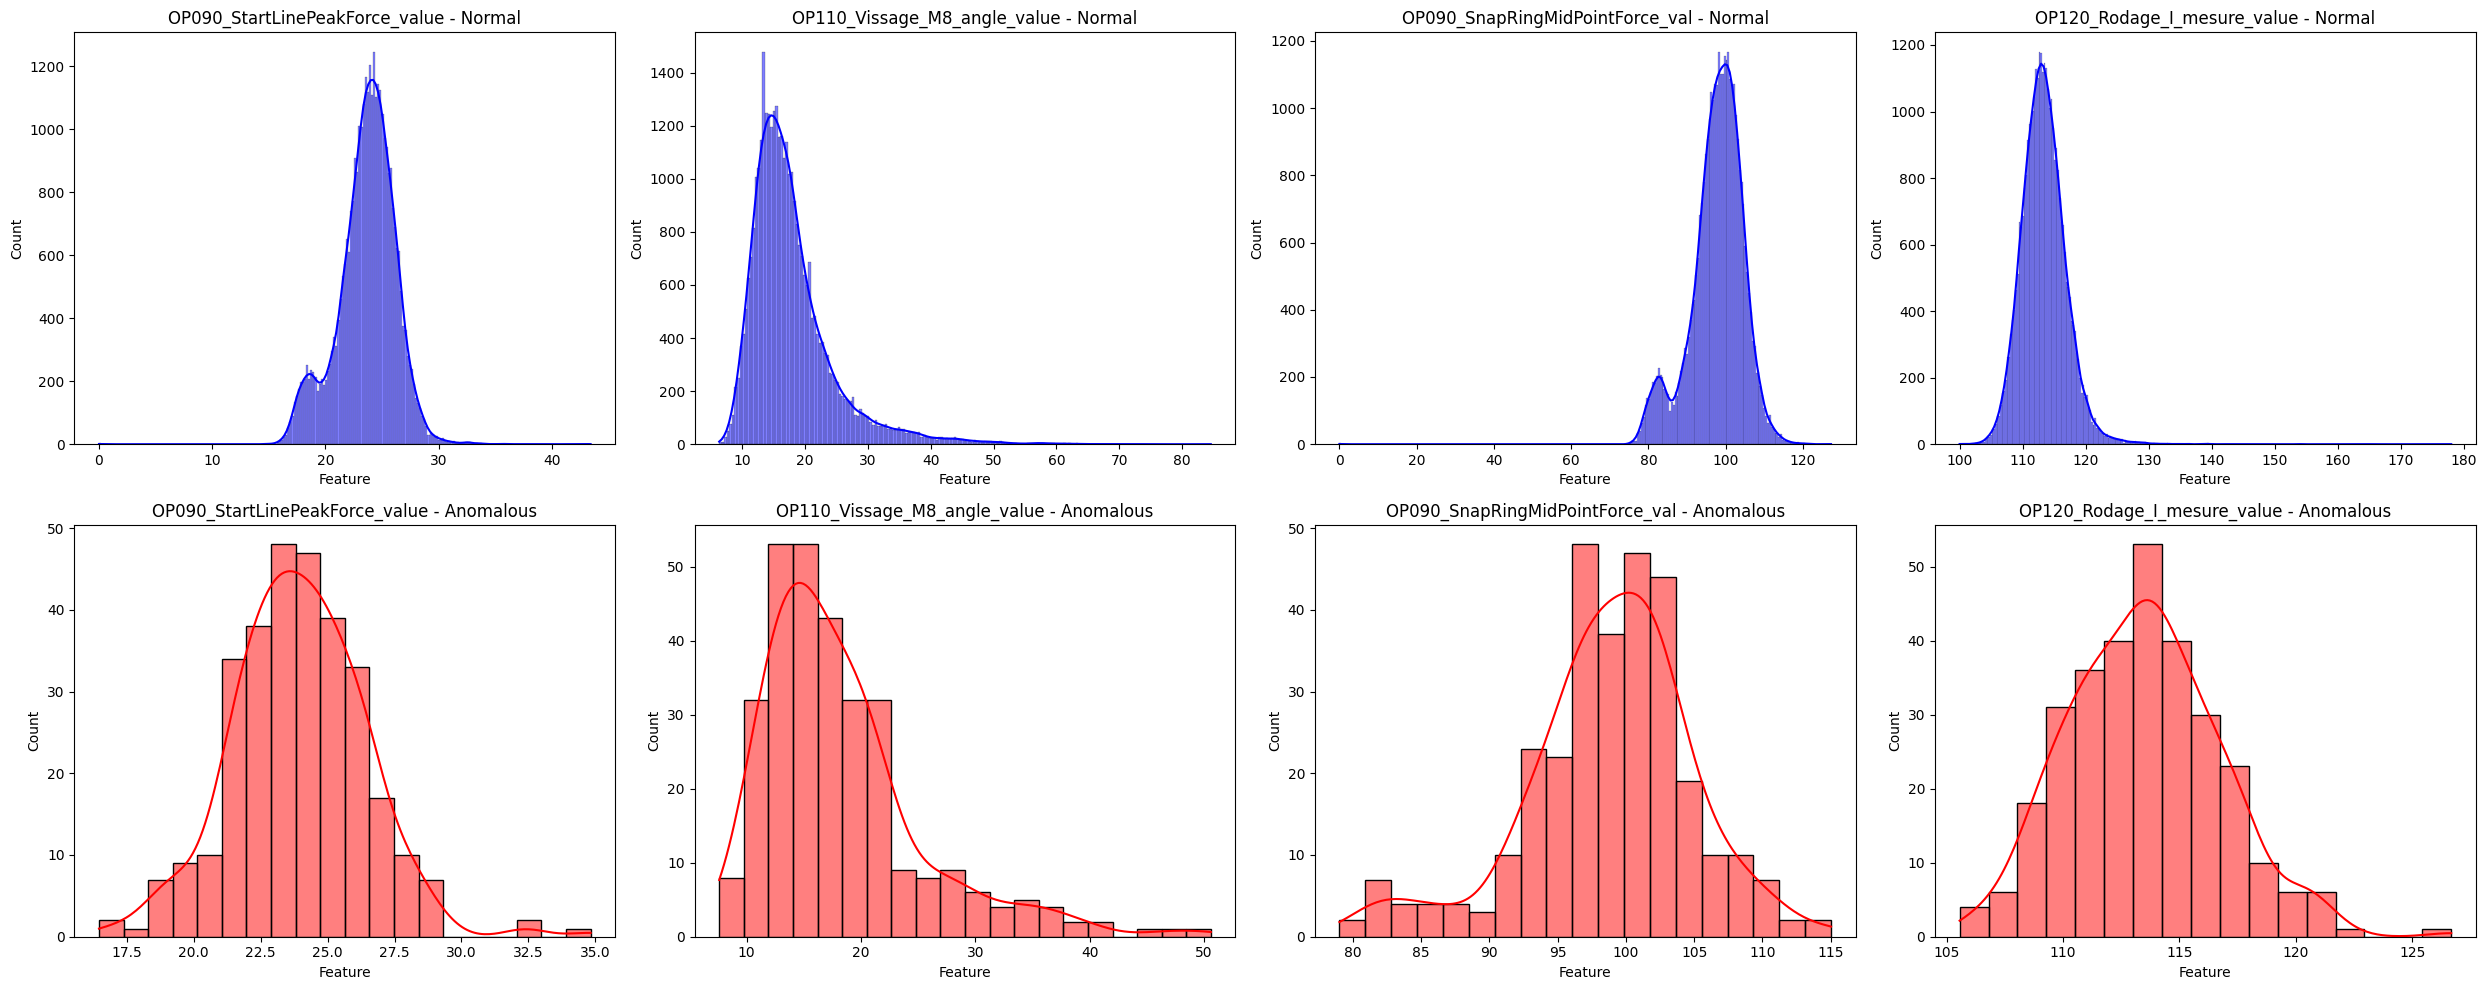

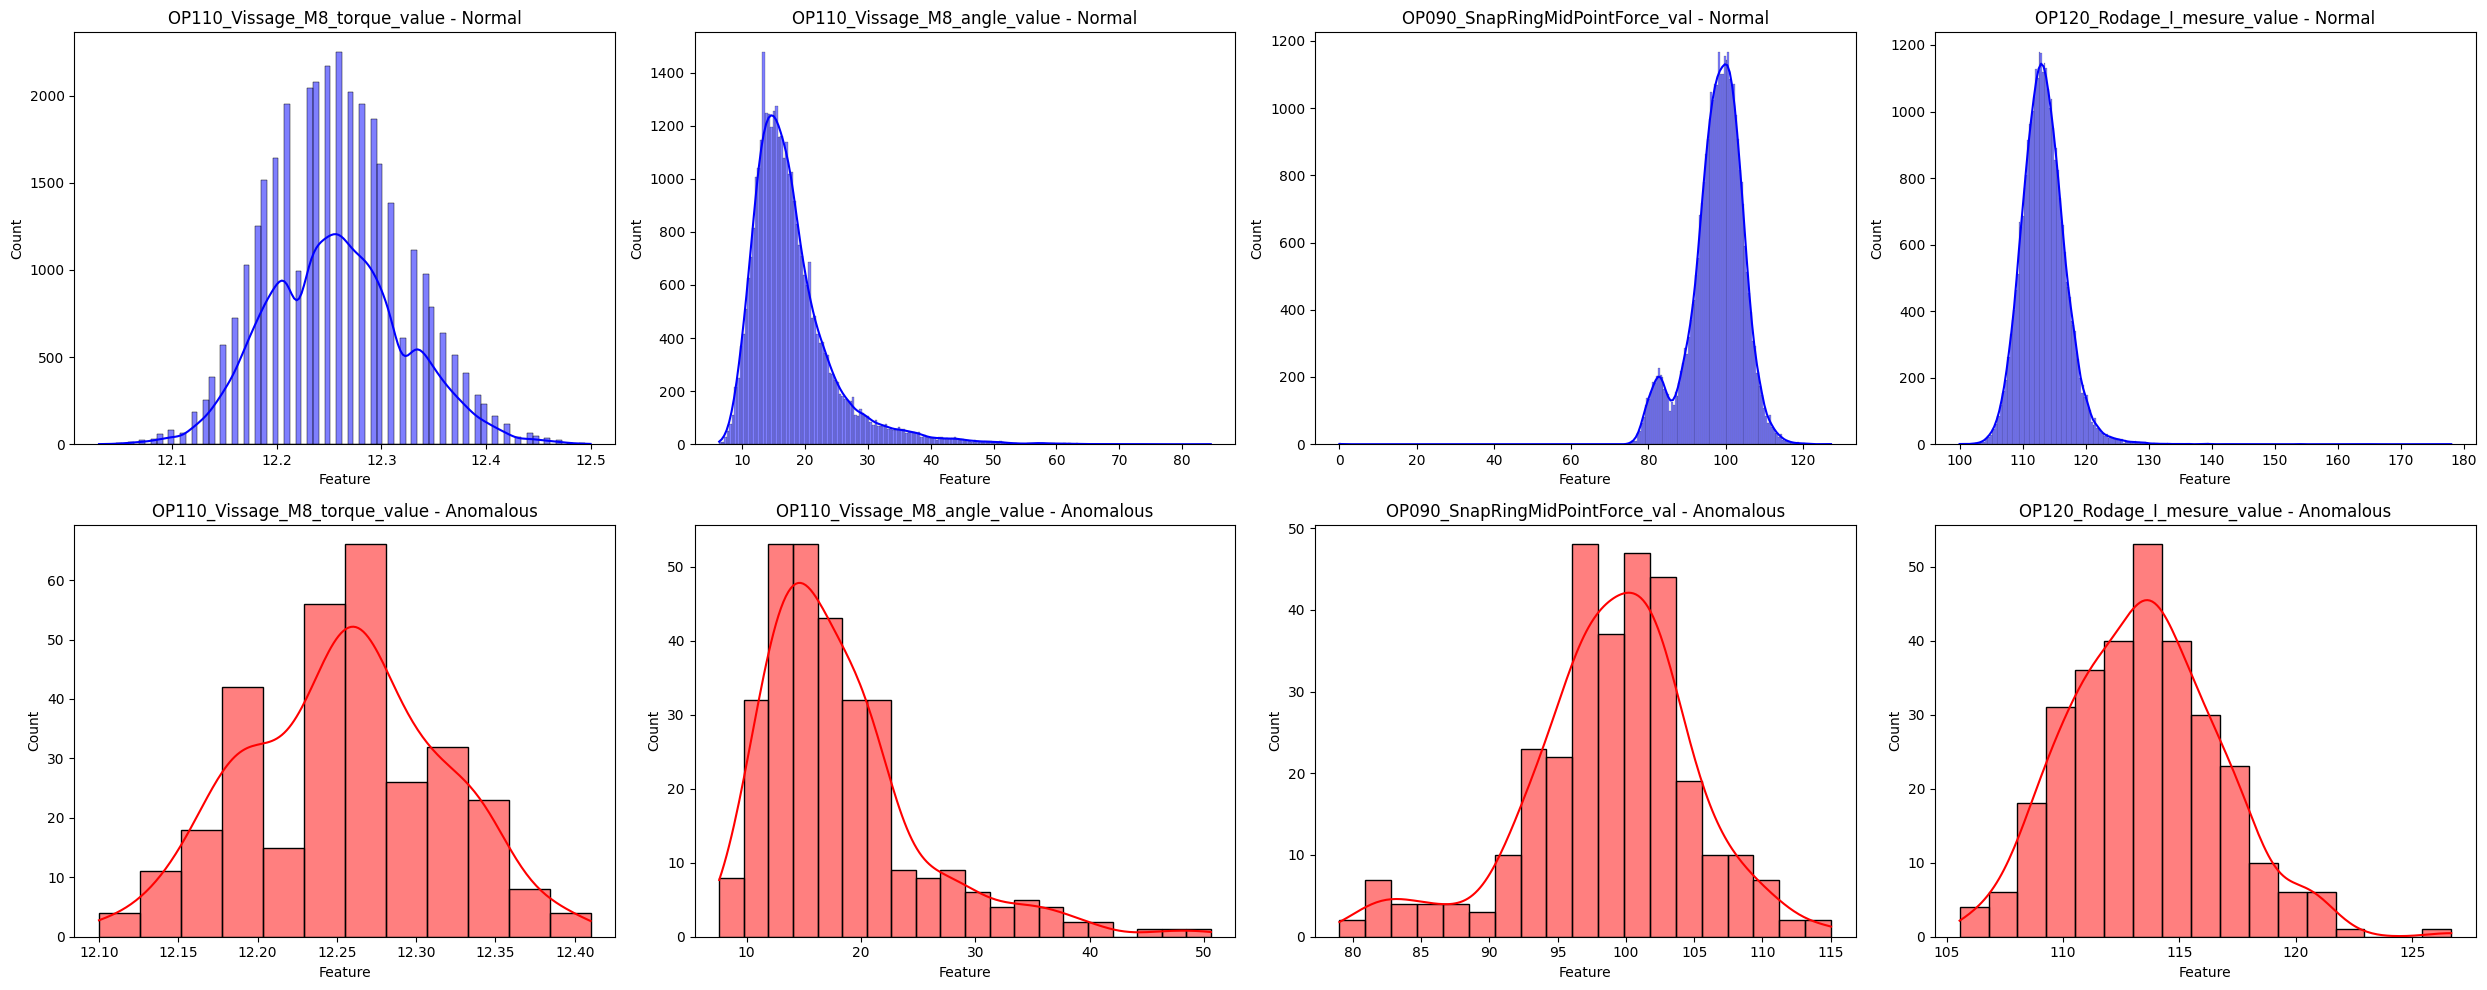

time: 26 s (started: 2023-11-09 01:56:52 +00:00)


In [17]:
def plot_hist(features, df):
    # Number of rows and columns for the subplots
    rows = 2 if len(features) > 1 else 1  # Set rows to 1 if there's only one feature
    cols = len(features)

    # Create a figure and subplots
    fig, axes = plt.subplots(rows, cols, figsize=(25, 10))

    # Iterate over the features and create subplots for '0' and '1'
    for i, feature in enumerate(features):
        for row in range(rows):
            ax = axes[row, i]

            # Determine the color based on '0' (normal) or '1' (anomalous)
            color = 'blue' if row == 0 else 'red'

            # Create a subplot for the data
            sns.histplot(data=df[df['Binar OP130_Resultat_Global_v'] == row][feature], kde=True, color=color, ax=ax)
            ax.set_title(f'{feature} - {"Normal" if row == 0 else "Anomalous"}')
            ax.set_xlabel('Feature')
            ax.set_ylabel('Count')

    # Adjust the layout
    plt.tight_layout()
    plt.show()

# List of features you want to plot
features1 = [
    'OP070_V_1_torque_value',
    'OP070_V_2_torque_value',
    'OP100_Capuchon_insertion_mesure',
    'OP090_SnapRingFinalStroke_value',
]

features2 = [
    'OP090_SnapRingPeakForce_value',
    'OP070_V_2_angle_value',
    'OP120_Rodage_U_mesure_value',
    'OP070_V_1_angle_value',
]

features3 = [
    'OP090_StartLinePeakForce_value',
    'OP110_Vissage_M8_angle_value',
    'OP090_SnapRingMidPointForce_val',
    'OP120_Rodage_I_mesure_value',
]

features4 = [
    'OP110_Vissage_M8_torque_value',
    'OP110_Vissage_M8_angle_value',
    'OP090_SnapRingMidPointForce_val',
    'OP120_Rodage_I_mesure_value',
]



plot_hist(features1, df)
plot_hist(features2, df)
plot_hist(features3, df)
plot_hist(features4, df)


### Box plot

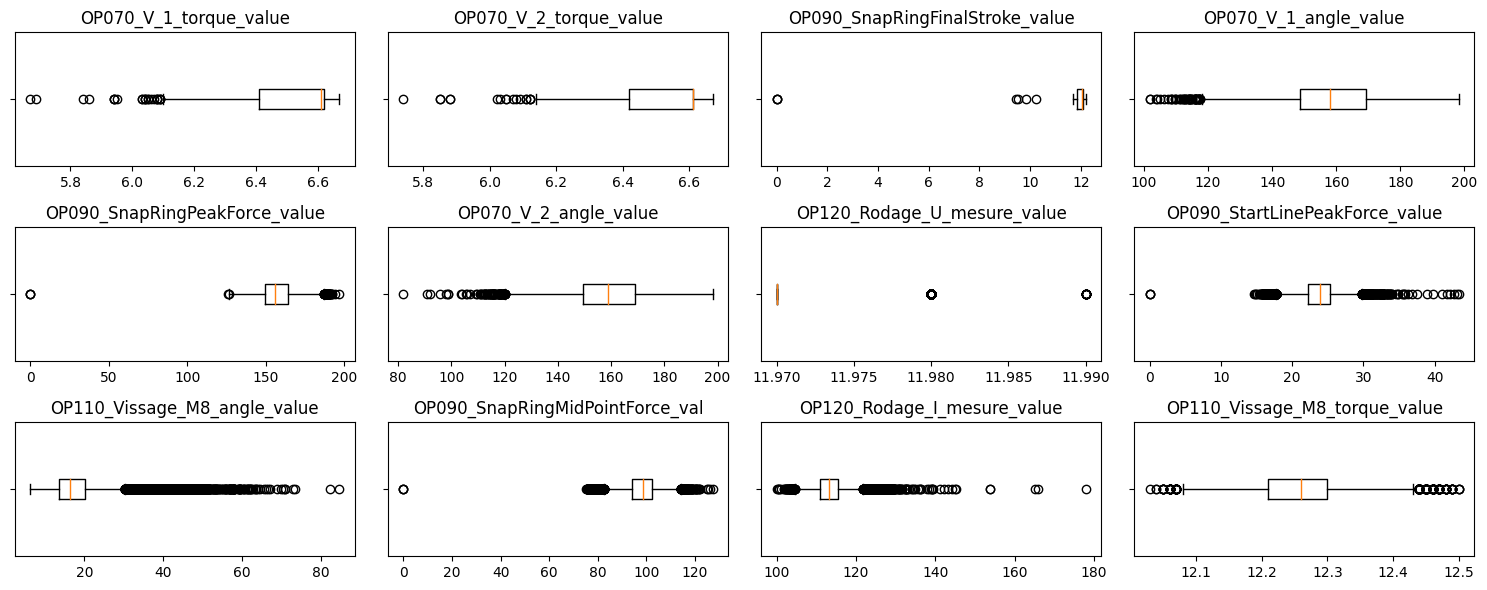

time: 1.52 s (started: 2023-11-09 01:57:18 +00:00)


In [18]:
features_to_plot = [
    'OP070_V_1_torque_value',
    'OP070_V_2_torque_value',
    'OP090_SnapRingFinalStroke_value',
    'OP070_V_1_angle_value',
    'OP090_SnapRingPeakForce_value',
    'OP070_V_2_angle_value',
    'OP120_Rodage_U_mesure_value',
    'OP090_StartLinePeakForce_value',
    'OP110_Vissage_M8_angle_value',
    'OP090_SnapRingMidPointForce_val',
    'OP120_Rodage_I_mesure_value',
    'OP110_Vissage_M8_torque_value'
]
num_rows = 3  # You can adjust the number of rows

# Calculate the number of subplots per row
num_subplots_per_row = len(features_to_plot) // num_rows

# Create a large figure with subplots
fig, axes = plt.subplots(num_rows, num_subplots_per_row, figsize=(15, 6))

# Loop through rows and features to create box plots
for i in range(num_rows):
    for j in range(num_subplots_per_row):
        feature_idx = i * num_subplots_per_row + j
        if feature_idx < len(features_to_plot):
            ax = axes[i, j]
            ax.boxplot(df[features_to_plot[feature_idx]], vert=False)
            ax.set_title(features_to_plot[feature_idx])
            ax.set_yticklabels([])  # Remove y-axis labels to save space


plt.tight_layout()


plt.show()

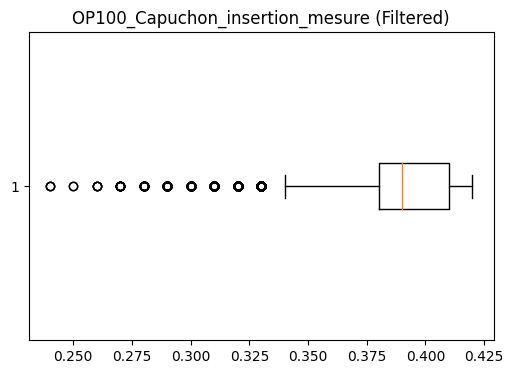

time: 198 ms (started: 2023-11-09 01:57:20 +00:00)


In [19]:
# Filter missing values and create a copy
df_filtered = df[df['OP100_Capuchon_insertion_mesure'].notna()].copy()

# Create a box plot of the filtered data
plt.figure(figsize=(6, 4))
plt.boxplot(df_filtered['OP100_Capuchon_insertion_mesure'], vert=False)
plt.title('OP100_Capuchon_insertion_mesure (Filtered)')
plt.show()

### Missing values

In [20]:
df.columns[df.isnull().any()].tolist()

['OP100_Capuchon_insertion_mesure']

time: 6.03 ms (started: 2023-11-09 01:57:20 +00:00)


There are missing values on the OP100_Capuchon_insertion_mesure feature

In [21]:
print("NaN of OP100_Capuchon_insertion_mesure = ", df['OP100_Capuchon_insertion_mesure'].isna().sum() )

NaN of OP100_Capuchon_insertion_mesure =  18627
time: 1.59 ms (started: 2023-11-09 01:57:20 +00:00)


<Axes: >

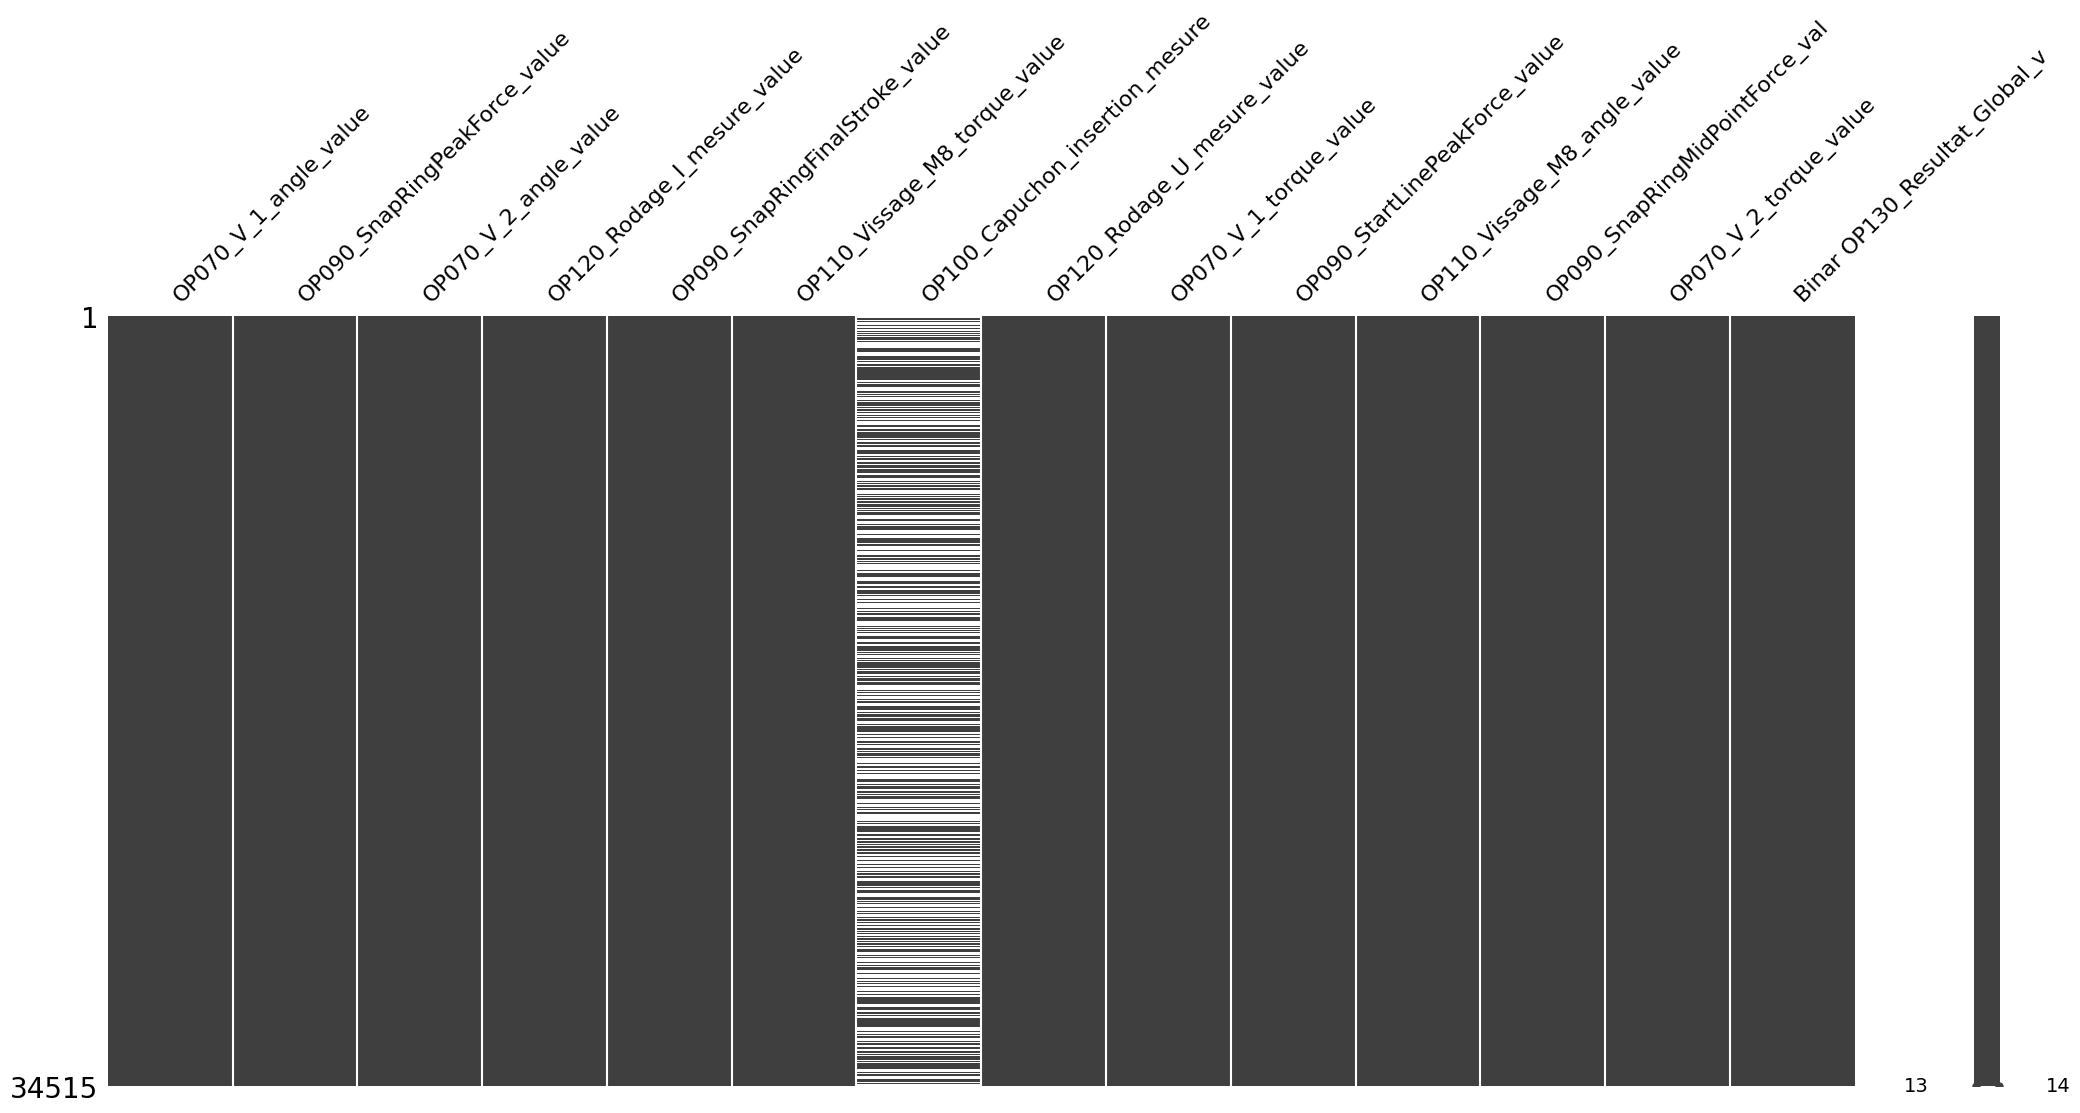

time: 994 ms (started: 2023-11-09 01:57:20 +00:00)


In [22]:
msno.matrix(df)

The amount of missing data in the column is significant (~54%), so it won't be a good idea to input values. We will investigate whether the missing data is correlated with the motor failure before deciding which strategy to apply for handling this missing value.

####Invesigate if the missing data is correlated with the motor failure

Add a flag column (0 if the value is present, 1 if not in the feature of interest)

In [23]:
df['flag_column'] = df['OP100_Capuchon_insertion_mesure'].isnull().astype(int)

time: 3.99 ms (started: 2023-11-09 01:57:21 +00:00)


In [24]:
result = pd.concat([df['OP100_Capuchon_insertion_mesure'], df['flag_column']], axis=1)
print(result)

       OP100_Capuchon_insertion_mesure  flag_column
0                                  NaN            1
1                                 0.39            0
2                                  NaN            1
3                                 0.39            0
4                                  NaN            1
...                                ...          ...
34510                              NaN            1
34511                             0.41            0
34512                              NaN            1
34513                              NaN            1
34514                              NaN            1

[34515 rows x 2 columns]
time: 7.7 ms (started: 2023-11-09 01:57:21 +00:00)


Calculate the number of rows with missing values and without missing values

In [25]:
missing_count = df['flag_column'].sum()
complete_count = len(df) - missing_count

print(f'Rows with missing values: {missing_count}')
print(f'Complete rows: {complete_count}')

Rows with missing values: 18627
Complete rows: 15888
time: 2.99 ms (started: 2023-11-09 01:57:21 +00:00)


In this analysis, we aim to assess the significance of missing data in the 'OP100_Capuchon_insertion_mesure' column concerning our goal of predicting motor failures at startup.

This will help to determine if there's a significant association between the presence or absence of missing data  in the 'OP100_Capuchon_insertion_mesure' column and the occurrence of motor failures.

In [26]:
# Calculate the percentage when "Binar_OP130_Resultat_Global_v" is 1 and "flag" is 1
result_is_1 = df['Binar OP130_Resultat_Global_v'] == 1
flag_is_1 = df['flag_column'] == 1

percentage_result_and_flag_1 = (result_is_1 & flag_is_1).sum() / result_is_1.sum() * 100

percentage_result_and_flag_1

36.0655737704918

time: 10.3 ms (started: 2023-11-09 01:57:21 +00:00)


36% of the time that the motors fails, there is a missing data on OP100_Capuchon_insertion_mesure.

We chose to keep the flag column and drop the OP100_Capuchon_insertion_mesure to maintain data completeness, context, and integrity, ensuring transparency in our analysis. While it didn't directly impact our initial models, it may prove valuable for future insights and anomaly detection.


In [27]:
df_anomaly = df
df = df.drop(columns=["OP100_Capuchon_insertion_mesure",])

time: 3.49 ms (started: 2023-11-09 01:57:21 +00:00)


Not use of flag column

In [28]:
df_dropped = df.drop(columns=["flag_column"])
df_train_dropped, df_test_dropped = train_test_split(df_dropped, test_size=0.3,
                                    shuffle=True, random_state=5)


time: 16.7 ms (started: 2023-11-09 01:57:21 +00:00)


## Drop features that are very srtongly correlated

In [30]:
df_dpcorr = df.drop(columns=['OP070_V_1_torque_value'])



time: 4.23 ms (started: 2023-11-09 01:57:38 +00:00)


## Separate X from Y


In [31]:
# Separate target variable Y from features X
features_list = list(df_dropped.columns[0:-1])
target_variable = 'Binar OP130_Resultat_Global_v'

X_dropped = df_dropped.loc[:,features_list]
y_dropped = df_dropped.loc[:,target_variable]

time: 4.54 ms (started: 2023-11-09 01:57:40 +00:00)


In [32]:
X_dropped

OP070_V_1_angle_value  OP090_SnapRingPeakForce_value  \
0                      180.4                         190.51   
1                      138.7                         147.70   
2                      180.9                         150.87   
3                      173.5                         159.56   
4                      174.5                         172.29   
...                      ...                            ...   
34510                  158.2                         168.40   
34511                  139.4                         146.24   
34512                  165.5                         157.34   
34513                  152.4                         165.07   
34514                  197.8                         150.37   

       OP070_V_2_angle_value  OP120_Rodage_I_mesure_value  \
0                      173.1                       113.64   
1                      163.5                       109.77   
2                      181.2                       109.79   
3                      151.8                       113.25   
4                      177.5                       112.88   
...                      ...                          ...   
34510                  180.6                       110.65   
34511                  154.5                       108.14   
34512                  149.8                       112.77   
34513                  140.0                       111.19   
34514                  190.3                       113.81   

       OP090_SnapRingFinalStroke_value  OP110_Vissage_M8_torque_value  \
0                                12.04                          12.16   
1                                12.12                          12.19   
2                                11.86                          12.24   
3                                11.82                          12.35   
4                                12.07                          12.19   
...                                ...                            ...   
34510                            11.88                          12.23   
34511                            12.04                          12.27   
34512                            12.09                          12.17   
34513                            12.06                          12.34   
34514                            11.84                          12.23   

       OP120_Rodage_U_mesure_value  OP070_V_1_torque_value  \
0                            11.97                    6.62   
1                            11.97                    6.41   
2                            11.97                    6.62   
3                            11.97                    6.62   
4                            11.97                    6.62   
...                            ...                     ...   
34510                        11.98                    6.61   
34511                        11.97                    6.41   
34512                        11.97                    6.62   
34513                        11.97                    6.60   
34514                        11.97                    6.47   

       OP090_StartLinePeakForce_value  OP110_Vissage_M8_angle_value  \
0                               26.37                          18.8   
1                               21.03                          18.5   
2                               25.81                          17.5   
3                               24.62                          15.6   
4                               29.22                          33.6   
...                               ...                           ...   
34510                           24.03                          14.8   
34511                           21.52                          15.5   
34512                           22.65                          24.4   
34513                           20.77                          13.6   
34514                           26.43                          21.5   

       OP090_SnapRingMidPointForce_val  OP

time: 24.2 ms (started: 2023-11-09 01:57:42 +00:00)


In [33]:
# Separate target variable Y from features X
features_list = list(df_dpcorr.columns[0:-1])
target_variable = 'Binar OP130_Resultat_Global_v'

X_dpcorr = df_dpcorr.loc[:,features_list]
y_dpcorr = df_dpcorr.loc[:,target_variable]

time: 5.05 ms (started: 2023-11-09 01:57:44 +00:00)


In [34]:
X_dpcorr

OP070_V_1_angle_value  OP090_SnapRingPeakForce_value  \
0                      180.4                         190.51   
1                      138.7                         147.70   
2                      180.9                         150.87   
3                      173.5                         159.56   
4                      174.5                         172.29   
...                      ...                            ...   
34510                  158.2                         168.40   
34511                  139.4                         146.24   
34512                  165.5                         157.34   
34513                  152.4                         165.07   
34514                  197.8                         150.37   

       OP070_V_2_angle_value  OP120_Rodage_I_mesure_value  \
0                      173.1                       113.64   
1                      163.5                       109.77   
2                      181.2                       109.79   
3                      151.8                       113.25   
4                      177.5                       112.88   
...                      ...                          ...   
34510                  180.6                       110.65   
34511                  154.5                       108.14   
34512                  149.8                       112.77   
34513                  140.0                       111.19   
34514                  190.3                       113.81   

       OP090_SnapRingFinalStroke_value  OP110_Vissage_M8_torque_value  \
0                                12.04                          12.16   
1                                12.12                          12.19   
2                                11.86                          12.24   
3                                11.82                          12.35   
4                                12.07                          12.19   
...                                ...                            ...   
34510                            11.88                          12.23   
34511                            12.04                          12.27   
34512                            12.09                          12.17   
34513                            12.06                          12.34   
34514                            11.84                          12.23   

       OP120_Rodage_U_mesure_value  OP090_StartLinePeakForce_value  \
0                            11.97                           26.37   
1                            11.97                           21.03   
2                            11.97                           25.81   
3                            11.97                           24.62   
4                            11.97                           29.22   
...                            ...                             ...   
34510                        11.98                           24.03   
34511                        11.97                           21.52   
34512                        11.97                           22.65   
34513                        11.97                           20.77   
34514                        11.97                           26.43   

       OP110_Vissage_M8_angle_value  OP090_SnapRingMidPointForce_val  \
0                              18.8                           109.62   
1                              18.5                           105.48   
2                              17.5                           100.03   
3                              15.6                           104.94   
4                              33.6                            99.19   
...                             ...                              ...   
34510                          14.8                            98.76   
34511                          15.5                            98.37   
34512                          24.4                            92.92   
34513                          13.6                           101.21   
34514  

time: 28.2 ms (started: 2023-11-09 01:57:46 +00:00)


In [35]:
# Separate target variable Y from features X
features_list = list(df.columns[0:-2])
features_list.append("flag_column")
target_variable = 'Binar OP130_Resultat_Global_v'

X = df.loc[:,features_list]
y = df.loc[:,target_variable]

time: 4.67 ms (started: 2023-11-09 01:57:49 +00:00)


In [36]:
X

OP070_V_1_angle_value  OP090_SnapRingPeakForce_value  \
0                      180.4                         190.51   
1                      138.7                         147.70   
2                      180.9                         150.87   
3                      173.5                         159.56   
4                      174.5                         172.29   
...                      ...                            ...   
34510                  158.2                         168.40   
34511                  139.4                         146.24   
34512                  165.5                         157.34   
34513                  152.4                         165.07   
34514                  197.8                         150.37   

       OP070_V_2_angle_value  OP120_Rodage_I_mesure_value  \
0                      173.1                       113.64   
1                      163.5                       109.77   
2                      181.2                       109.79   
3                      151.8                       113.25   
4                      177.5                       112.88   
...                      ...                          ...   
34510                  180.6                       110.65   
34511                  154.5                       108.14   
34512                  149.8                       112.77   
34513                  140.0                       111.19   
34514                  190.3                       113.81   

       OP090_SnapRingFinalStroke_value  OP110_Vissage_M8_torque_value  \
0                                12.04                          12.16   
1                                12.12                          12.19   
2                                11.86                          12.24   
3                                11.82                          12.35   
4                                12.07                          12.19   
...                                ...                            ...   
34510                            11.88                          12.23   
34511                            12.04                          12.27   
34512                            12.09                          12.17   
34513                            12.06                          12.34   
34514                            11.84                          12.23   

       OP120_Rodage_U_mesure_value  OP070_V_1_torque_value  \
0                            11.97                    6.62   
1                            11.97                    6.41   
2                            11.97                    6.62   
3                            11.97                    6.62   
4                            11.97                    6.62   
...                            ...                     ...   
34510                        11.98                    6.61   
34511                        11.97                    6.41   
34512                        11.97                    6.62   
34513                        11.97                    6.60   
34514                        11.97                    6.47   

       OP090_StartLinePeakForce_value  OP110_Vissage_M8_angle_value  \
0                               26.37                          18.8   
1                               21.03                          18.5   
2                               25.81                          17.5   
3                               24.62                          15.6   
4                               29.22                          33.6   
...                               ...                           ...   
34510                           24.03                          14.8   
34511                           21.52                          15.5   
34512                           22.65                          24.4   
34513                           20.77                          13.6   
34514                           26.43                          21.5   

       OP090_SnapRingMidPointForce_val  OP

time: 23.6 ms (started: 2023-11-09 01:57:50 +00:00)


##PCA

In [ ]:
from sklearn.decomposition import PCA

# Create an instance of StandardScaler
scaler = StandardScaler()

# Fit and transform your data
X_scaled = scaler.fit_transform(X)

# Create an instance of PCA
pca = PCA(n_components=None)  # Choose the number of principal components to retain (None retains all).

# Fit PCA to your data
pca.fit(X_scaled)

# Get the principal components
principal_components = pca.components_

# Get the variance explained by each principal component
explained_variance = pca.explained_variance_ratio_

# Get the cumulative explained variance
cumulative_variance = pca.explained_variance_ratio_.cumsum()

# Project your data into the space of principal components
X_projected = pca.transform(X_scaled)


time: 61.8 ms (started: 2023-11-07 14:13:13 +00:00)


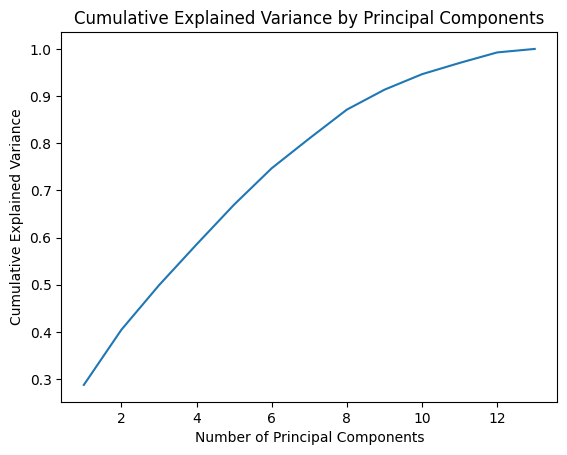

time: 288 ms (started: 2023-11-07 14:13:13 +00:00)


In [ ]:
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance)
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by Principal Components')
plt.show()

In [ ]:
# Then, you can fit another PCA model with the desired number of components.
pca = PCA(n_components=3)
X_projected = pca.fit_transform(X)

time: 97.8 ms (started: 2023-11-07 14:13:13 +00:00)


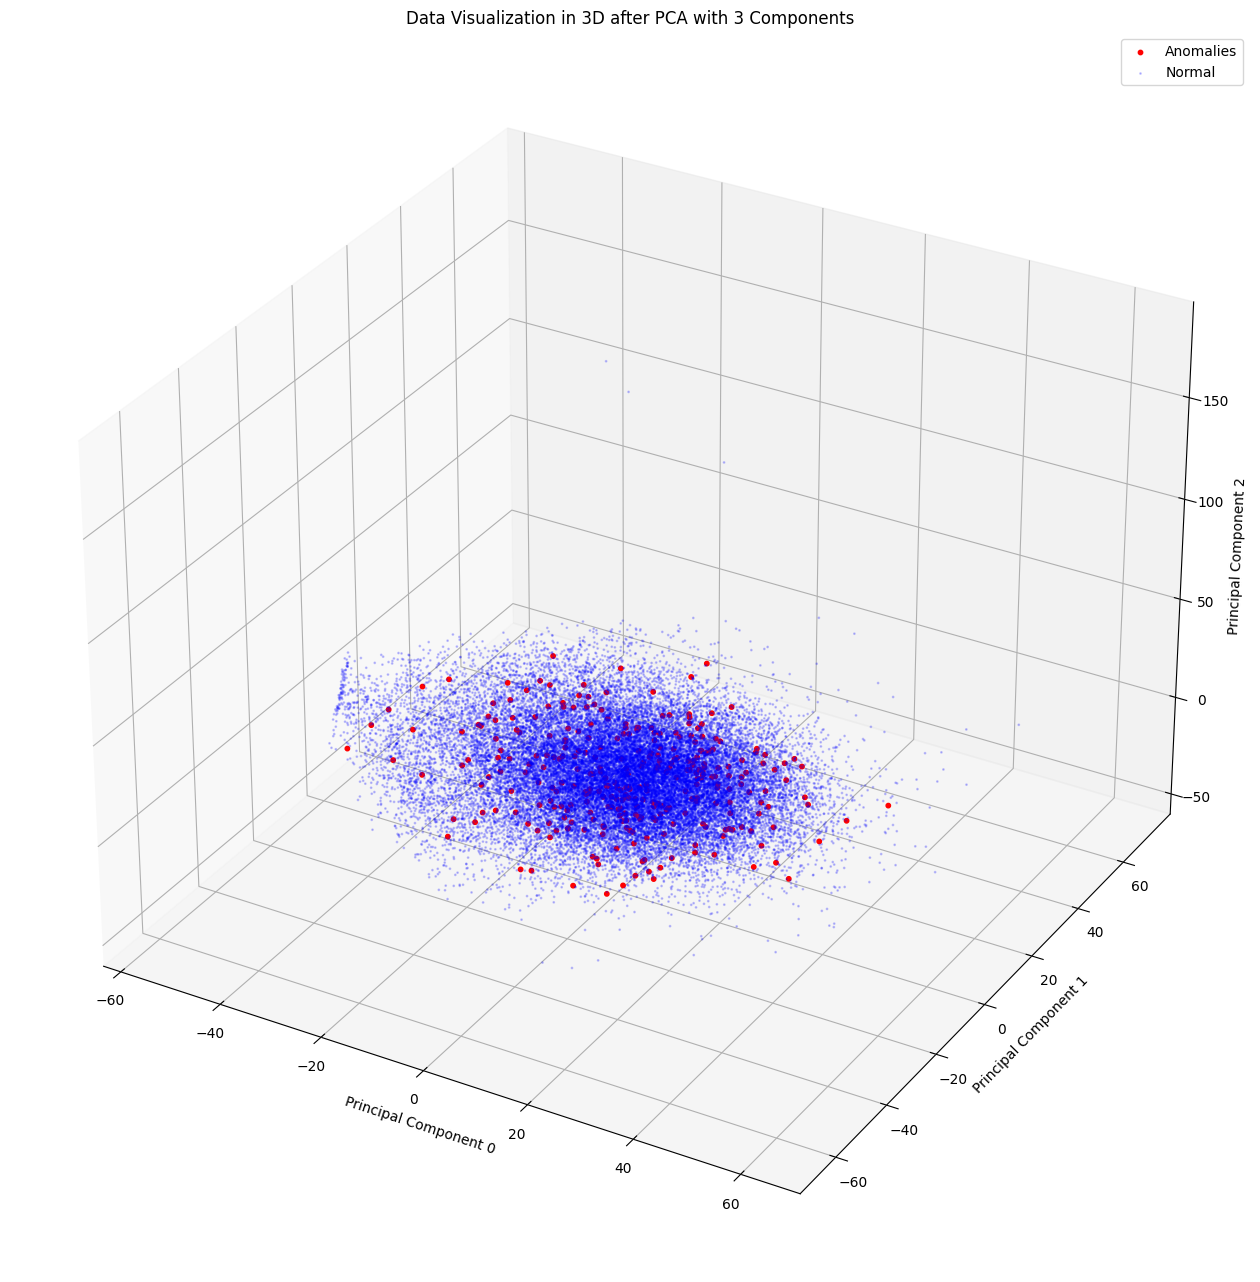

time: 1.79 s (started: 2023-11-07 14:13:13 +00:00)


In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Assuming X_projected is the result of PCA transformation with 3 components
component1 = 0
component2 = 1
component3 = 2

# Create a 3D scatter plot
fig = plt.figure(figsize=(16, 20))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of anomalies in red with full transparency
ax.scatter(X_projected[y == 1, component1], X_projected[y == 1, component2], X_projected[y == 1, component3], s=10, c='r', alpha=1, label='Anomalies')

# Scatter plot of normal data in blue with reduced transparency
ax.scatter(X_projected[y == 0, component1], X_projected[y == 0, component2], X_projected[y == 0, component3], s=1, c='b', alpha=0.2, label='Normal')

# Set labels for each axis
ax.set_xlabel(f'Principal Component {component1}')
ax.set_ylabel(f'Principal Component {component2}')
ax.set_zlabel(f'Principal Component {component3}')

# Title of the 3D visualization
plt.title('Data Visualization in 3D after PCA with 3 Components')

# Display the 3D plot with a legend
plt.legend()
plt.show()



In [ ]:
# Then, you can fit another PCA model with the desired number of components.
pca = PCA(n_components=8)
X_projected = pca.fit_transform(X)

time: 177 ms (started: 2023-11-07 14:13:15 +00:00)


## PCA 2

Résultats de PCA :
            PC1       PC2
0      3.095516 -1.470934
1     -1.854218 -1.018205
2      1.292251  0.593927
3      0.499390  1.658104
4      2.591473 -1.993682
...         ...       ...
34510  1.806330  0.093036
34511 -2.311783  0.305747
34512  0.338274 -1.728097
34513  0.120508  0.691982
34514  1.849289  0.151112

[34515 rows x 2 columns]


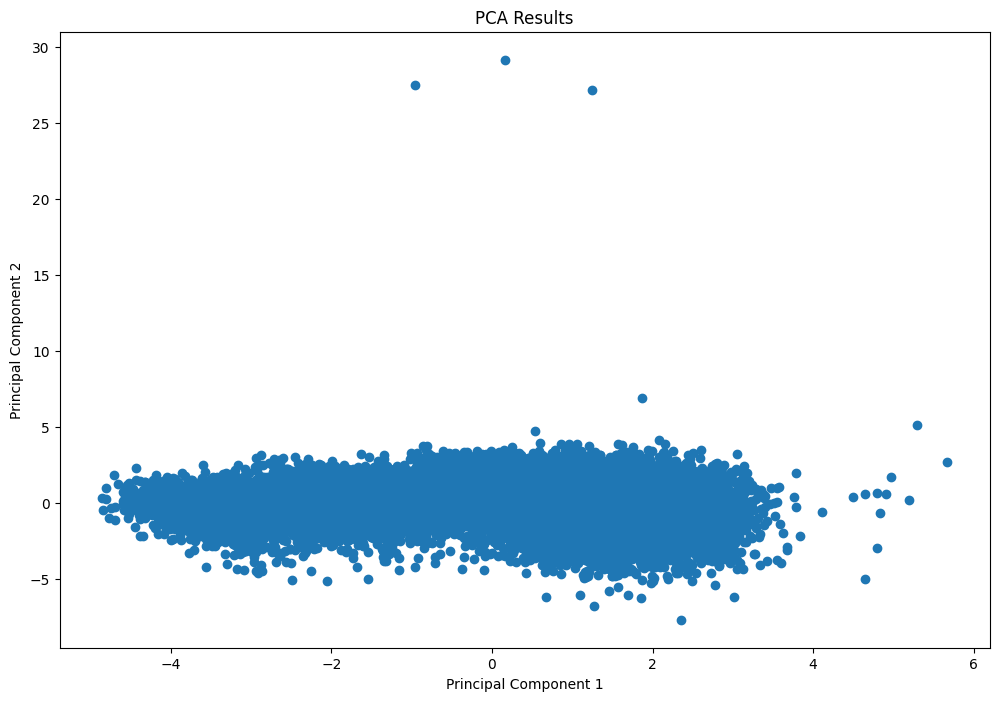

time: 521 ms (started: 2023-11-07 13:43:02 +00:00)


In [ ]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)

pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])

print("Résultats de PCA :")
print(pca_df)

plt.figure(figsize=(12, 8))
plt.scatter(pca_df['PC1'], pca_df['PC2'])
plt.title('PCA Results')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

## Use of flag column

## Random Forest


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


time: 24.4 ms (started: 2023-11-07 17:50:48 +00:00)


In [ ]:
# Compute class weights to address class imbalance
from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)


time: 6.08 ms (started: 2023-11-07 17:50:48 +00:00)


In [ ]:
# Create and configure the Random Forest classifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(
    n_estimators=1000,               # Increase the number of trees
    max_depth=20,                  # Limit the depth of each tree (adjust as needed)
    max_leaf_nodes=16, # Each tree cannot have more than that
    class_weight='balanced',       # Use class weights to handle imbalance
    random_state= 0,
    criterion='gini',
    n_jobs=-1, # Use all the CPUs
    max_features = 'sqrt' # auto means=sqrt(n_features)
)

# Train the model
rf.fit(X_train, y_train)

# Make predictions
y_pred = rf.predict(X_test)

time: 19.6 s (started: 2023-11-07 17:50:49 +00:00)


In [ ]:
auc = roc_auc_score(y_test, y_pred)
print("AUC on the test set:", auc)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
# Precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)
# Recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

AUC on the test set: 0.6495967529386958
Accuracy: 0.7884977545994495
Precision: 0.021218343600273786
Recall: 0.5081967213114754
time: 44.6 ms (started: 2023-11-07 14:05:36 +00:00)


Normalized confusion matrix
[[0.79099678 0.20900322]
 [0.49180328 0.50819672]]


<Axes: title={'center': 'Normalized confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

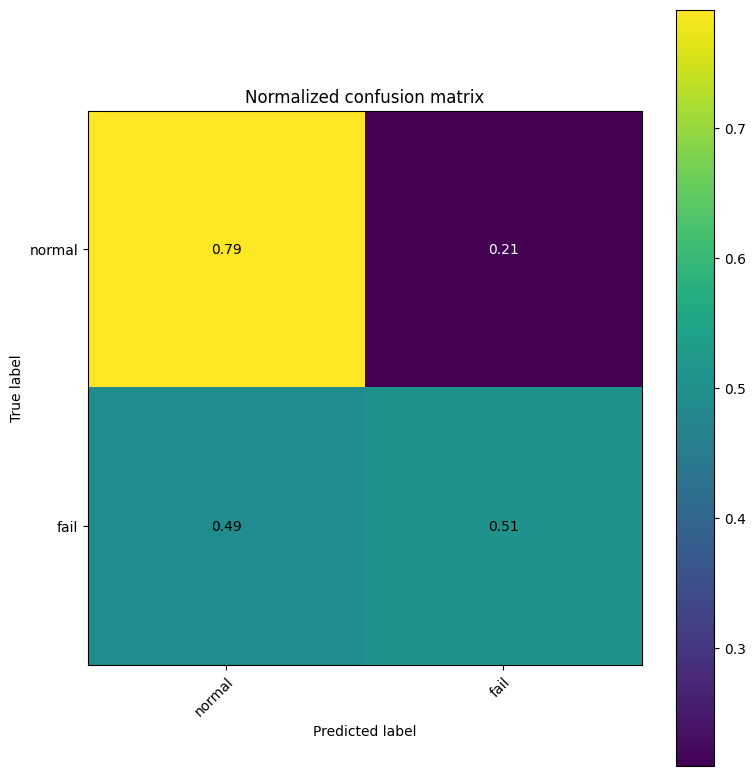

time: 338 ms (started: 2023-11-07 17:51:09 +00:00)


In [ ]:
class_names= np.array( ['normal', 'fail'] )
plot_conf_mat(y_test, y_pred, class_names)

In [ ]:
!pip install -U imbalanced-ensemble

time: 7.34 s (started: 2023-11-07 14:05:49 +00:00)


In [ ]:
from imbalanced_ensemble.ensemble import BalancedRandomForestClassifier

brf = BalancedRandomForestClassifier(n_estimators=1000, random_state=42,sampling_strategy='auto',)
brf.fit(X_train, y_train)

BalancedRandomForestClassifier(n_estimators=1000, random_state=42)

time: 26 s (started: 2023-11-07 14:05:57 +00:00)


Normalized confusion matrix
[[0.65931014 0.34068986]
 [0.39344262 0.60655738]]


<Axes: title={'center': 'Normalized confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

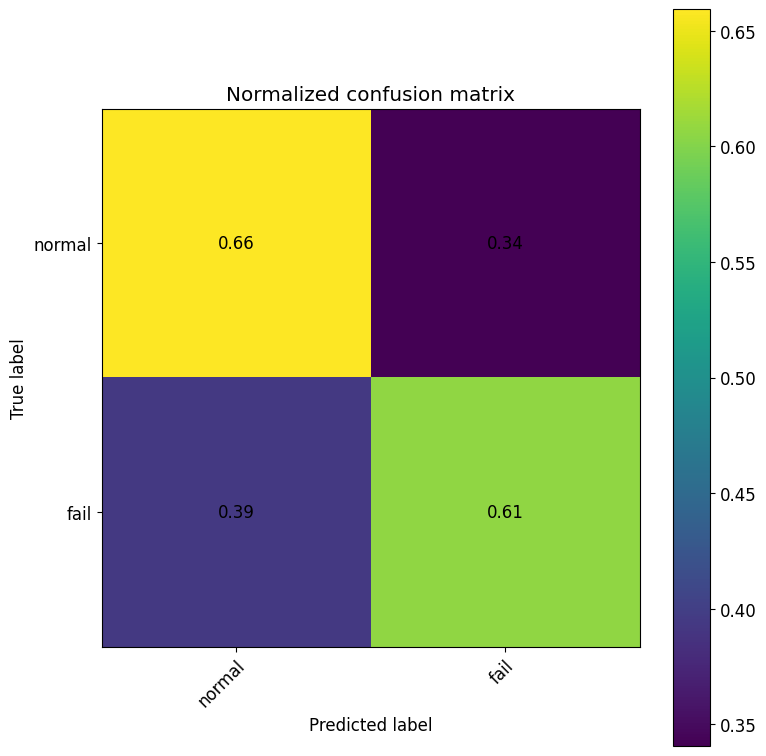

time: 7.61 s (started: 2023-11-07 14:06:43 +00:00)


In [ ]:
y_pred = brf.predict(X_test)
class_names= np.array( ['normal', 'fail'] )
plot_conf_mat(y_test, y_pred, class_names)

In [ ]:
auc = roc_auc_score(y_test, y_pred)
print("AUC on the test set:", auc)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
# Precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)
# Recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

AUC on the test set: 0.6329337601410766
Accuracy: 0.6588439808778792
Precision: 0.015625
Recall: 0.6065573770491803
time: 87.7 ms (started: 2023-11-07 14:06:51 +00:00)


In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X_dropped, y_dropped, test_size=0.2, random_state=42, stratify=y)
# df_dropped

time: 119 ms (started: 2023-10-31 09:24:35 +00:00)


In [ ]:
from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)


time: 18.9 ms (started: 2023-11-02 22:36:51 +00:00)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(
    n_estimators=1000,               # Increase the number of trees
    max_depth=20,                  # Limit the depth of each tree (adjust as needed)
    max_leaf_nodes=18, # Each tree cannot have more than that
    # class_weight='balanced',       # Use class weights to handle imbalance
    random_state= 42,
    criterion='gini',
    n_jobs=-1, # Use all the CPUs
    max_features = 'sqrt' # auto means=sqrt(n_features)
)
smote = SMOTE()
X_train, y_train = smote.fit_resample(X_train, y_train)
# Train the model
rf.fit(X_train, y_train)

# Make predictions
y_pred = rf.predict(X_test)

KeyboardInterrupt: ignored

time: 58.6 s (started: 2023-11-07 10:52:15 +00:00)


In [ ]:
auc = roc_auc_score(y_test, y_pred)
print("AUC on the test set:", auc)

In [ ]:
class_names= np.array( ['normal', 'fail'] )
plot_conf_mat(y_test, y_pred, class_names)

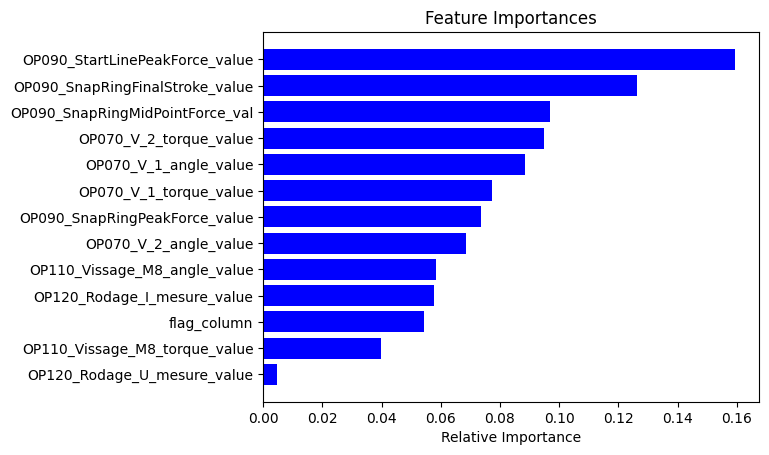

Index(['OP070_V_1_angle_value', 'OP090_SnapRingPeakForce_value',
       'OP070_V_2_angle_value', 'OP120_Rodage_I_mesure_value',
       'OP090_SnapRingFinalStroke_value', 'OP110_Vissage_M8_torque_value',
       'OP120_Rodage_U_mesure_value', 'OP070_V_1_torque_value',
       'OP090_StartLinePeakForce_value', 'OP110_Vissage_M8_angle_value',
       'OP090_SnapRingMidPointForce_val', 'OP070_V_2_torque_value',
       'flag_column'],
      dtype='object')

time: 450 ms (started: 2023-11-07 17:51:09 +00:00)


In [ ]:
from visualization import  plot_feature_importances

feature_names = X_test.columns
plot_feature_importances(rf.feature_importances_, feature_names)
feature_names


In [ ]:
from sklearn.feature_selection import SelectFromModel
threshold = 0.04  # Adjust this threshold as needed

sfm = SelectFromModel(rf, threshold=threshold)
sfm.fit(X_train, y_train)

X_train_selected = sfm.transform(X_train)
X_test_selected = sfm.transform(X_test)

In [ ]:
# Train the model
rf.fit(X_train_selected, y_train)

# Make predictions
y_pred = rf.predict(X_test_selected)

In [ ]:
auc = roc_auc_score(y_test, y_pred)
print("AUC on the test set:", auc)

In [ ]:
class_names = np.array( ['normal', 'fail'] )
plot_conf_mat(y_test, y_pred, class_names)

### Balanced Random Forest

In [ ]:
from imblearn.ensemble import BalancedRandomForestClassifier

brf = BalancedRandomForestClassifier(n_estimators=1000, random_state=42)

brf.fit(X_train, y_train)

y_pred = brf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

time: 16.9 s (started: 2023-10-31 10:46:47 +00:00)


In [ ]:
auc = roc_auc_score(y_test, y_pred)
print("AUC on the test set:", auc)

AUC on the test set: 0.6456613203885356
time: 6.83 ms (started: 2023-10-31 10:47:07 +00:00)


Normalized confusion matrix
[[0.66837182 0.33162818]
 [0.37704918 0.62295082]]


<Axes: title={'center': 'Normalized confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

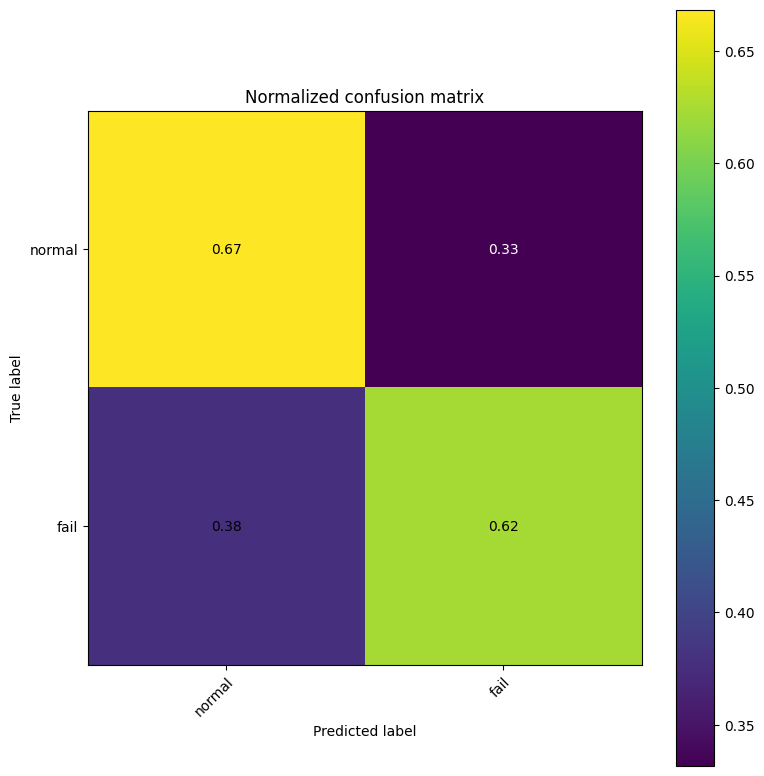

time: 671 ms (started: 2023-10-31 10:47:09 +00:00)


In [ ]:
class_names= np.array( ['normal', 'fail'] )
plot_conf_mat(y_test, y_pred, class_names)

##Binary classification with Logistic Regression

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_dropped, y, test_size=0.2, random_state=42, stratify=y)

time: 77.8 ms (started: 2023-11-07 14:49:32 +00:00)


Apply normalization

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

time: 58.4 ms (started: 2023-11-07 14:49:34 +00:00)


In [ ]:
y_train.value_counts()

0    27368
1      244
Name: Binar OP130_Resultat_Global_v, dtype: int64

time: 14.1 ms (started: 2023-11-07 14:49:34 +00:00)


In [ ]:
y_test.value_counts()

0    6842
1      61
Name: Binar OP130_Resultat_Global_v, dtype: int64

time: 14 ms (started: 2023-11-07 14:49:35 +00:00)


Class balance

In [ ]:
smote = SMOTE()

X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)
pd.value_counts(y_train_balanced)

0    27368
1    27368
Name: Binar OP130_Resultat_Global_v, dtype: int64

time: 93.4 ms (started: 2023-11-07 14:49:36 +00:00)


In [ ]:
model_lr = LogisticRegression(C=1)
model_lr.fit(X_train_balanced, y_train_balanced)
X_test_scaled = scaler.transform(X_test)
y_pred_lr = model_lr.predict(X_test_scaled)
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.99      0.66      0.80      6842
           1       0.02      0.62      0.03        61

    accuracy                           0.66      6903
   macro avg       0.51      0.64      0.41      6903
weighted avg       0.99      0.66      0.79      6903

time: 254 ms (started: 2023-11-07 14:49:38 +00:00)


Normalized confusion matrix
[[0.66427945 0.33572055]
 [0.37704918 0.62295082]]


<Axes: title={'center': 'Normalized confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

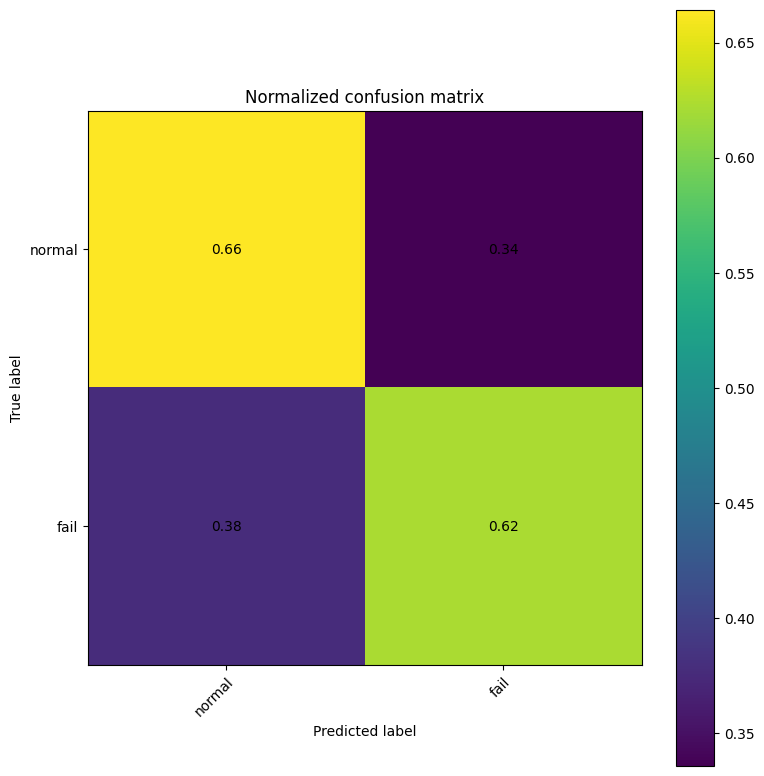

time: 528 ms (started: 2023-11-07 14:49:39 +00:00)


In [ ]:
class_names= np.array( ['normal', 'fail'] )
plot_conf_mat(y_test, y_pred_lr, class_names)

In [ ]:
auc = roc_auc_score(y_test, y_pred_lr)
print("AUC on the test set:", auc)
accuracy = accuracy_score(y_test, y_pred_lr)
print("Accuracy:", accuracy)
# Precision
precision = precision_score(y_test, y_pred_lr)
print("Precision:", precision)
# Recall
recall = recall_score(y_test, y_pred_lr)
print("Recall:", recall)

AUC on the test set: 0.6436151350626076
Accuracy: 0.6639142401854267
Precision: 0.016274089935760173
Recall: 0.6229508196721312
time: 21.6 ms (started: 2023-11-07 14:49:42 +00:00)


In [ ]:
# Create a parameter grid for hyperparameter tuning
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l1', 'l2'],  # Regularization type
}

# Create a GridSearchCV object
grid_search = GridSearchCV(model_lr, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)

# Get the keys of the parameters
grid_search.get_params().keys()

dict_keys(['cv', 'error_score', 'estimator__C', 'estimator__class_weight', 'estimator__dual', 'estimator__fit_intercept', 'estimator__intercept_scaling', 'estimator__l1_ratio', 'estimator__max_iter', 'estimator__multi_class', 'estimator__n_jobs', 'estimator__penalty', 'estimator__random_state', 'estimator__solver', 'estimator__tol', 'estimator__verbose', 'estimator__warm_start', 'estimator', 'n_jobs', 'param_grid', 'pre_dispatch', 'refit', 'return_train_score', 'scoring', 'verbose'])

time: 6.44 ms (started: 2023-11-07 10:53:54 +00:00)


In [ ]:
k_fold = KFold(n_splits=5, shuffle=True, random_state=5)

# Create a parameter grid for hyperparameter tuning
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
    'solver': ['liblinear', 'lbfgs'],  # Solver for optimization
}

# Create a GridSearchCV object
grid_search = GridSearchCV(model_lr, param_grid, cv=k_fold, scoring='roc_auc', n_jobs=-1)

# Fit the grid search to your data
grid_search.fit(X_train_balanced, y_train_balanced)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)

# Get the best model
best_model = grid_search.best_estimator_



Best hyperparameters: {'C': 100, 'solver': 'liblinear'}
time: 8.11 s (started: 2023-10-31 03:51:08 +00:00)


In [ ]:
model_lr_gs = grid_search.best_estimator_
model_lr_gs.fit(X_train_balanced, y_train_balanced)
y_pred_lr_gs = model_lr_gs.predict(X_test)


time: 162 ms (started: 2023-10-31 03:52:05 +00:00)


Normalized confusion matrix
[[2.92312189e-04 9.99707688e-01]
 [0.00000000e+00 1.00000000e+00]]


<Axes: title={'center': 'Normalized confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

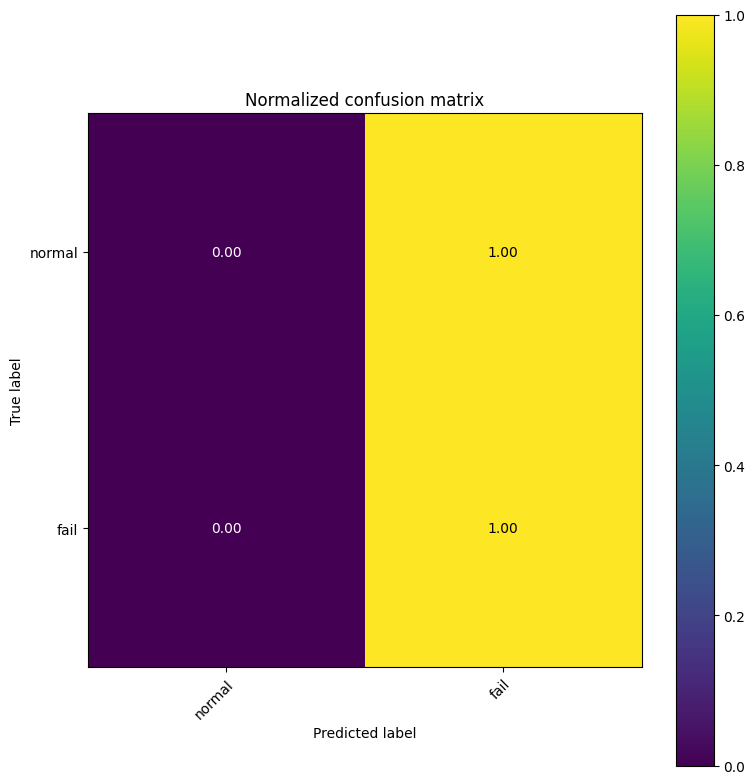

time: 370 ms (started: 2023-10-31 03:52:08 +00:00)


In [ ]:
plot_conf_mat(y_test, y_pred_lr_gs , class_names)

In [ ]:
print(classification_report(y_test, y_pred_lr_gs))

ValueError: ignored

time: 31.5 ms (started: 2023-10-31 04:37:26 +00:00)


###Interpretable ML for Binary classification



In [ ]:
!pip install -q shap


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 8.0 MB/s eta 0:00:00
time: 7.75 s (started: 2023-11-07 14:12:11 +00:00)


In [ ]:
import shap

time: 8.63 s (started: 2023-11-07 14:12:19 +00:00)


In [ ]:

explainer = shap.Explainer(model_lr, X_train)

time: 2.37 ms (started: 2023-11-07 14:49:48 +00:00)


In [ ]:
shap_values = explainer(X_test)

time: 269 ms (started: 2023-11-07 14:49:49 +00:00)


In [ ]:
mean_abs_shap = np.mean(np.abs(shap_values.values), axis=0)

time: 1.81 ms (started: 2023-11-07 14:49:50 +00:00)


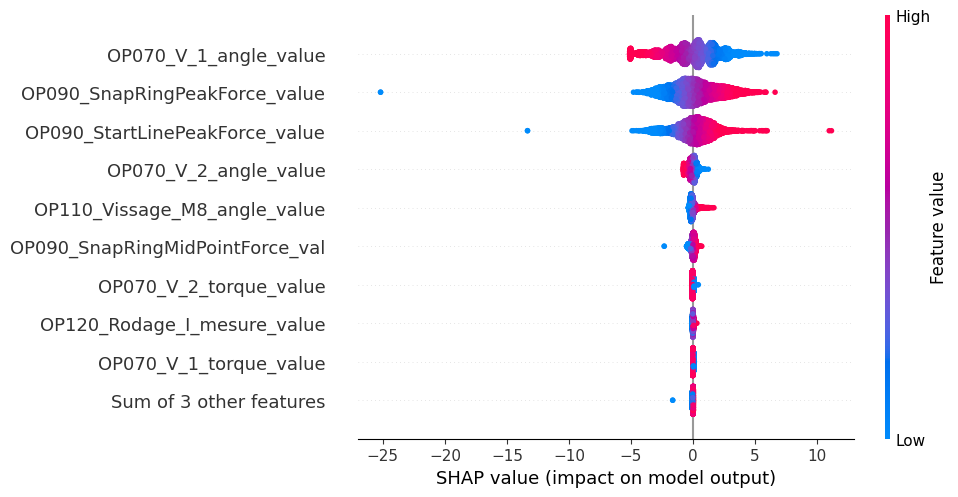

time: 1.15 s (started: 2023-11-07 14:49:51 +00:00)


In [ ]:
shap.plots.beeswarm(shap_values)

In [ ]:
threshold = 0.1 # Set a threshold for feature selection
selected_features = X.columns[mean_abs_shap > threshold] # Identify features with mean absolute SHAP values above the threshold
X_selected = X[selected_features] # Subset the data with selected features
print("Selected Features:", selected_features)


IndexError: ignored

time: 23.2 ms (started: 2023-11-07 14:49:53 +00:00)


In [ ]:
selected_features = ['OP070_V_1_angle_value', 'OP090_SnapRingPeakForce_value',
                     'OP070_V_2_angle_value', 'OP090_StartLinePeakForce_value',
                     'OP090_SnapRingMidPointForce_val']

X_selected = X[selected_features]  # Subset the data with selected features
print("Selected Features:", selected_features)


Selected Features: ['OP070_V_1_angle_value', 'OP090_SnapRingPeakForce_value', 'OP070_V_2_angle_value', 'OP090_StartLinePeakForce_value', 'OP090_SnapRingMidPointForce_val']
time: 3.19 ms (started: 2023-11-07 14:50:30 +00:00)


In [ ]:
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

X_train_selected.head()


OP070_V_1_angle_value  OP090_SnapRingPeakForce_value  \
22751                  172.3                         143.24   
28759                  154.1                         153.71   
33632                  149.3                         145.82   
30643                  197.9                         157.39   
20150                  152.1                         176.02   

       OP070_V_2_angle_value  OP090_StartLinePeakForce_value  \
22751                  166.2                           23.07   
28759                  169.7                           23.92   
33632                  158.9                           18.51   
30643                  187.6                           23.14   
20150                  148.3                           22.35   

       OP090_SnapRingMidPointForce_val  
22751                            95.50  
28759                           104.11  
33632                            86.80  
30643                            95.30  
20150                            95.16

time: 18.9 ms (started: 2023-11-07 14:50:32 +00:00)


In [ ]:
smote = SMOTE()

X_train_balanced, y_train_balanced = smote.fit_resample(X_train_selected, y_train)

time: 22.7 ms (started: 2023-11-07 14:50:34 +00:00)


In [ ]:
scaler = StandardScaler()
scaler.fit(X_train_balanced)
X_train_scaled = scaler.transform(X_train_balanced)
X_test_scaled = scaler.transform(X_test_selected)

time: 25.7 ms (started: 2023-11-07 14:50:35 +00:00)


In [ ]:
model_lr.fit(X_train_balanced, y_train_balanced)
y_pred_lr = model_lr.predict(X_test_selected)

time: 235 ms (started: 2023-11-07 14:50:37 +00:00)


Normalized confusion matrix
[[0.53916983 0.46083017]
 [0.45901639 0.54098361]]


<Axes: title={'center': 'Normalized confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

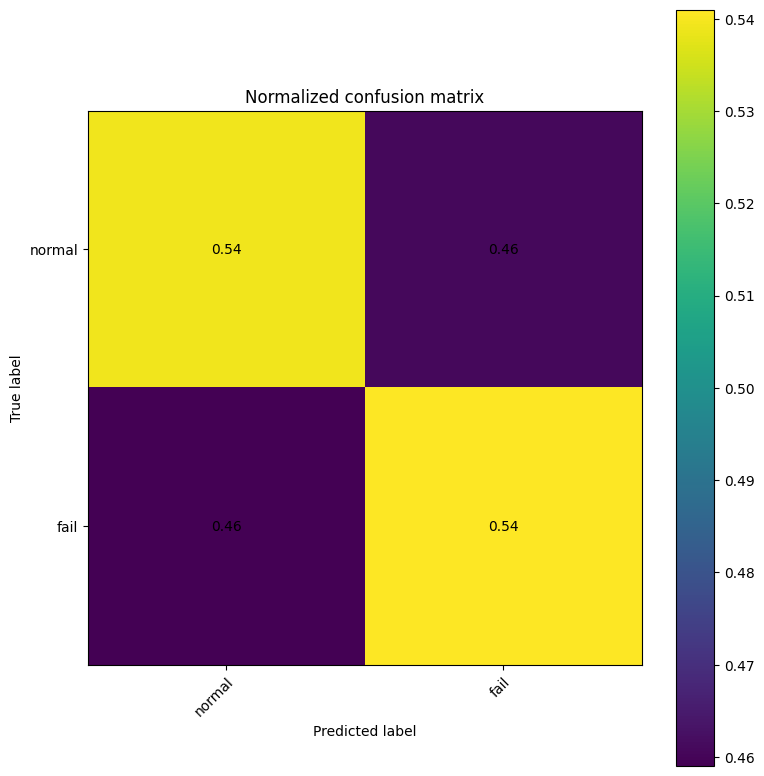

time: 625 ms (started: 2023-11-07 14:50:38 +00:00)


In [ ]:
class_names= np.array( ['normal', 'fail'] )
plot_conf_mat(y_test, y_pred_lr, class_names)

In [ ]:
auc = roc_auc_score(y_test, y_pred_lr)
print("AUC on the test set:", auc)
accuracy = accuracy_score(y_test, y_pred_lr)
print("Accuracy:", accuracy)
# Precision
precision = precision_score(y_test, y_pred_lr)
print("Precision:", precision)
# Recall
recall = recall_score(y_test, y_pred_lr)
print("Recall:", recall)

AUC on the test set: 0.5400767199697145
Accuracy: 0.5391858612197595
Precision: 0.010357815442561206
Recall: 0.5409836065573771
time: 22.3 ms (started: 2023-11-07 14:50:42 +00:00)


### Drop the less correlated columns

In [ ]:
column_names = X.columns
print(column_names)

Index(['OP070_V_1_angle_value', 'OP090_SnapRingPeakForce_value',
       'OP070_V_2_angle_value', 'OP120_Rodage_I_mesure_value',
       'OP090_SnapRingFinalStroke_value', 'OP110_Vissage_M8_torque_value',
       'OP120_Rodage_U_mesure_value', 'OP070_V_1_torque_value',
       'OP090_StartLinePeakForce_value', 'OP110_Vissage_M8_angle_value',
       'OP090_SnapRingMidPointForce_val', 'OP070_V_2_torque_value',
       'flag_column'],
      dtype='object')
time: 965 µs (started: 2023-11-07 14:50:44 +00:00)


In [ ]:
X_copy = X_dropped.copy()

time: 10 ms (started: 2023-11-07 14:50:52 +00:00)


Experiment dropping less contributive columns

In [ ]:
X_copy = X_copy.drop(columns=["OP110_Vissage_M8_torque_value","OP120_Rodage_U_mesure_value"])

time: 3.7 ms (started: 2023-11-07 14:50:54 +00:00)


In [ ]:
X_copy

OP070_V_1_angle_value  OP090_SnapRingPeakForce_value  \
0                      180.4                         190.51   
1                      138.7                         147.70   
2                      180.9                         150.87   
3                      173.5                         159.56   
4                      174.5                         172.29   
...                      ...                            ...   
34510                  158.2                         168.40   
34511                  139.4                         146.24   
34512                  165.5                         157.34   
34513                  152.4                         165.07   
34514                  197.8                         150.37   

       OP070_V_2_angle_value  OP120_Rodage_I_mesure_value  \
0                      173.1                       113.64   
1                      163.5                       109.77   
2                      181.2                       109.79   
3                      151.8                       113.25   
4                      177.5                       112.88   
...                      ...                          ...   
34510                  180.6                       110.65   
34511                  154.5                       108.14   
34512                  149.8                       112.77   
34513                  140.0                       111.19   
34514                  190.3                       113.81   

       OP090_SnapRingFinalStroke_value  OP070_V_1_torque_value  \
0                                12.04                    6.62   
1                                12.12                    6.41   
2                                11.86                    6.62   
3                                11.82                    6.62   
4                                12.07                    6.62   
...                                ...                     ...   
34510                            11.88                    6.61   
34511                            12.04                    6.41   
34512                            12.09                    6.62   
34513                            12.06                    6.60   
34514                            11.84                    6.47   

       OP090_StartLinePeakForce_value  OP110_Vissage_M8_angle_value  \
0                               26.37                          18.8   
1                               21.03                          18.5   
2                               25.81                          17.5   
3                               24.62                          15.6   
4                               29.22                          33.6   
...                               ...                           ...   
34510                           24.03                          14.8   
34511                           21.52                          15.5   
34512                           22.65                          24.4   
34513                           20.77                          13.6   
34514                           26.43                          21.5   

       OP090_SnapRingMidPointForce_val  OP070_V_2_torque_value  
0                               109.62                    6.60  
1                               105.48                    6.40  
2                               100.03                    6.61  
3                               104.94                    6.61  
4                                99.19                    6.61  
...                                ...                     ...  
34510                            98.76                    6.61  
34511                            98.37                    6.40  
34512                            92.92                    6.62  
34513                           101.21                    6.60  
34514                           102.72                    6.62  

[34515 rows x 10 columns]

time: 20.3 ms (started: 2023-11-07 14:50:57 +00:00)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_copy, y, test_size=0.2, random_state=123, stratify=y)

time: 45.5 ms (started: 2023-11-07 15:02:09 +00:00)


In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

time: 15.5 ms (started: 2023-11-07 15:02:11 +00:00)


In [ ]:
smote = SMOTE()

X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)
pd.value_counts(y_train_balanced)


0    27368
1    27368
Name: Binar OP130_Resultat_Global_v, dtype: int64

time: 94.2 ms (started: 2023-11-07 15:02:12 +00:00)


In [ ]:
model = LogisticRegression(C=1)
model.fit(X_train_balanced, y_train_balanced)
X_test_scaled = scaler.transform(X_test)
y_pred = model.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.66      0.79      6842
           1       0.02      0.62      0.03        61

    accuracy                           0.66      6903
   macro avg       0.51      0.64      0.41      6903
weighted avg       0.99      0.66      0.78      6903

time: 123 ms (started: 2023-11-07 15:02:12 +00:00)


In [ ]:
# Probability prediction
y_prob = model.predict_proba(X_test_scaled)[:, 1]

# Set a new threshold
threshold = 0.48

# Reclassify instances based on the threshold
y_pred = (y_prob >= threshold).astype(int)

time: 8.23 ms (started: 2023-11-07 15:03:36 +00:00)


In [ ]:
accuracy_score(y_pred, y_test)

0.6119078661451542

time: 17.4 ms (started: 2023-11-07 15:03:38 +00:00)


In [ ]:
auc = roc_auc_score(y_test, y_pred)
print("AUC on the test set:", auc)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
# Precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)
# Recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

AUC on the test set: 0.6498746891187985
Accuracy: 0.6119078661451542
Precision: 0.015544041450777202
Recall: 0.6885245901639344
time: 66.8 ms (started: 2023-11-07 15:03:39 +00:00)


Normalized confusion matrix
[[0.61122479 0.38877521]
 [0.31147541 0.68852459]]


<Axes: title={'center': 'Normalized confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

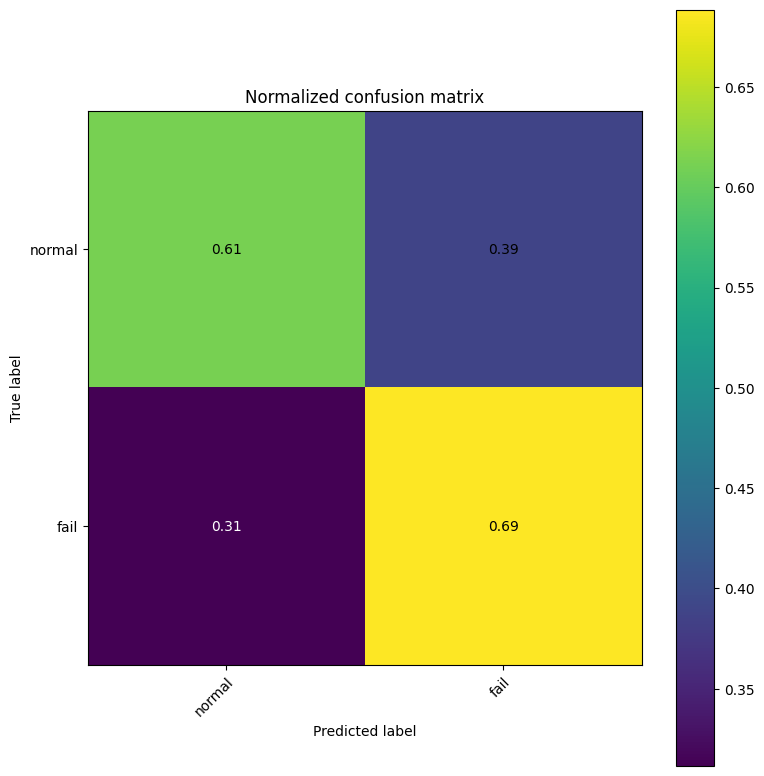

time: 383 ms (started: 2023-11-07 15:03:41 +00:00)


In [ ]:
class_names= np.array( ['normal', 'fail'] )
plot_conf_mat(y_test, y_pred, class_names)

In [ ]:
auc = roc_auc_score(y_test, y_pred)
print("AUC on the test set:", auc)

AUC on the test set: 0.6505204115372267
time: 8.79 ms (started: 2023-11-07 14:44:04 +00:00)


In [ ]:
k_fold = KFold(n_splits=100, shuffle=True, random_state=5)

# Create a parameter grid for hyperparameter tuning
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
    'solver': ['liblinear', 'lbfgs'],  # Solver for optimization
}

# Create a GridSearchCV object
grid_search = GridSearchCV(model_lr, param_grid, cv=k_fold, scoring='roc_auc', n_jobs=-1)

# Fit the grid search to your data
grid_search.fit(X_train_balanced, y_train_balanced)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)

# Get the best model
best_model = grid_search.best_estimator_


In [ ]:
model_lr_gs = grid_search.best_estimator_
model_lr_gs.fit(X_train_balanced, y_train_balanced)
y_pred_lr_gs = model_lr_gs.predict(X_test)
auc = roc_auc_score(y_test, y_pred_lr_gs )
print("AUC on the test set:", auc)

In [ ]:
class_names= np.array( ['normal', 'fail'] )
plot_conf_mat(y_test, y_pred_lr_gs, class_names)

### Logistic regression with class weight

In [ ]:
# Scale
scaler = StandardScaler()
scaler.fit(X_train)


X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

time: 125 ms (started: 2023-11-02 22:08:55 +00:00)


In [ ]:
# Compute class weights from the training data
from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = dict(zip(np.unique(y_train), class_weights))


time: 72.2 ms (started: 2023-11-02 22:08:57 +00:00)


In [ ]:
model_weight = LogisticRegression(class_weight=class_weight_dict)
model_weight.fit(X_train_scaled, y_train)

LogisticRegression(class_weight={0: 0.504457760888629, 1: 56.58196721311475})

time: 536 ms (started: 2023-11-02 22:08:58 +00:00)


In [ ]:
y_pred_lr_w = model_weight.predict(X_test)
auc = roc_auc_score(y_test, y_pred_lr_w)
print("AUC on the test set:", auc)

AUC on the test set: 0.5
time: 50.6 ms (started: 2023-11-02 22:09:00 +00:00)


Normalized confusion matrix
[[1. 0.]
 [1. 0.]]


<Axes: title={'center': 'Normalized confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

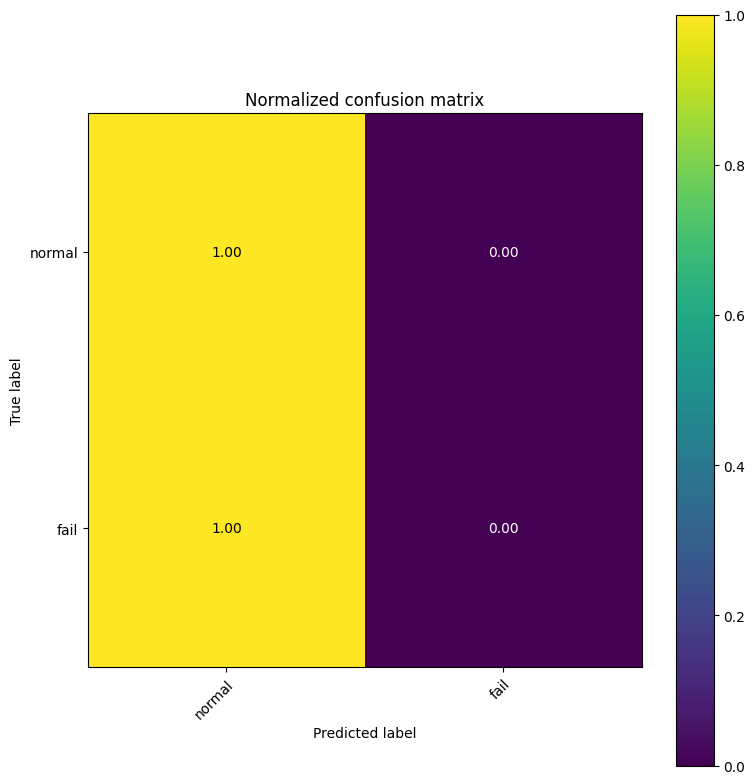

time: 2.81 s (started: 2023-11-02 22:09:01 +00:00)


In [ ]:
class_names= np.array( ['normal', 'fail'] )
plot_conf_mat(y_test, y_pred_lr_w, class_names)

###Other methods

In [ ]:
pip install lightgbm

time: 6.65 s (started: 2023-10-25 20:45:23 +00:00)


In [ ]:
import lightgbm as lgb
model_lgb = lgb.LGBMClassifier(
    num_leaves=31,       # Maximum number of leaves in one tree
    max_depth=-1,        # Unlimited depth
    learning_rate=0.05,  # Step size shrinkage for each boosting step
    n_estimators=1000,   # Number of boosting rounds
    random_state=42      # For reproducibility
)
model_lgb.fit(X_train, y_train)


[LightGBM] [Info] Number of positive: 244, number of negative: 27368
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012713 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1948
[LightGBM] [Info] Number of data points in the train set: 27612, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.008837 -> initscore=-4.719962
[LightGBM] [Info] Start training from score -4.719962


LGBMClassifier(learning_rate=0.05, n_estimators=1000, random_state=42)

time: 16.8 s (started: 2023-10-25 20:45:32 +00:00)


In [ ]:
from sklearn.metrics import accuracy_score
y_pred_lgbmc = model_lgb.predict(X_test)
accuracy_score(y_pred_lgbmc, y_test)



0.9910183977980588

time: 1.28 s (started: 2023-10-25 20:45:49 +00:00)


Normalized confusion matrix
[[9.99853844e-01 1.46156095e-04]
 [1.00000000e+00 0.00000000e+00]]


<Axes: title={'center': 'Normalized confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

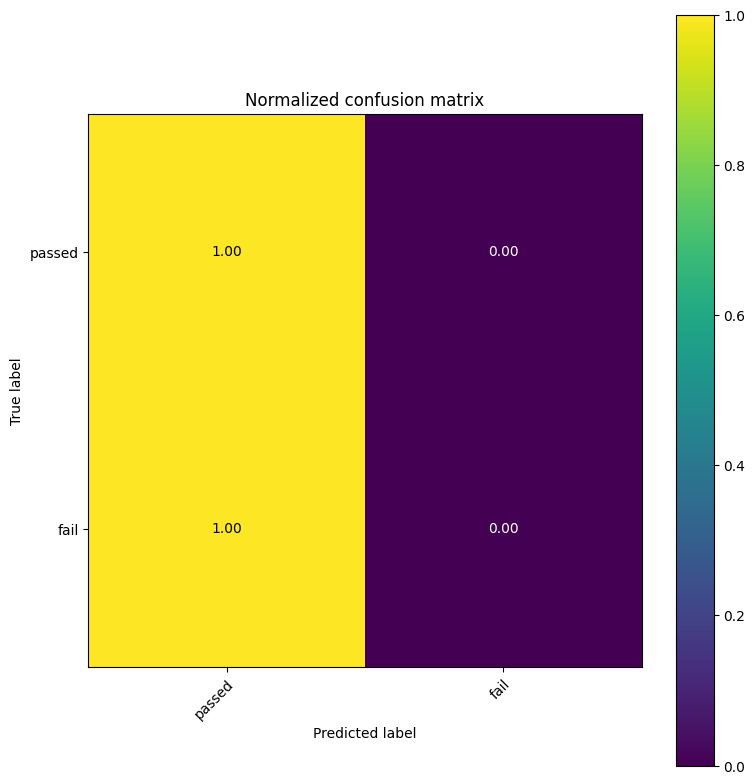

time: 729 ms (started: 2023-10-25 20:45:50 +00:00)


In [ ]:

from visualization import plot_conf_mat
class_names = np.array(['passed', 'fail'])
plot_conf_mat(y_test, y_pred_lgbmc, class_names)


##Anomaly Detection

*As* we have a percentage of anomalies is less than 1% , it is better to apply unsupervised or semi-supervised learning

## Autoencoder: Neural Network for Anomaly Detection
###### Using the autoencoder NN to imitate the input using the flag_column
###### Normal points are the majority (seen at the code below)

Getting the Libraries Dependecies

In [147]:
!pip install category_encoders
import category_encoders as ce
# The following library is to plot the loss during training
# https://github.com/stared/livelossplot
! pip install livelossplot
from livelossplot import PlotLossesKerasTF
from tensorflow.keras.models import Sequential, load_model
# Import the visualization library I prepared for you
! wget https://raw.githubusercontent.com/andreaaraldo/machine-learning-for-networks/master/course_library/visualization.py
from visualization import plot_conf_mat

--2023-11-09 03:15:31--  https://raw.githubusercontent.com/andreaaraldo/machine-learning-for-networks/master/course_library/visualization.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13023 (13K) [text/plain]
Saving to: ‘visualization.py.3’

visualization.py.3  100%[===================>]  12.72K  --.-KB/s    in 0.001s  

2023-11-09 03:15:32 (24.6 MB/s) - ‘visualization.py.3’ saved [13023/13023]

time: 21 s (started: 2023-11-09 03:15:11 +00:00)


In [202]:
import tensorflow as tf
import os
from functools import partial, partialmethod
import tensorflow.keras as keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger, TensorBoard
import random


time: 1.01 ms (started: 2023-11-09 03:36:21 +00:00)


Preparing data

In [249]:
np.random.seed(9)
random.seed(9)
tf.random.set_seed(4)
df.head()
df_auto2 = df.drop('OP120_Rodage_U_mesure_value', axis=1)
df_auto2 = df_auto2.drop('OP110_Vissage_M8_torque_value', axis =1)
df_auto2 = df_auto2.drop("flag_column", axis=1)
X = df_auto2.drop('Binar OP130_Resultat_Global_v', axis =1)
y = [1 if c==1 else 0 for c in df_auto2['Binar OP130_Resultat_Global_v']]
df_auto2.info(verbose = True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34515 entries, 0 to 34514
Data columns (total 11 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OP070_V_1_angle_value            34515 non-null  float64
 1   OP090_SnapRingPeakForce_value    34515 non-null  float64
 2   OP070_V_2_angle_value            34515 non-null  float64
 3   OP120_Rodage_I_mesure_value      34515 non-null  float64
 4   OP090_SnapRingFinalStroke_value  34515 non-null  float64
 5   OP070_V_1_torque_value           34515 non-null  float64
 6   OP090_StartLinePeakForce_value   34515 non-null  float64
 7   OP110_Vissage_M8_angle_value     34515 non-null  float64
 8   OP090_SnapRingMidPointForce_val  34515 non-null  float64
 9   OP070_V_2_torque_value           34515 non-null  float64
 10  Binar OP130_Resultat_Global_v    34515 non-null  int64  
dtypes: float64(10), int64(1)
memory usage: 2.9 MB
time: 40.6 ms (started: 2023-11-09

In [250]:
print(df_auto2['Binar OP130_Resultat_Global_v'].value_counts())
num_of_normal = sum(df_auto2['Binar OP130_Resultat_Global_v']==0)
num_of_anomalies = sum(df_auto2['Binar OP130_Resultat_Global_v']==1)
print('The anomalies/normalies relation is:',num_of_anomalies/num_of_normal)

0    34210
1      305
Name: Binar OP130_Resultat_Global_v, dtype: int64
The anomalies/normalies relation is: 0.008915521777258111
time: 26.7 ms (started: 2023-11-09 03:51:27 +00:00)


We have a small number of anomalies, maybe it is better to think about making our **recall** bigger in spite of our precision in the future


Performing model on training set and scaling dataset

In [322]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                      random_state=9)
scaler = StandardScaler()
X_tr_scaled = scaler.fit_transform(X_train)


time: 23 ms (started: 2023-11-09 04:24:51 +00:00)


In [323]:
n_features = X_tr_scaled.shape[1]
print("The number of features is ", n_features)

The number of features is  10
time: 979 µs (started: 2023-11-09 04:24:53 +00:00)


###Building a NN

In [310]:
def make_sequential_model(sample_size, layer_sizes,
                          hidden_activation_function="relu",
                          out_activation_function="softmax",
                          loss_fun="categorical_crossentropy",
                          learning_rate=0.001,
                          regularization_coeff=0,
                          metrics=['accuracy']):
  model = Sequential()

  if (regularization_coeff==0):
    # No regularization
    MyDenseLayer = partial(Dense, activation=hidden_activation_function)
  else:
    MyDenseLayer = partial(Dense, activation=hidden_activation_function,
                         kernel_regularizer=keras.regularizers.l2(regularization_coeff))

  # Add the input layer
  model.add( MyDenseLayer(layer_sizes[0],
                  input_dim = sample_size) )

  # Add hidden layers
  for i in range(1,len(layer_sizes)-1 ): # We iterate from the 2nd element to the penultimate
    model.add( MyDenseLayer(layer_sizes[i]) )

  # Add output layer
  model.add( Dense(layer_sizes[-1],
                  activation = out_activation_function) )


  model.compile(loss=loss_fun,
              optimizer=keras.optimizers.Adam(lr=learning_rate) ,
              metrics=metrics)

  return model

time: 1.54 ms (started: 2023-11-09 04:23:48 +00:00)


In [311]:
def enforce_reproducibility(seed):
  tf.keras.backend.clear_session()

  random.seed(seed)
  np.random.seed(random.randint(0,300000))
  tf.random.set_seed(random.randint(0,300000))

time: 920 µs (started: 2023-11-09 04:23:50 +00:00)


Training model

In [312]:
def train_model(model, nn_file, X_tr, y_tr, seed, max_epochs=100,
                overwrite=True, validation_split=0.2, patience=20):
  enforce_reproducibility(seed)
  X_train, y_train = shuffle(X_tr, y_tr, random_state=seed)

  ##################
  #### CALLBACKS ###
  ##################
  plot_cb = PlotLossesKerasTF()  # Plots the loss
  checkpoint_cb = ModelCheckpoint(nn_file) # Stores weights
  logger_cb = CSVLogger(nn_file+'.csv', append=True) # Stores history

  # To stop early if we already converged
  early_stop_cb = tf.keras.callbacks.EarlyStopping(verbose=1,
      monitor='val_loss',
     patience=patience, restore_best_weights=True)


  if overwrite==True:
    try:
      os.remove(nn_file)
    except OSError:
      pass

    try:
      os.remove(nn_file+'.csv')
    except OSError:
      pass

  if os.path.isfile(nn_file):
    print("Loading pre-existing model")
    model = load_model(nn_file)

  history = model.fit(X_train, y_train, epochs=max_epochs,
                      callbacks = [plot_cb, checkpoint_cb, logger_cb, early_stop_cb],
                      validation_split=validation_split )

  return history

time: 2.74 ms (started: 2023-11-09 04:23:52 +00:00)


### **Autoencoder #1**

In [313]:

first_architecture = [20, 10, 20, n_features]
# The encoder is composed of the input layer, with one input per feature and a layer of 10 neurons
# The latent representation is composed of one layer of 5 neurons
# The decoder is composed of a layer of 10 neurons and the output layer

time: 722 µs (started: 2023-11-09 04:23:55 +00:00)


To perform model selection, i.e., selecting the best configuration, we will use the ground truth (the normal-anomaly label) and compute the precision-recall curves and the ROC curve.

To avoid data leakage, we perform model selection on the training set only

In [319]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5,
                                      random_state=9)
n_features = X_tr_scaled.shape[1]
print("The number of features is ", n_features)


The number of features is  10
time: 24.1 ms (started: 2023-11-09 04:24:25 +00:00)


In [315]:
make_autoencoder = partial(make_sequential_model, sample_size=n_features,
                        hidden_activation_function='tanh',
                      out_activation_function='tanh',
                      loss_fun='mean_squared_error',
                      metrics=['accuracy'])

time: 649 µs (started: 2023-11-09 04:24:00 +00:00)


In [316]:
model = make_autoencoder(layer_sizes=first_architecture)

time: 78.4 ms (started: 2023-11-09 04:24:01 +00:00)


#### Training the model

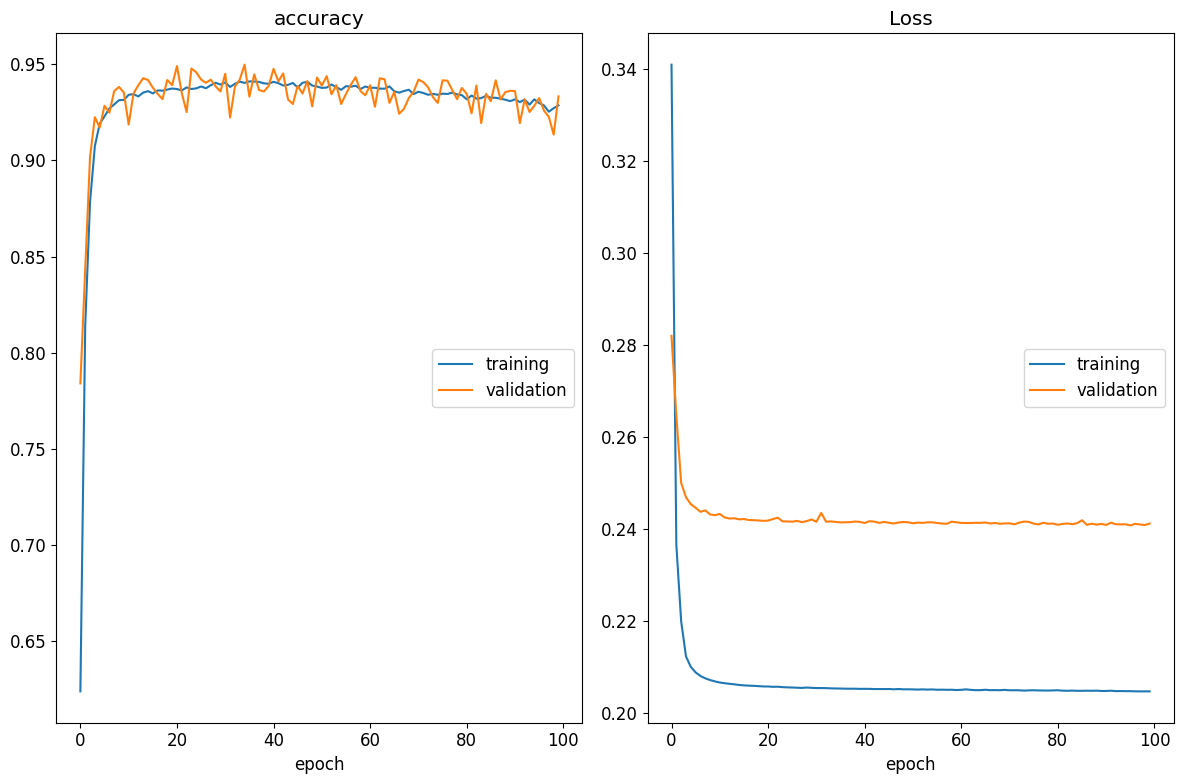

accuracy
	training         	 (min:    0.624, max:    0.941, cur:    0.929)
	validation       	 (min:    0.784, max:    0.950, cur:    0.933)
Loss
	training         	 (min:    0.205, max:    0.341, cur:    0.205)
	validation       	 (min:    0.241, max:    0.282, cur:    0.241)
691/691 [==============================] - 3s 4ms/step - loss: 0.2047 - accuracy: 0.9287 - val_loss: 0.2412 - val_accuracy: 0.9334
Loading pre-existing model
time: 5min (started: 2023-11-09 04:00:25 +00:00)


In [286]:
import os
mount_point = '/content/drive' # Always the same, don't change it
drive.mount(mount_point, force_remount=True)
drive_path = mount_point + '/My Drive/' # Always the same, don't change it
my_path = drive_path
nn_file = my_path + 'nn1.h5'

history = train_model(model, nn_file, X_tr_scaled, X_tr_scaled, seed=5,
                      max_epochs=100)
if os.path.isfile(nn_file):  # Use os.path.isfile() to check if the file exists
    print("Loading pre-existing model")
    model = load_model(nn_file)


####Training with a smaller learning rate

###### Trying a smaller learning rate to see if the loss decreases

In [97]:
model = make_autoencoder(layer_sizes=first_architecture, learning_rate=0.001)

time: 104 ms (started: 2023-11-09 02:37:22 +00:00)


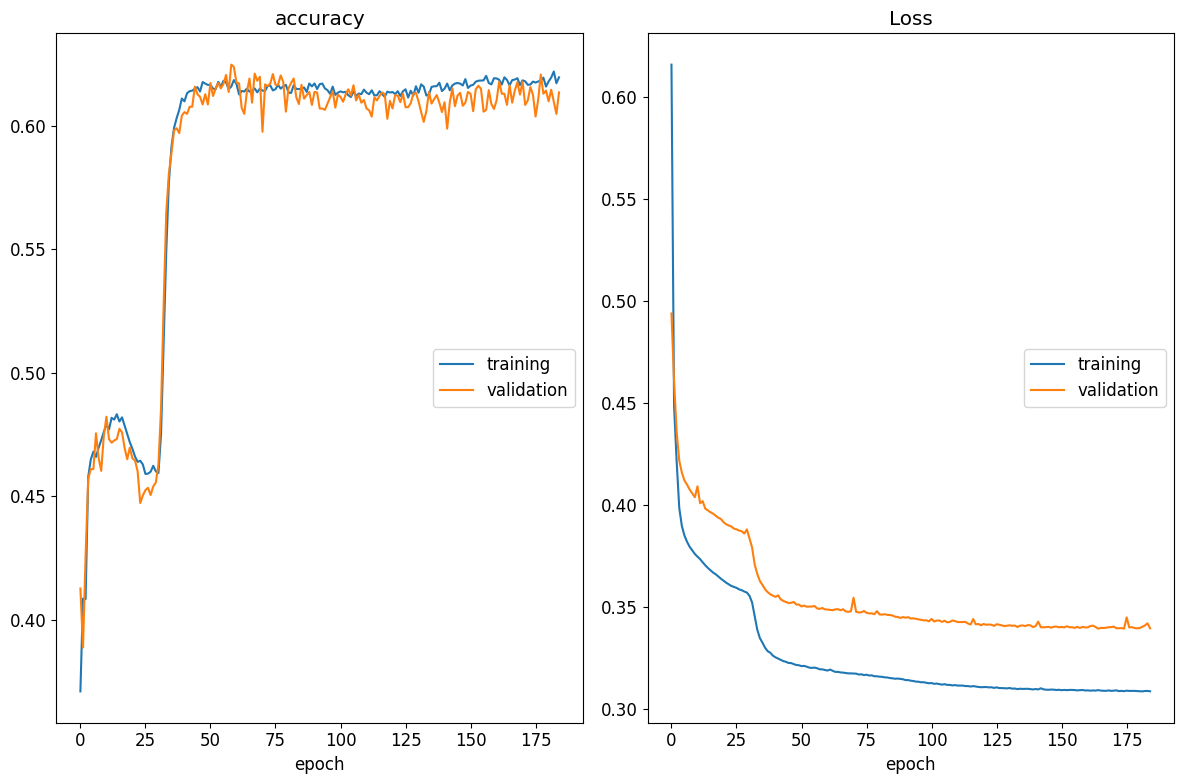

accuracy
	training         	 (min:    0.371, max:    0.622, cur:    0.620)
	validation       	 (min:    0.389, max:    0.625, cur:    0.613)
Loss
	training         	 (min:    0.309, max:    0.616, cur:    0.309)
	validation       	 (min:    0.339, max:    0.494, cur:    0.340)
Restoring model weights from the end of the best epoch: 165.
691/691 [==============================] - 3s 4ms/step - loss: 0.3087 - accuracy: 0.6195 - val_loss: 0.3395 - val_accuracy: 0.6134
Epoch 185: early stopping
time: 9min 51s (started: 2023-11-09 02:37:24 +00:00)


In [98]:
nn_file = my_path + 'nn1-lr_0.001.h5'
history = train_model(model, nn_file, X_tr_scaled, X_tr_scaled, seed=5,
                      max_epochs=200)

In [320]:
X_test_reconstr = model.predict(X_tr_scaled)
print(len(X_test_reconstr), len(X_tr_scaled))
anomaly_scores = np.linalg.norm(X_test_reconstr - X_tr_scaled, axis=1)
print(len(y_train))
print(len(anomaly_scores))

863/863 [==============================] - 2s 2ms/step
27612 27612
17257
27612
time: 2.01 s (started: 2023-11-09 04:24:33 +00:00)


ValueError: ignored

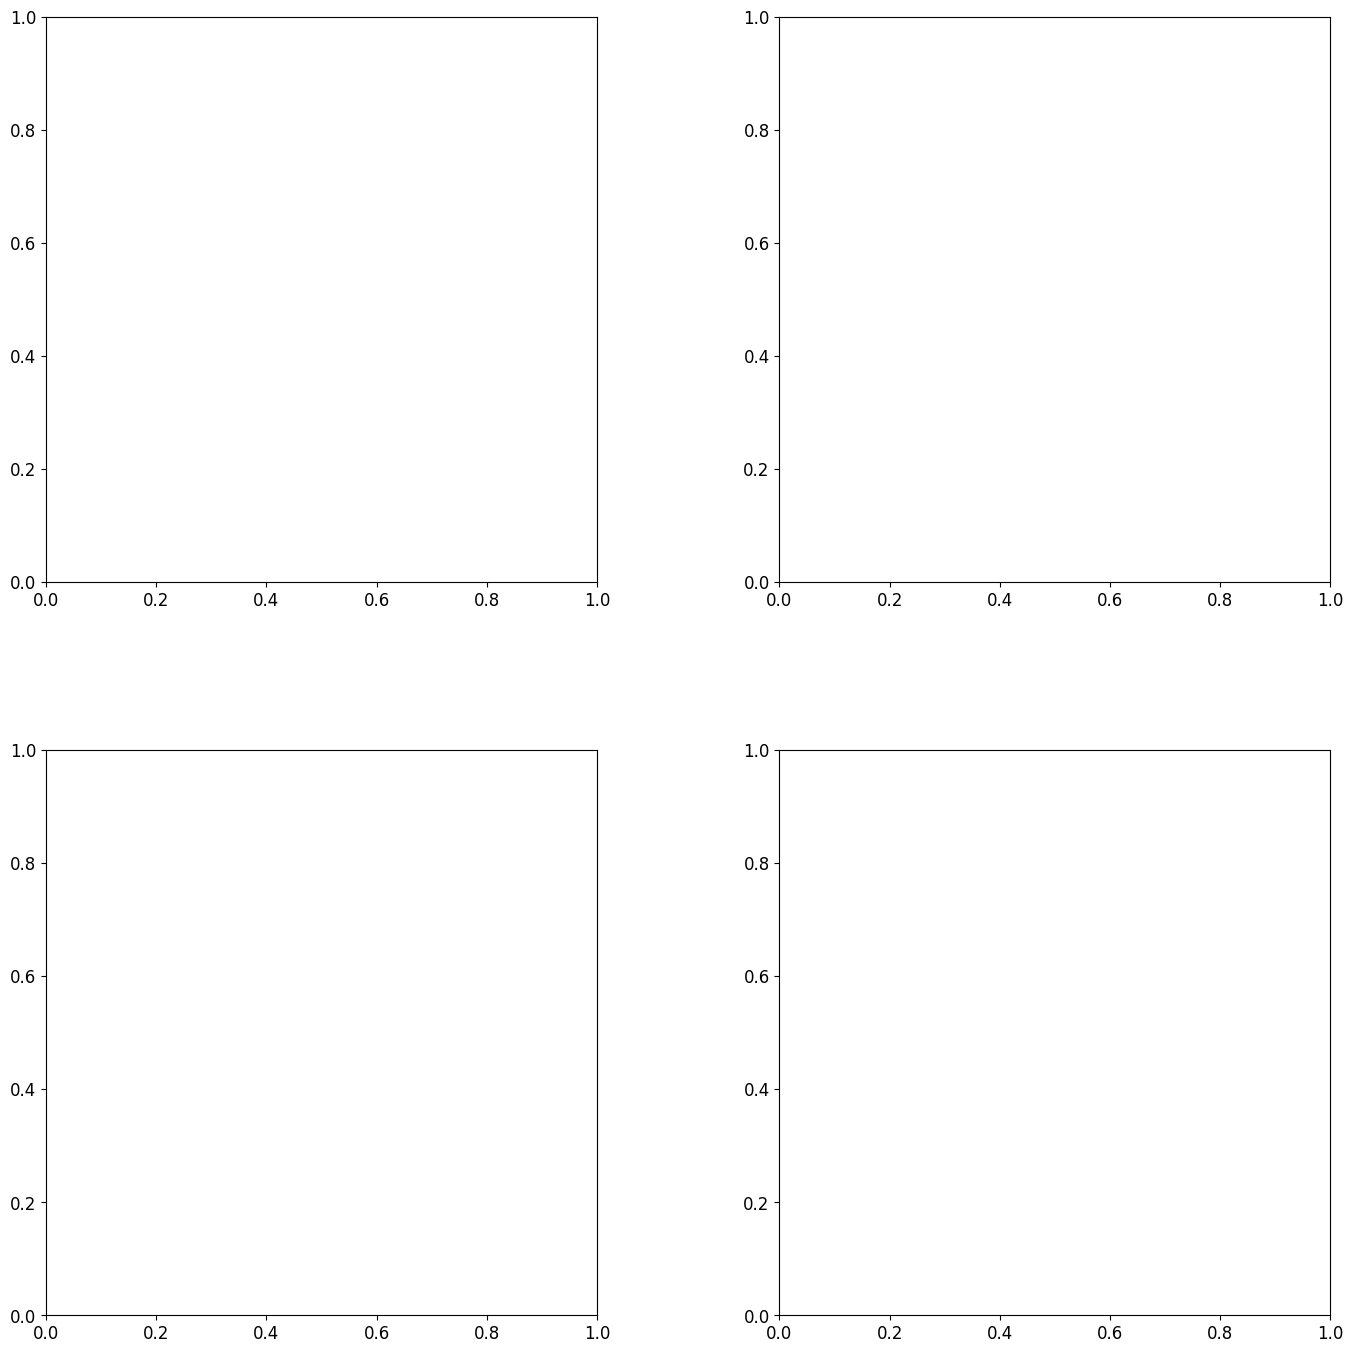

time: 873 ms (started: 2023-11-09 04:24:36 +00:00)


In [321]:
evaluate_anomaly_detector(y_train, anomaly_scores)

We did not manage to remarkably decrease the loss.



#### Threshold selection

###### Here we are selecting the threshold the anomaly score of each sample is the reconstruction error

In [293]:
X_tr_reconstr = model.predict(X_tr_scaled)
anomaly_scores = np.linalg.norm(X_tr_reconstr - X_tr_scaled, axis=1)

863/863 [==============================] - 1s 2ms/step
time: 1.76 s (started: 2023-11-09 04:10:22 +00:00)


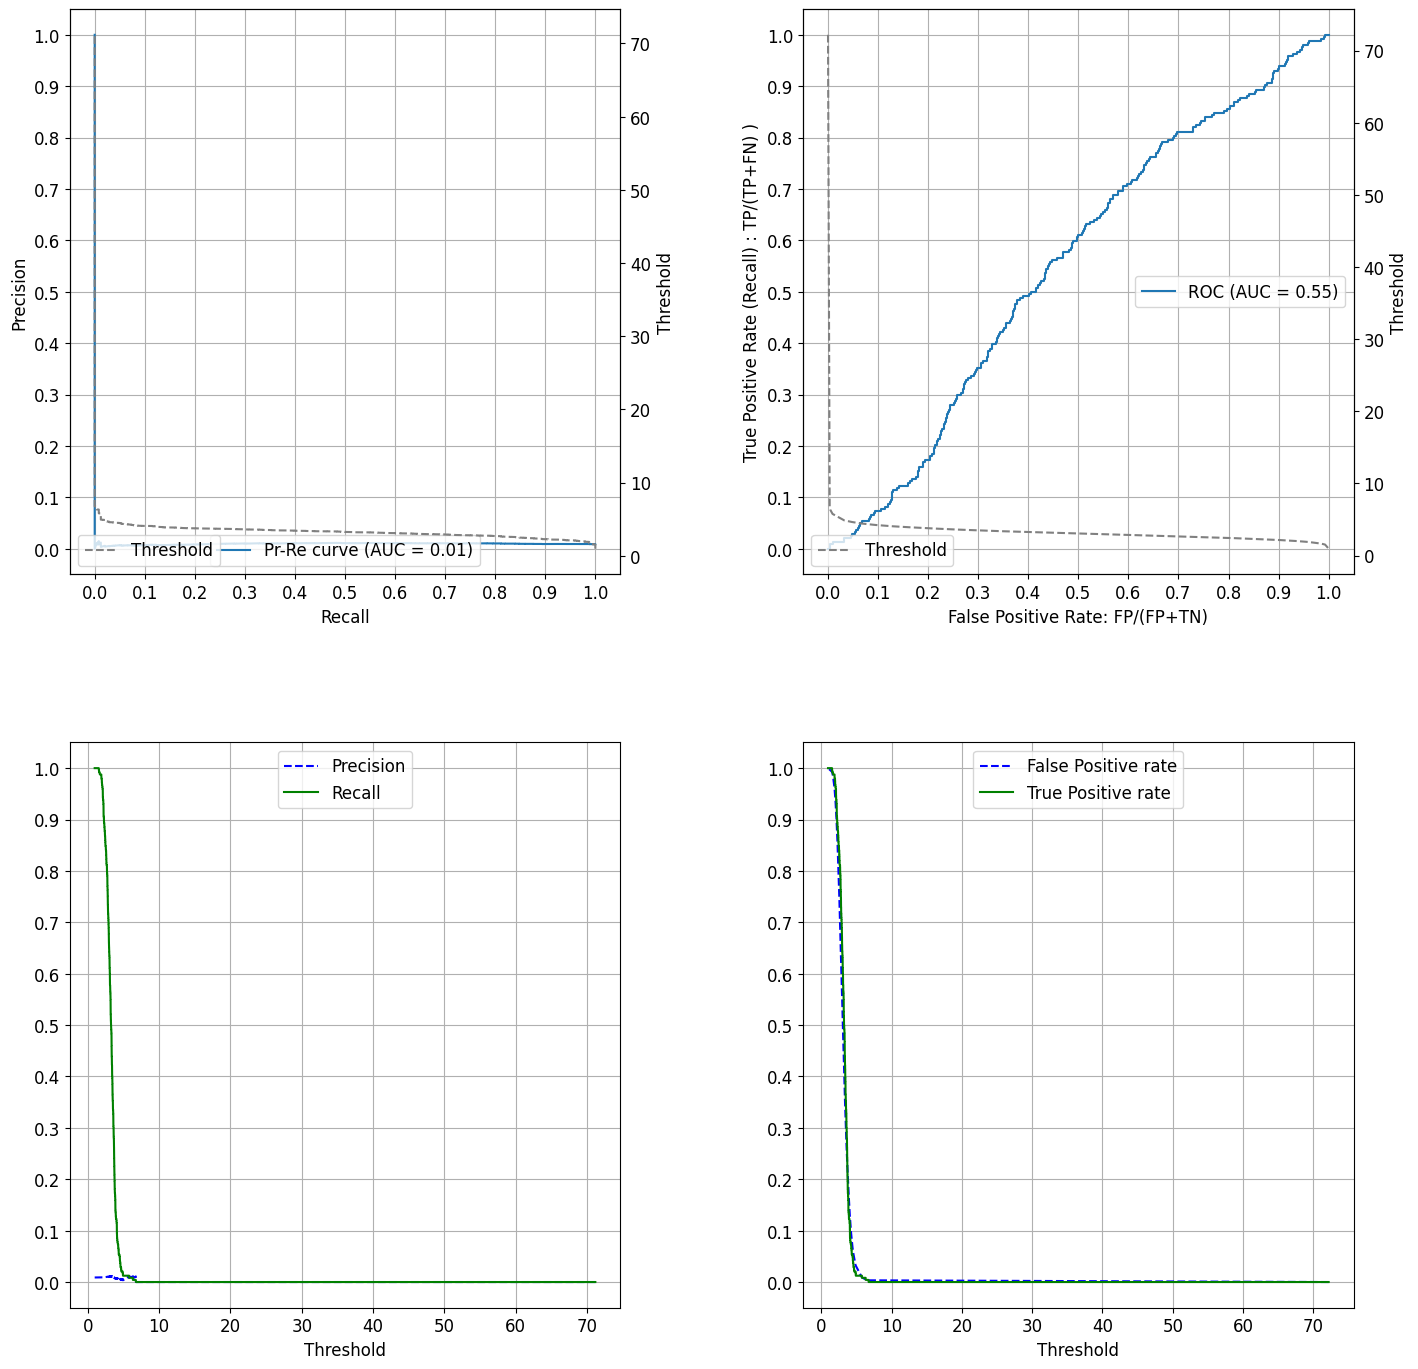

time: 2.57 s (started: 2023-11-09 04:25:59 +00:00)


In [327]:
evaluate_anomaly_detector(y_train, anomaly_scores)

Precision= 0.010673497705197993
Recall= 0.4098360655737705
False Positive Rate =  0.33868021046477637
True Positive Rate =  0.4098360655737705


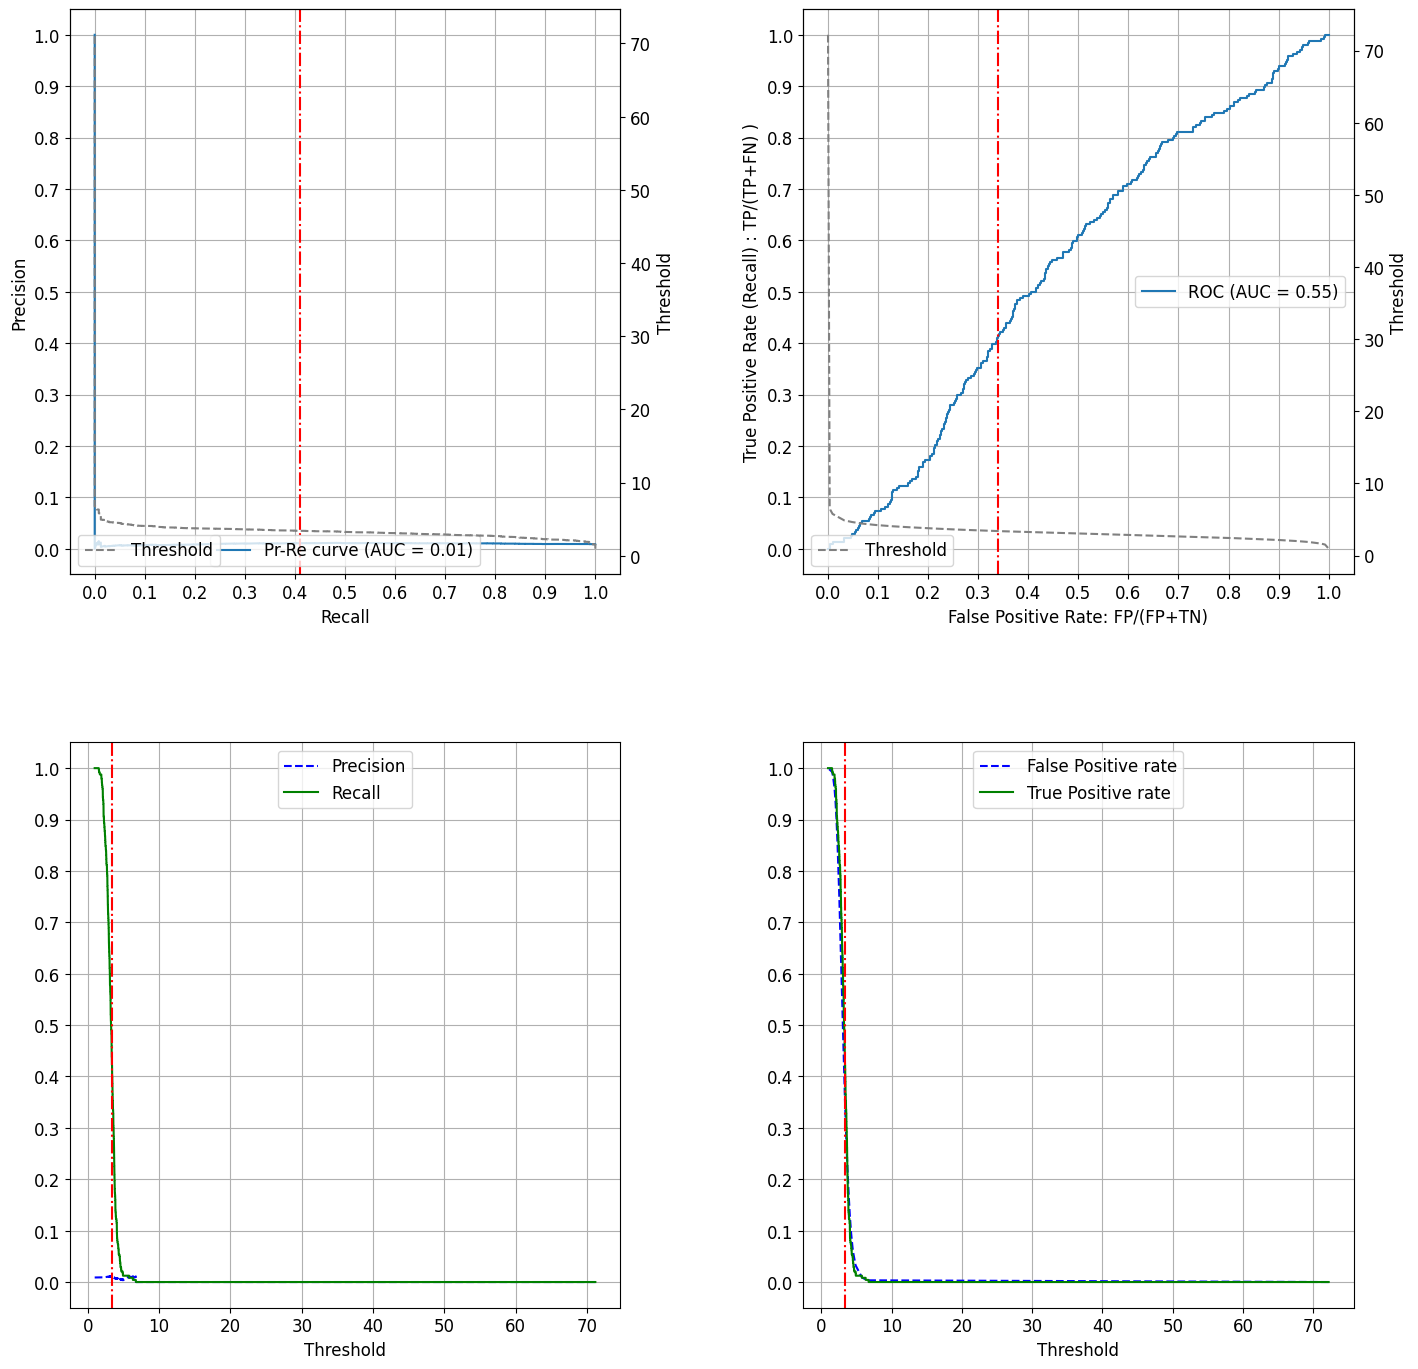

time: 3.99 s (started: 2023-11-09 04:28:03 +00:00)


In [332]:
threshold_selected = 3
evaluate_anomaly_detector(y_train, anomaly_scores, threshold_selected)

In [175]:
X_test_reconstr = model.predict(X_tr_scaled)
anomaly_scores = np.linalg.norm(X_test_reconstr - X_tr_scaled, axis=1)

y_pred = (anomaly_scores >= threshold_selected)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
fpr = false_positive_rate(y_test, y_pred)

print("Precision:", precision)
print("Recall: ", recall)
print("False Positive Rate:", fpr)
class_names = np.array(["normal", "fraud"])
plot_conf_mat(y_test, y_pred, class_names)

863/863 [==============================] - 1s 2ms/step


ValueError: ignored

time: 1.78 s (started: 2023-11-09 03:21:30 +00:00)


Trying without the flag

In [ ]:
df_auto_trial = df_auto.drop('flag_column')

### Autoencoder #2

Adding deeper layers to the autoencoder


In [177]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5,
                                      random_state=9)
n_features = X_tr_scaled.shape[1]
print("The number of features is ", n_features)


The number of features is  10
time: 22.8 ms (started: 2023-11-09 03:23:51 +00:00)


In [178]:
X, y = shuffle(X, y)


time: 25.4 ms (started: 2023-11-09 03:23:53 +00:00)


In [193]:
def build_model():
  act_fun = 'linear'
  model = Sequential([
      Dense(20, input_dim = 10, activation=act_fun), # Encoder
      Dense(10, activation=act_fun), ### Latent representation
      Dense(20, activation=act_fun), # Decoder
      Dense(10, activation=act_fun) # Decoder
  ])

  model.compile(loss='mean_squared_error', optimizer='adam')

  return model

time: 1.53 ms (started: 2023-11-09 03:33:54 +00:00)


In [194]:
def train_model(nn_file, X_tr, y_tr, epochs, overwrite=False):

  plot_cb = PlotLossesKerasTF() # Plots the loss during training
  checkpoint_cb = ModelCheckpoint(nn_file) # Stores weights
  logger_cb = CSVLogger(nn_file+'.csv', append=True) # Stores history


  if overwrite==True:
    os.remove(nn_file)
    os.remove(nn_file+'.csv')

  if not os.path.isfile(nn_file):
    model = build_model()
  else:
    model = load_model(nn_file)

  history = model.fit(X_tr, y_tr, epochs=epochs,
                      callbacks=[plot_cb, checkpoint_cb, logger_cb],
                      validation_split=0.2)

  return model

time: 1.08 ms (started: 2023-11-09 03:33:58 +00:00)


In [195]:

nn_file = my_path + 'nn2.h5'

model = train_model(nn_file, X_tr_scaled, X_tr_scaled, epochs=100)


Epoch 1/100


ValueError: ignored

time: 230 ms (started: 2023-11-09 03:34:02 +00:00)


We managed to reduce the loss. Now let's check the Precision and Recall and ROC curves.

In [ ]:
X_tr_reconstr = model.predict(X_train)
anomaly_scores = np.linalg.norm(X_tr_reconstr - X_train, axis=1)

540/540 [==============================] - 1s 2ms/step
time: 1.13 s (started: 2023-10-31 06:36:13 +00:00)


Precision= 0.008605851979345954
Recall= 0.695364238410596
False Positive Rate =  0.7071203086636269
True Positive Rate =  0.695364238410596


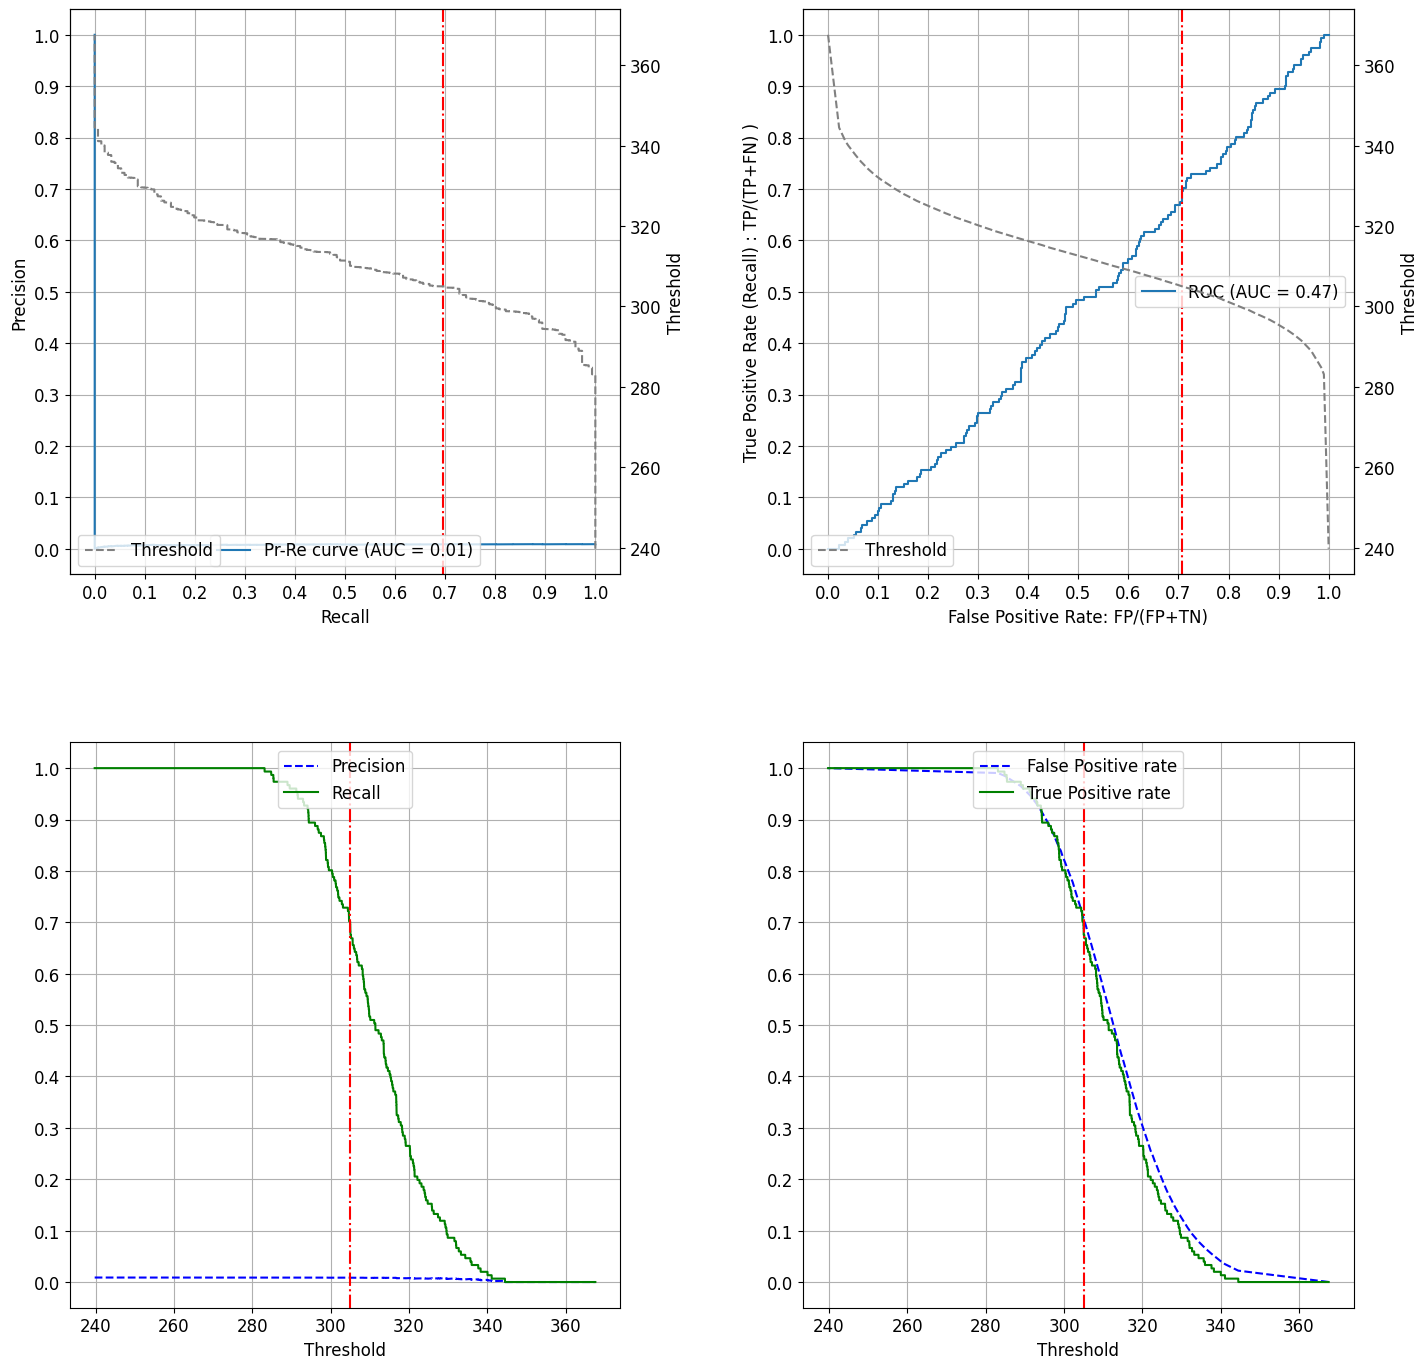

time: 2.87 s (started: 2023-10-31 06:38:28 +00:00)


In [ ]:
threshold_selected = 305
evaluate_anomaly_detector(y_train, anomaly_scores, threshold_selected)

### Autoencoder #3

In [184]:
def build_model():
  act_fun = 'linear'

  model = Sequential([
      Dense(27, input_dim = n_features, activation=act_fun), # Encoder
      Dense(25, activation=act_fun), # Encoder
      Dense(23, activation=act_fun), ### Latent representation
      Dense(25, activation=act_fun), # Decoder
      Dense(27, activation=act_fun), # Decoder
      Dense(n_features, activation=act_fun) # Decoder
  ])


  model.compile(loss='mean_squared_error', optimizer='adam')

  return model


time: 8.91 ms (started: 2023-11-09 03:25:39 +00:00)


In [185]:
X, y = shuffle(X, y)

time: 45.1 ms (started: 2023-11-09 03:25:43 +00:00)


In [186]:
nn_file = my_path + 'nn7.h5'

model = train_model(nn_file, X_tr_scaled, X_tr_scaled, epochs=50)

Epoch 1/50


ValueError: ignored

time: 1.04 s (started: 2023-11-09 03:25:44 +00:00)


In [ ]:
X_tr_reconstr = model.predict(X_train)
anomaly_scores = np.linalg.norm(X_tr_reconstr - X_train, axis=1)

540/540 [==============================] - 2s 3ms/step
time: 2.95 s (started: 2023-10-31 06:44:44 +00:00)


Precision= 0.008801855895196506
Recall= 0.8543046357615894
False Positive Rate =  0.8492341868350286
True Positive Rate =  0.8543046357615894


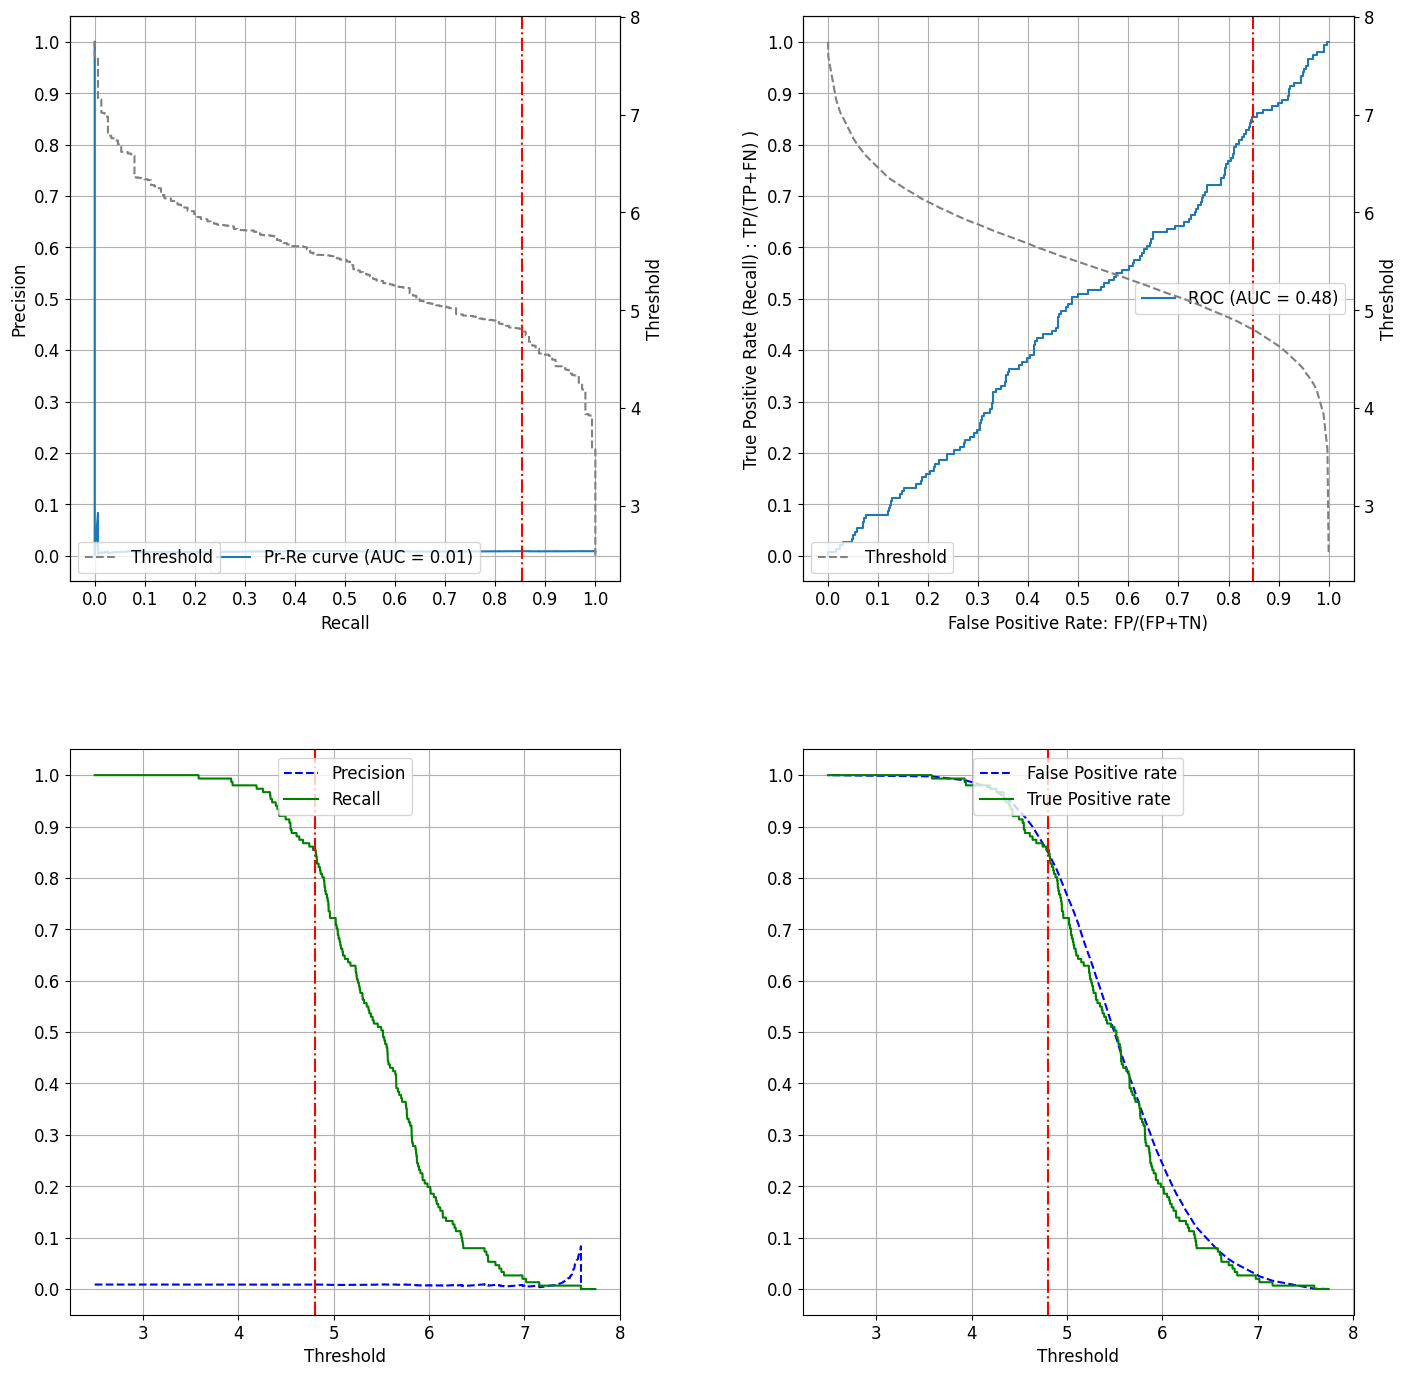

time: 6.68 s (started: 2023-10-31 07:01:35 +00:00)


In [ ]:
threshold_selected = 4.8
evaluate_anomaly_detector(y_train, anomaly_scores, threshold_selected)

In [ ]:
def build_model():

  model = Sequential([
      Dense(27, input_dim = n_features, activation=act_fun), # Encoder
      Dense(25, activation=act_fun), # Encoder
      Dense(23, activation=act_fun), ### Latent representation
      Dense(25, activation=act_fun), # Decoder
      Dense(27, activation=act_fun), # Decoder
      Dense(n_features, activation=act_fun) # Decoder
  ])


  model.compile(loss='mean_squared_error', optimizer='adam')

  return model

time: 8.61 ms (started: 2023-10-31 06:52:42 +00:00)


In [ ]:
nn_file = my_path + 'nn8.h5'


time: 557 µs (started: 2023-10-31 06:52:45 +00:00)


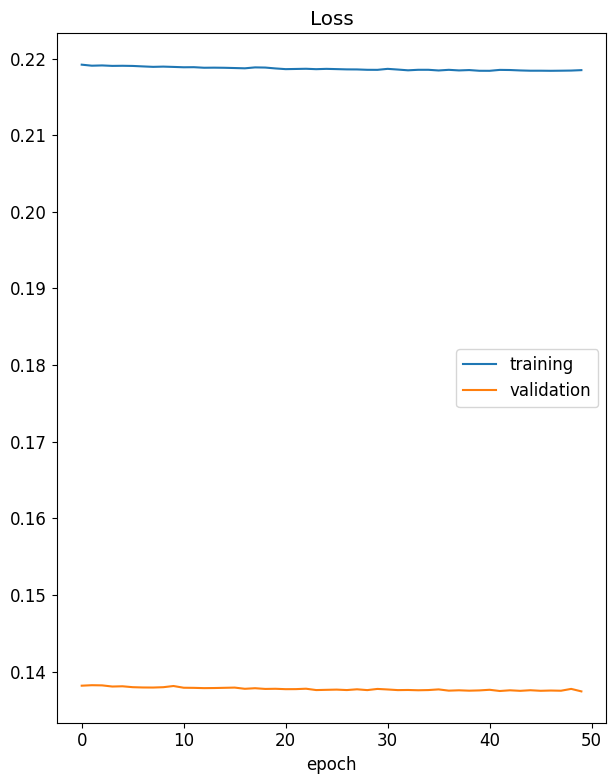

Loss
	training         	 (min:    0.218, max:    0.219, cur:    0.218)
	validation       	 (min:    0.137, max:    0.138, cur:    0.137)
432/432 [==============================] - 1s 3ms/step - loss: 0.2185 - val_loss: 0.1374
time: 1min 18s (started: 2023-10-31 06:52:48 +00:00)


In [ ]:
model = train_model(nn_file, X_tr_scaled, X_tr_scaled, epochs=50)


##Isolation forest


In [ ]:
np.random.seed(123)

time: 832 µs (started: 2023-11-07 13:53:38 +00:00)


In [ ]:
X_if, y_if = shuffle(X_projected,y)

time: 20.8 ms (started: 2023-11-07 13:53:48 +00:00)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_if, y_if, test_size=0.2, random_state=42, stratify=y)

time: 124 ms (started: 2023-11-07 13:53:50 +00:00)


In [ ]:
contamination_number = np.sum(y_train==1)/len(y_train.values.ravel())

clf = IsolationForest(n_estimators=1000,contamination=contamination_number)


clf.fit(X_train)

IsolationForest(contamination=0.008909169926119079, n_estimators=1000)

time: 25.3 s (started: 2023-11-07 13:53:51 +00:00)


In [ ]:
anomaly_scores = 0.5 - clf.decision_function(X_train)

time: 16.1 s (started: 2023-11-07 13:54:16 +00:00)


In [ ]:
print(anomaly_scores)

[0.42257152 0.50749392 0.38297756 ... 0.39750778 0.37788444 0.4611911 ]
time: 1.08 ms (started: 2023-11-07 13:54:32 +00:00)


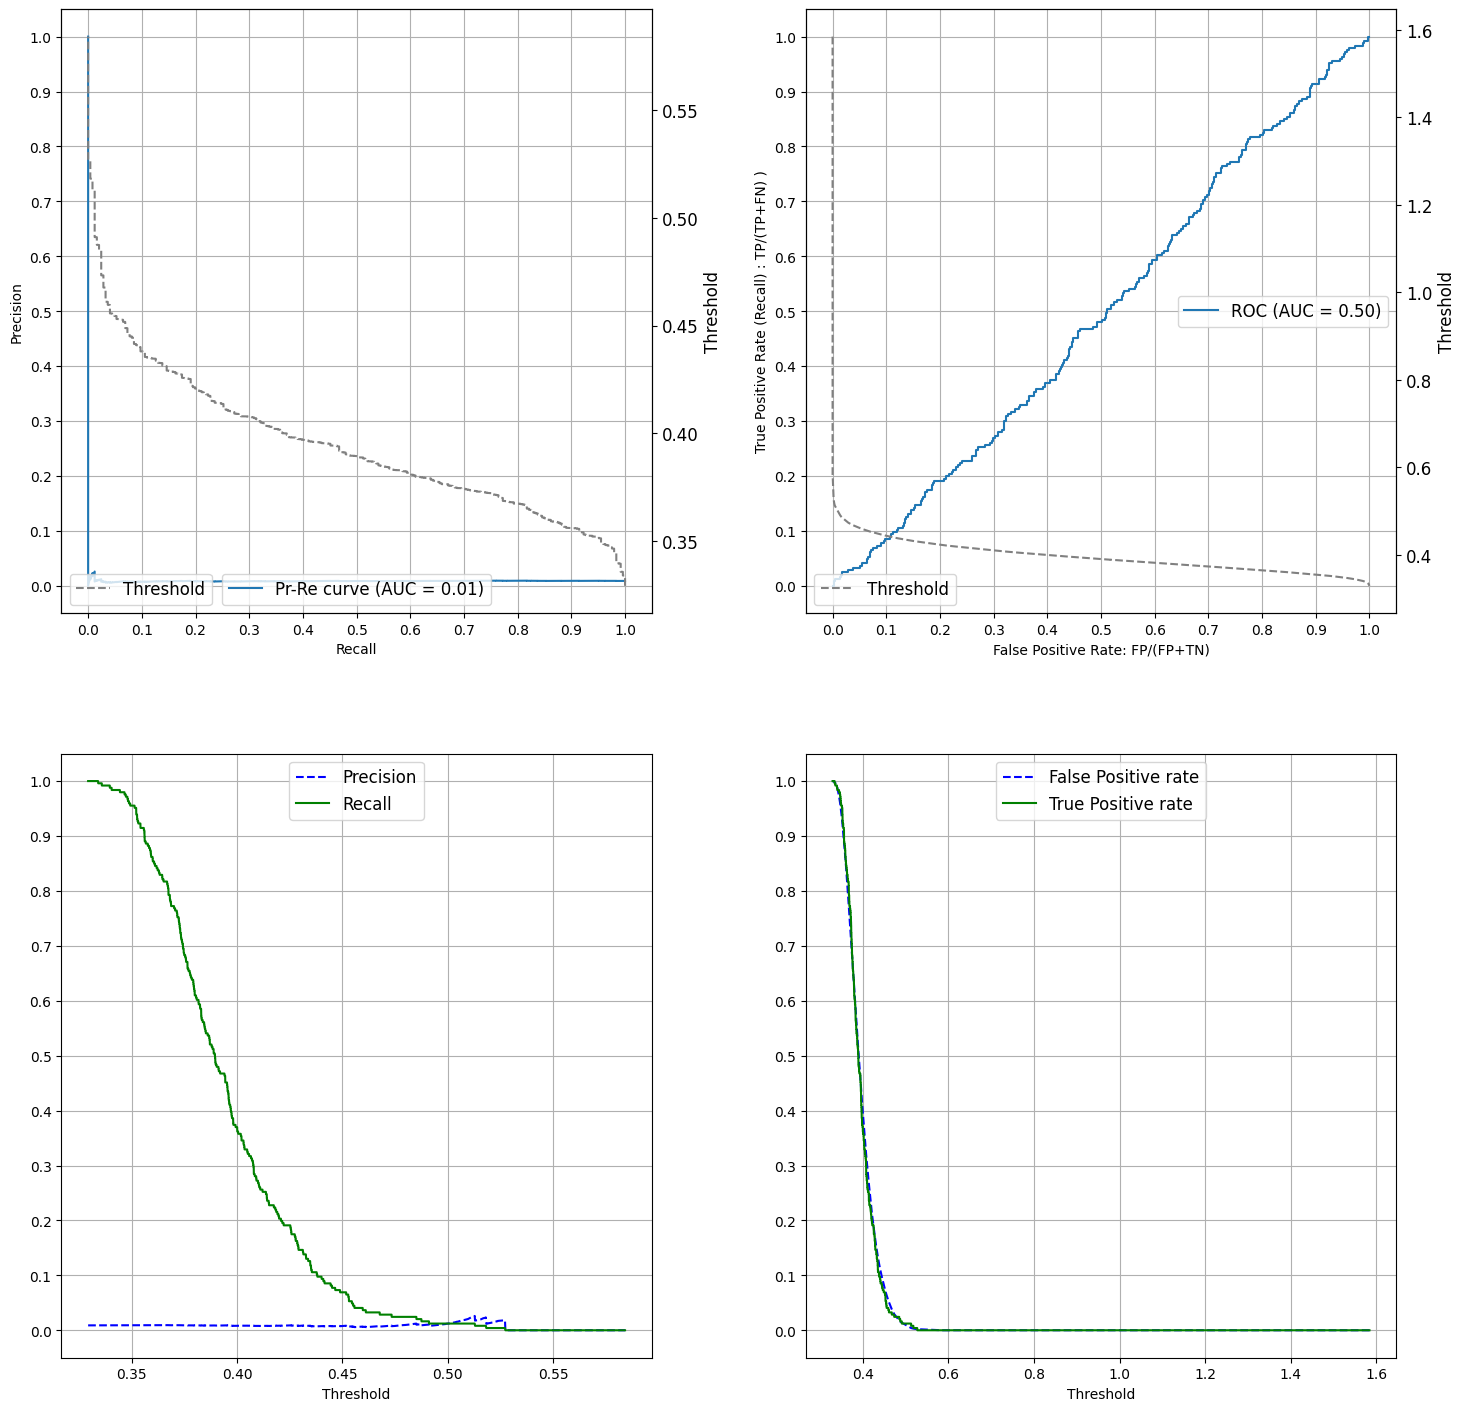

time: 2.64 s (started: 2023-11-07 13:54:32 +00:00)


In [ ]:
evaluate_anomaly_detector(y_train, anomaly_scores)

In [ ]:
print('roc auc test: {}'.format(roc_auc_score(y_test,clf.decision_function(X_test))))

roc auc test: 0.5113126430177615
time: 2.83 s (started: 2023-11-07 13:54:35 +00:00)


Precision= 0.008528020639243229
Recall= 0.483739837398374
False Positive Rate =  0.5055543374990864
True Positive Rate =  0.483739837398374


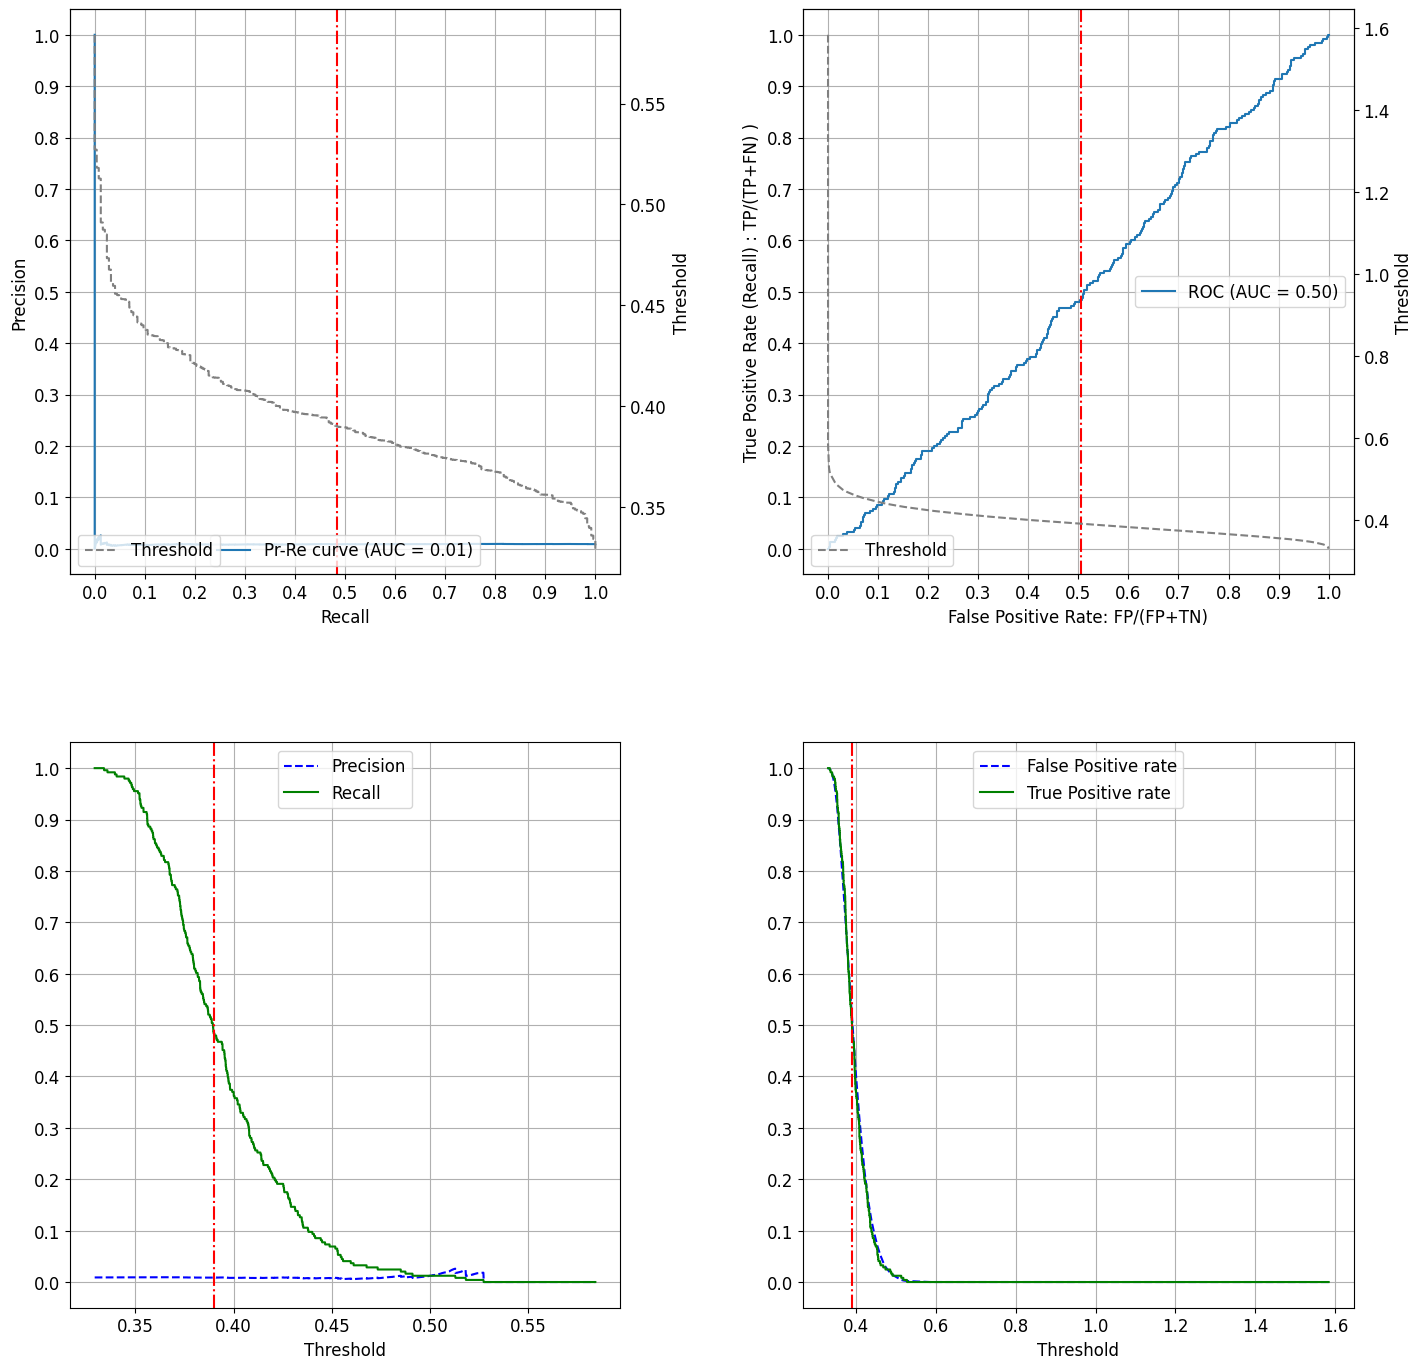

time: 3.43 s (started: 2023-11-07 13:54:53 +00:00)


In [ ]:
threshold_selected = 0.39

evaluate_anomaly_detector(y_train, anomaly_scores,
                          threshold_selected=threshold_selected)



In [ ]:
clf.fit(X_test)
an_scores = 0.5 - clf.decision_function(X_test)
print(an_scores)

[0.34205008 0.39216881 0.42317297 ... 0.44338852 0.4007268  0.38788482]
time: 5.78 s (started: 2023-11-07 13:55:16 +00:00)


In [ ]:
y_pred = (an_scores >= threshold_selected)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
fpr = false_positive_rate(y_test, y_pred)

print("precision=", precision)
print('recall=', recall)
print('false positive rate=', fpr)

precision= 0.008925914906277893
recall= 0.5084745762711864
false positive rate= 0.48670368205727643
time: 18.5 ms (started: 2023-11-07 13:55:22 +00:00)


Normalized confusion matrix
[[0.51329632 0.48670368]
 [0.49152542 0.50847458]]


<Axes: title={'center': 'Normalized confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

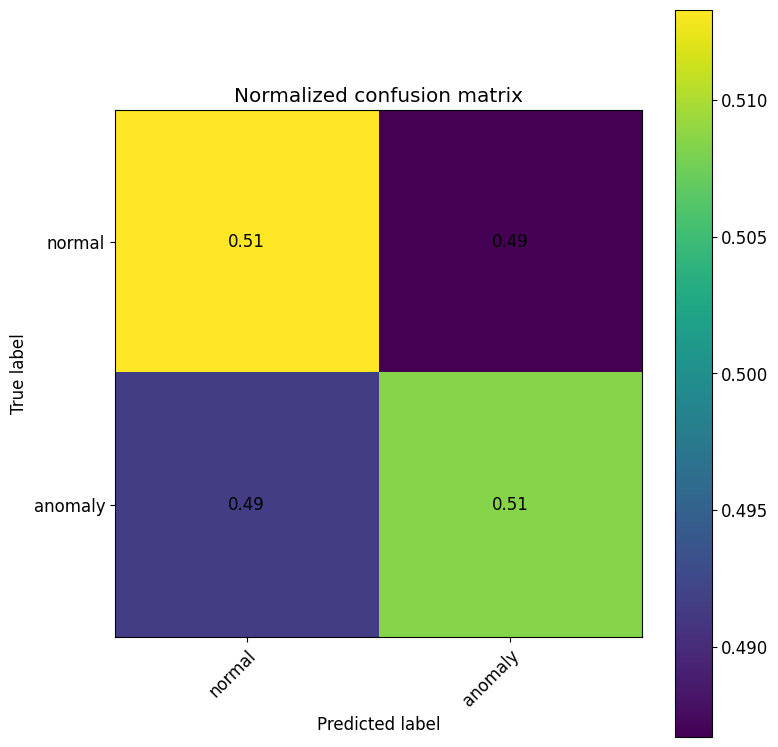

time: 351 ms (started: 2023-11-07 13:55:22 +00:00)


In [ ]:
class_names= np.array( ['normal', 'anomaly'] )
plot_conf_mat(y_test, y_pred, class_names)

## K means

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve, roc_curve



# I prepared these libraries for you
! wget https://raw.githubusercontent.com/andreaaraldo/machine-learning-for-networks/master/course_library/andrea_models.py
! wget https://raw.githubusercontent.com/andreaaraldo/machine-learning-for-networks/master/course_library/visualization.py
from andrea_models import subsample
from visualization import silhouette_diagram



--2023-11-05 16:15:10--  https://raw.githubusercontent.com/andreaaraldo/machine-learning-for-networks/master/course_library/andrea_models.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3190 (3.1K) [text/plain]
Saving to: ‘andrea_models.py.2’

andrea_models.py.2  100%[===================>]   3.12K  --.-KB/s    in 0s      

2023-11-05 16:15:11 (47.7 MB/s) - ‘andrea_models.py.2’ saved [3190/3190]

--2023-11-05 16:15:11--  https://raw.githubusercontent.com/andreaaraldo/machine-learning-for-networks/master/course_library/visualization.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.


In [ ]:
np.random.seed(9)
random.seed(9)



time: 675 µs (started: 2023-11-05 16:15:10 +00:00)


In [ ]:
K =3
model = KMeans(n_clusters=K)
clusters = model.fit_predict(X_projected)



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


time: 4.18 s (started: 2023-11-05 16:16:07 +00:00)


In [ ]:
clusters[0:5]

array([2, 0, 2, 1, 2], dtype=int32)

time: 12.5 ms (started: 2023-11-05 16:16:11 +00:00)


(array([15589.,     0.,     0.,     0.,     0.,  9630.,     0.,     0.,
            0.,  9296.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

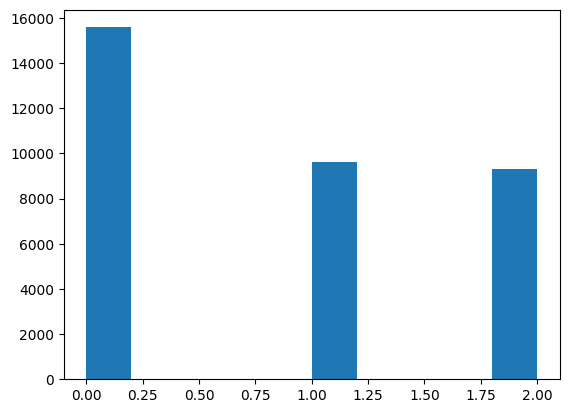

time: 611 ms (started: 2023-11-05 16:16:11 +00:00)


In [ ]:
plt.hist(clusters)




Inertia (sum of squared distances between a sample and its centroid)


In [ ]:
model.inertia_



12138119.386236543

time: 10 ms (started: 2023-11-05 16:16:13 +00:00)



Random initializations

In sklearn, Kmeans algorithm is repeated n_init times (by default 10), so to produce 10 models. The model with the smallest inertia is selected.

How to know if n_init is enough or we should increase it? Intuitively, the more the dimensions (features), the more random initializations we would need.

Suggestion: Repeat KMeans many times, increasing n_init until you see that the inertia stops improving.

To go fast, do this on a smaller subset.


In [ ]:
n_samples = 10000
X_sub = subsample(X_projected, n_samples)



time: 22.7 ms (started: 2023-11-05 16:15:25 +00:00)


Inertia with  10  initializations: 3583152.467927281
Inertia with  20  initializations: 3583159.6627645968
Inertia with  30  initializations: 3583127.7621224537
Inertia with  40  initializations: 3583166.745954371
Inertia with  50  initializations: 3583152.2053937386
Inertia with  60  initializations: 3583156.3592585064
Inertia with  70  initializations: 3583152.4399673603
Inertia with  80  initializations: 3583152.4399673603
Inertia with  90  initializations: 3583113.50106531
Inertia with  100  initializations: 3583151.0684897774
Inertia with  110  initializations: 3583114.232730028
Inertia with  120  initializations: 3583108.569577423
Inertia with  130  initializations: 3583107.845589523
Inertia with  140  initializations: 3583140.5461208485
Inertia with  150  initializations: 3583125.564862119
Inertia with  160  initializations: 3583134.1370386835
Inertia with  170  initializations: 3583113.50106531
Inertia with  180  initializations: 3583114.973239714
Inertia with  190  initializat

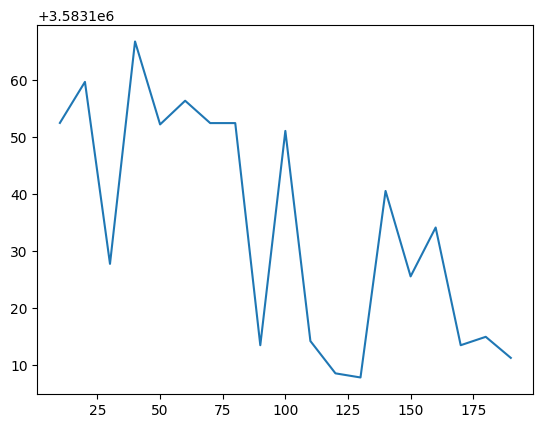

time: 2min 49s (started: 2023-11-05 16:16:52 +00:00)


In [ ]:
inertia_values = []

repeats = range(10, 200, 10)

for r in repeats:
  model = KMeans(K, n_init=r)
  model.fit_predict(X_sub)
  inertia_values.append(model.inertia_)
  print("Inertia with ", r, " initializations:", model.inertia_)

plt.plot(repeats, inertia_values)



In [ ]:
n_init = 75


time: 513 µs (started: 2023-11-05 16:21:53 +00:00)


Silhouette



To evaluate the goodness of clustering, we compute the silhouette score

=> Infeasible on the entire dataset!

Recall that you need to compute the distances between all samples, i.e

In [ ]:
print("Distances to be computed: ", "{:e}".format( X_scaled.shape[0]**2) )

Distances to be computed:  1.191285e+09
time: 819 µs (started: 2023-11-05 16:21:56 +00:00)




We will just check the silhouette on a random subset of samples.


In [ ]:
model = KMeans(K, n_init=n_init)
clusters = model.fit_predict(X_sub)


time: 8.9 s (started: 2023-11-05 16:21:59 +00:00)


In [ ]:
# The silhouette_score gives the average value for all the samples.
# This gives a perspective into the density and separation of the formed
# clusters
silhouette_avg = silhouette_score(X_sub, clusters)
silhouette_avg

0.2475519333955336

time: 1.57 s (started: 2023-11-05 16:22:21 +00:00)


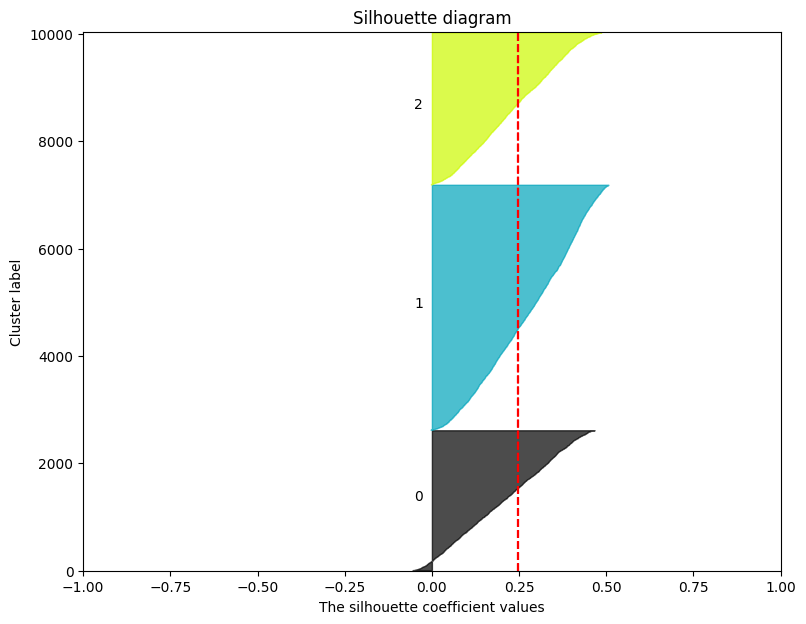

time: 2.97 s (started: 2023-11-05 16:22:25 +00:00)


In [ ]:
sample_silhouette_values = silhouette_diagram(X_sub, clusters, K)


For K= 2  the silhouette score is  0.27109324826633086
For K= 3  the silhouette score is  0.24750825212539407
For K= 4  the silhouette score is  0.22754525989834415
For K= 5  the silhouette score is  0.23588803418317345
For K= 6  the silhouette score is  0.22818565180473857
For K= 7  the silhouette score is  0.22486996238708357
For K= 8  the silhouette score is  0.22403339514484538
For K= 9  the silhouette score is  0.2236408083520705
For K= 10  the silhouette score is  0.2266643040204593
For K= 11  the silhouette score is  0.22612496295209103


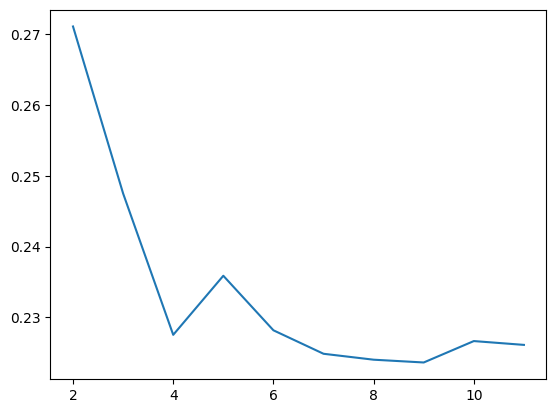

time: 2min 42s (started: 2023-11-05 16:25:38 +00:00)


In [ ]:

max_clusters = 12

scores = []

for K in range (2,max_clusters):
  # To avoid using always the same seed, let's change the random state every time
  model = KMeans(K, n_init=n_init)
  clusters = model.fit_predict(X_sub)

  silhouette_avg = silhouette_score(X_sub, clusters)
  scores.append(silhouette_avg)
  print ("For K=",K, " the silhouette score is ", silhouette_avg)

plt.plot(range (2,max_clusters), scores)



In [ ]:
K=2
n_init = 75


time: 852 µs (started: 2023-11-05 16:29:22 +00:00)



Anomaly detection

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_projected, y, test_size=0.5)



time: 13 ms (started: 2023-11-05 16:29:24 +00:00)


In [ ]:
model = KMeans(K, n_init=n_init)
clusters = model.fit_predict(X_train)



time: 7.16 s (started: 2023-11-05 16:29:26 +00:00)


In [ ]:
anomaly_scores = model.transform(X_train).min(axis=1)



time: 3.51 ms (started: 2023-11-05 16:29:33 +00:00)


Text(0.5, 0, 'Recall')

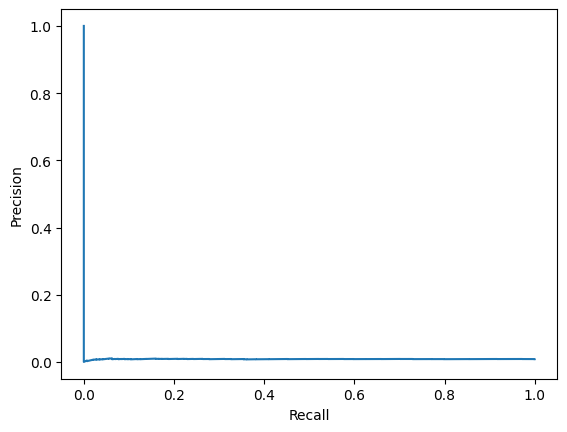

time: 242 ms (started: 2023-11-05 16:29:34 +00:00)


In [ ]:
precision, recall, thresholds = precision_recall_curve(y_train, anomaly_scores)
plt.plot(recall, precision)
plt.ylabel('Precision')
plt.xlabel('Recall')



## Feature ingenieering

In [ ]:
# Separate target variable Y from features X
features_list = list(df.columns[0:-2])
target_variable = 'Binar OP130_Resultat_Global_v'

X = df.loc[:,features_list]
y = df.loc[:,target_variable]

time: 3.89 ms (started: 2023-11-07 17:33:35 +00:00)


In [ ]:
X.head()

OP070_V_1_angle_value  OP090_SnapRingPeakForce_value  \
0                  180.4                         190.51   
1                  138.7                         147.70   
2                  180.9                         150.87   
3                  173.5                         159.56   
4                  174.5                         172.29   

   OP070_V_2_angle_value  OP120_Rodage_I_mesure_value  \
0                  173.1                       113.64   
1                  163.5                       109.77   
2                  181.2                       109.79   
3                  151.8                       113.25   
4                  177.5                       112.88   

   OP090_SnapRingFinalStroke_value  OP110_Vissage_M8_torque_value  \
0                            12.04                          12.16   
1                            12.12                          12.19   
2                            11.86                          12.24   
3                            11.82                          12.35   
4                            12.07                          12.19   

   OP120_Rodage_U_mesure_value  OP070_V_1_torque_value  \
0                        11.97                    6.62   
1                        11.97                    6.41   
2                        11.97                    6.62   
3                        11.97                    6.62   
4                        11.97                    6.62   

   OP090_StartLinePeakForce_value  OP110_Vissage_M8_angle_value  \
0                           26.37                          18.8   
1                           21.03                          18.5   
2                           25.81                          17.5   
3                           24.62                          15.6   
4                           29.22                          33.6   

   OP090_SnapRingMidPointForce_val  OP070_V_2_torque_value  
0                           109.62                    6.60  
1                           105.48                    6.40  
2                           100.03                    6.61  
3                           104.94                    6.61  
4                            99.19                    6.61

time: 20.1 ms (started: 2023-11-07 17:33:37 +00:00)


### New features based on correlation

In [ ]:
# Calculate the correlation matrix for the features in X
feature_correlations = X.corr()

# Get the upper triangle of the correlation matrix (excluding the diagonal)
upper_triangle = feature_correlations.where(np.triu(np.ones(feature_correlations.shape), k=1).astype(bool))

# Filter correlations greater than 0.5 (you can adjust the threshold)
high_correlations = upper_triangle[abs(upper_triangle) > 0.5].stack().reset_index()

# Rename columns for clarity
high_correlations.columns = ['Feature 1', 'Feature 2', 'Correlation']

# Sort by absolute correlation in descending order
high_correlations = high_correlations.sort_values(by='Correlation', key=abs, ascending=False)

# Print the correlations greater than 0.5
print("High Correlations between Features:")
print(high_correlations)

High Correlations between Features:
                        Feature 1                        Feature 2  \
1          OP070_V_1_torque_value           OP070_V_2_torque_value   
2  OP090_StartLinePeakForce_value  OP090_SnapRingMidPointForce_val   
3  OP090_StartLinePeakForce_value           OP070_V_2_torque_value   
0          OP070_V_1_torque_value   OP090_StartLinePeakForce_value   

   Correlation  
1     0.896698  
2     0.620728  
3     0.562435  
0     0.543089  
time: 34.8 ms (started: 2023-11-07 17:33:38 +00:00)


In [ ]:
# Define a function to create new features
def create_new_features(X):
    # Create new features for Pair 1
    X['torque_product'] = X['OP070_V_1_torque_value'] * X['OP070_V_2_torque_value']
    X['torque_ratio'] = X['OP070_V_1_torque_value'] / X['OP070_V_2_torque_value']

    # Create new features for Pair 2
    X['force_product'] = X['OP090_StartLinePeakForce_value'] * X['OP090_SnapRingMidPointForce_val']
    X['force_ratio'] = X['OP090_StartLinePeakForce_value'] / X['OP090_SnapRingMidPointForce_val']
    X['force_difference'] = X['OP090_StartLinePeakForce_value'] - X['OP090_SnapRingMidPointForce_val']

    # Create new features for Pair 3
    X['force_torque_product'] = X['OP090_StartLinePeakForce_value'] * X['OP070_V_2_torque_value']
    X['force_torque_ratio'] = X['OP090_StartLinePeakForce_value'] / X['OP070_V_2_torque_value']

    return X

# Create new features
X_with_new_features = create_new_features(X)



time: 7.24 ms (started: 2023-11-07 17:33:40 +00:00)


In [ ]:
X.head()

OP070_V_1_angle_value  OP090_SnapRingPeakForce_value  \
0                  180.4                         190.51   
1                  138.7                         147.70   
2                  180.9                         150.87   
3                  173.5                         159.56   
4                  174.5                         172.29   

   OP070_V_2_angle_value  OP120_Rodage_I_mesure_value  \
0                  173.1                       113.64   
1                  163.5                       109.77   
2                  181.2                       109.79   
3                  151.8                       113.25   
4                  177.5                       112.88   

   OP090_SnapRingFinalStroke_value  OP110_Vissage_M8_torque_value  \
0                            12.04                          12.16   
1                            12.12                          12.19   
2                            11.86                          12.24   
3                            11.82                          12.35   
4                            12.07                          12.19   

   OP120_Rodage_U_mesure_value  OP070_V_1_torque_value  \
0                        11.97                    6.62   
1                        11.97                    6.41   
2                        11.97                    6.62   
3                        11.97                    6.62   
4                        11.97                    6.62   

   OP090_StartLinePeakForce_value  OP110_Vissage_M8_angle_value  \
0                           26.37                          18.8   
1                           21.03                          18.5   
2                           25.81                          17.5   
3                           24.62                          15.6   
4                           29.22                          33.6   

   OP090_SnapRingMidPointForce_val  OP070_V_2_torque_value  torque_product  \
0                           109.62                    6.60         43.6920   
1                           105.48                    6.40         41.0240   
2                           100.03                    6.61         43.7582   
3                           104.94                    6.61         43.7582   
4                            99.19                    6.61         43.7582   

   torque_ratio  force_product  force_ratio  force_difference  \
0      1.003030      2890.6794     0.240558            -83.25   
1      1.001562      2218.2444     0.199374            -84.45   
2      1.001513      2581.7743     0.258023            -74.22   
3      1.001513      2583.6228     0.234610            -80.32   
4      1.001513      2898.3318     0.294586            -69.97   

   force_torque_product  force_torque_ratio  
0              174.0420            3.995455  
1              134.5920            3.285938  
2              170.6041            3.904690  
3              162.7382            3.724660  
4              193.1442            4.420575

time: 31.6 ms (started: 2023-11-07 17:33:41 +00:00)


In [ ]:
from sklearn.model_selection import cross_val_score


time: 447 µs (started: 2023-11-07 17:33:43 +00:00)


In [ ]:
X_with_new_features.columns[X_with_new_features.isnull().any()].tolist()

['force_ratio']

time: 5.83 ms (started: 2023-11-07 17:33:43 +00:00)


In [ ]:
print("NaN of force_ratio = ", X_with_new_features['force_ratio'].isna().sum() )

NaN of force_ratio =  3
time: 2.6 ms (started: 2023-11-07 17:33:44 +00:00)


In [ ]:
from sklearn.impute import SimpleImputer

# Create an imputer to fill missing values in 'force_ratio'
imputer = SimpleImputer(strategy='mean')  # You can choose another strategy if needed

# Impute the missing values in the 'force_ratio' column
X['force_ratio'] = imputer.fit_transform(X[['force_ratio']])

time: 19.2 ms (started: 2023-11-07 17:33:45 +00:00)


In [ ]:
df_new = pd.concat([X_with_new_features, y], axis=1)
columns_to_drop = [
    'OP070_V_1_torque_value',
    'OP070_V_2_torque_value',
    'OP090_StartLinePeakForce_value',
    'OP090_SnapRingMidPointForce_val',
    'OP090_StartLinePeakForce_value',
    'OP070_V_2_torque_value'
]
X_with_new_features = X_with_new_features.drop(columns=columns_to_drop)

df_new = df_new.drop(columns=columns_to_drop)
# Calculate the correlation between X_new features and y
correlation_with_y = df_new.corr()[y.name]

# Display or print the correlation coefficients
print(correlation_with_y)

OP070_V_1_angle_value             -0.012793
OP090_SnapRingPeakForce_value     -0.007290
OP070_V_2_angle_value             -0.006342
OP120_Rodage_I_mesure_value        0.003763
OP090_SnapRingFinalStroke_value    0.015148
OP110_Vissage_M8_torque_value     -0.002984
OP120_Rodage_U_mesure_value       -0.010492
OP110_Vissage_M8_angle_value       0.005470
torque_product                    -0.039571
torque_ratio                       0.002453
force_product                      0.013320
force_ratio                        0.002028
force_difference                  -0.012501
force_torque_product               0.004927
force_torque_ratio                 0.017308
Binar OP130_Resultat_Global_v      1.000000
Name: Binar OP130_Resultat_Global_v, dtype: float64
time: 44.5 ms (started: 2023-11-07 17:33:46 +00:00)


In [ ]:
columns_to_drop = [
  'torque_ratio',
  'force_torque_product',
  'force_ratio',
  'force_difference',
]
X_with_new_features = X_with_new_features.drop(columns=columns_to_drop)



time: 6.25 ms (started: 2023-11-07 17:39:28 +00:00)


In [ ]:
X_with_new_features

OP070_V_1_angle_value  OP090_SnapRingPeakForce_value  \
0                      180.4                         190.51   
1                      138.7                         147.70   
2                      180.9                         150.87   
3                      173.5                         159.56   
4                      174.5                         172.29   
...                      ...                            ...   
34510                  158.2                         168.40   
34511                  139.4                         146.24   
34512                  165.5                         157.34   
34513                  152.4                         165.07   
34514                  197.8                         150.37   

       OP070_V_2_angle_value  OP120_Rodage_I_mesure_value  \
0                      173.1                       113.64   
1                      163.5                       109.77   
2                      181.2                       109.79   
3                      151.8                       113.25   
4                      177.5                       112.88   
...                      ...                          ...   
34510                  180.6                       110.65   
34511                  154.5                       108.14   
34512                  149.8                       112.77   
34513                  140.0                       111.19   
34514                  190.3                       113.81   

       OP090_SnapRingFinalStroke_value  OP110_Vissage_M8_torque_value  \
0                                12.04                          12.16   
1                                12.12                          12.19   
2                                11.86                          12.24   
3                                11.82                          12.35   
4                                12.07                          12.19   
...                                ...                            ...   
34510                            11.88                          12.23   
34511                            12.04                          12.27   
34512                            12.09                          12.17   
34513                            12.06                          12.34   
34514                            11.84                          12.23   

       OP120_Rodage_U_mesure_value  OP110_Vissage_M8_angle_value  \
0                            11.97                          18.8   
1                            11.97                          18.5   
2                            11.97                          17.5   
3                            11.97                          15.6   
4                            11.97                          33.6   
...                            ...                           ...   
34510                        11.98                          14.8   
34511                        11.97                          15.5   
34512                        11.97                          24.4   
34513                        11.97                          13.6   
34514                        11.97                          21.5   

       torque_product  force_product  force_torque_ratio  
0             43.6920      2890.6794            3.995455  
1             41.0240      2218.2444            3.285938  
2             43.7582      2581.7743            3.904690  
3             43.7582      2583.6228            3.724660  
4             43.7582      2898.3318            4.420575  
...               ...            ...                 ...  
34510         43.6921      2373.2028            3.635401  
34511         41.0240      2116.9224            3.362500  
34512         43.8244      2104.6380            3.421450  
34513         43.5600      2102.1317            3.146970  
34514         42.8314      2714.8896            3.992447  

[34515 rows x 11 columns]

time: 29.7 ms (started: 2023-11-07 17:39:30 +00:00)


###Binary classification with Logistic Regression

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_with_new_features, y, test_size=0.2, random_state=42, stratify=y)

time: 18.6 ms (started: 2023-11-07 17:39:33 +00:00)


Apply normalization

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

time: 10.6 ms (started: 2023-11-07 17:39:34 +00:00)


In [ ]:
y_train.value_counts()

0    27368
1      244
Name: Binar OP130_Resultat_Global_v, dtype: int64

time: 5.24 ms (started: 2023-11-07 17:39:34 +00:00)


In [ ]:
y_test.value_counts()

0    6842
1      61
Name: Binar OP130_Resultat_Global_v, dtype: int64

time: 4.79 ms (started: 2023-11-07 17:39:34 +00:00)


Class balance

In [ ]:
smote = SMOTE()

X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)
pd.value_counts(y_train_balanced)

0    27368
1    27368
Name: Binar OP130_Resultat_Global_v, dtype: int64

time: 21.4 ms (started: 2023-11-07 17:39:34 +00:00)


In [ ]:
model_lr = LogisticRegression(C=1, max_iter = 1000)
model_lr.fit(X_train_balanced, y_train_balanced)
X_test_scaled = scaler.transform(X_test)
y_pred_lr = model_lr.predict(X_test_scaled)
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.99      0.67      0.80      6842
           1       0.02      0.62      0.03        61

    accuracy                           0.67      6903
   macro avg       0.51      0.64      0.41      6903
weighted avg       0.99      0.67      0.79      6903

time: 119 ms (started: 2023-11-07 17:39:34 +00:00)


Normalized confusion matrix
[[0.66559486 0.33440514]
 [0.37704918 0.62295082]]


<Axes: title={'center': 'Normalized confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

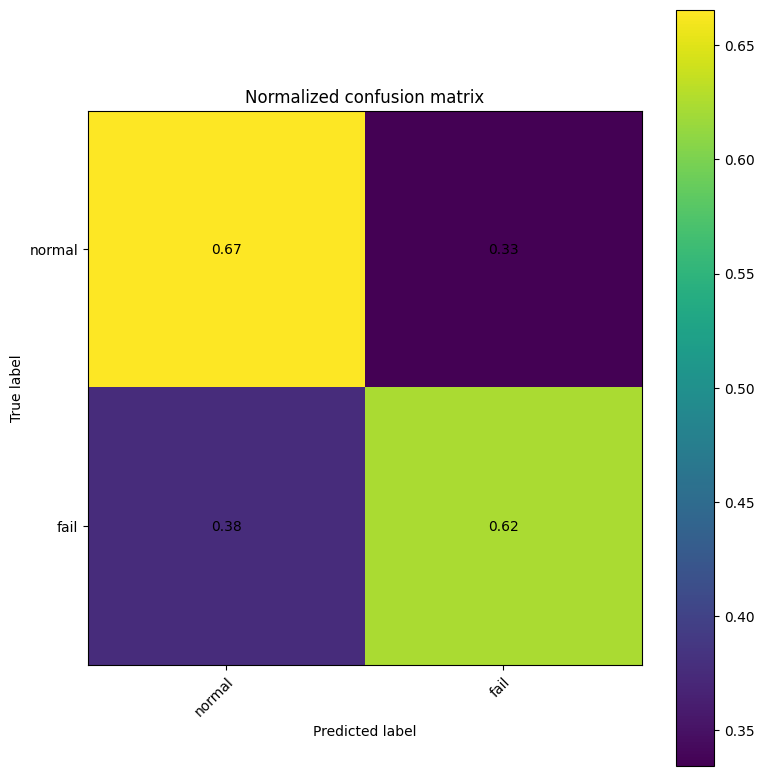

time: 367 ms (started: 2023-11-07 17:39:34 +00:00)


In [ ]:
class_names= np.array( ['normal', 'fail'] )
plot_conf_mat(y_test, y_pred_lr, class_names)

In [ ]:
auc = roc_auc_score(y_test, y_pred_lr)
print("AUC on the test set:", auc)
accuracy = accuracy_score(y_test, y_pred_lr)
print("Accuracy:", accuracy)
# Precision
precision = precision_score(y_test, y_pred_lr)
print("Precision:", precision)
# Recall
recall = recall_score(y_test, y_pred_lr)
print("Recall:", recall)

AUC on the test set: 0.6442728374887987
Accuracy: 0.6652180211502245
Precision: 0.01633705932932072
Recall: 0.6229508196721312
time: 17 ms (started: 2023-11-07 17:39:34 +00:00)


###Interpretable ML for Binary classification



In [ ]:
!pip install -q shap


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 5.5 MB/s eta 0:00:00
time: 8.25 s (started: 2023-11-07 17:40:17 +00:00)


In [ ]:
import shap

time: 10.5 s (started: 2023-11-07 17:40:26 +00:00)


In [ ]:
explainer = shap.Explainer(model_lr, X_train)

time: 20.9 ms (started: 2023-11-07 17:40:42 +00:00)


In [ ]:
shap_values = explainer(X_test)

time: 1.45 s (started: 2023-11-07 17:40:51 +00:00)


In [ ]:
mean_abs_shap = np.mean(np.abs(shap_values.values), axis=0)

time: 9.32 ms (started: 2023-11-07 17:40:54 +00:00)


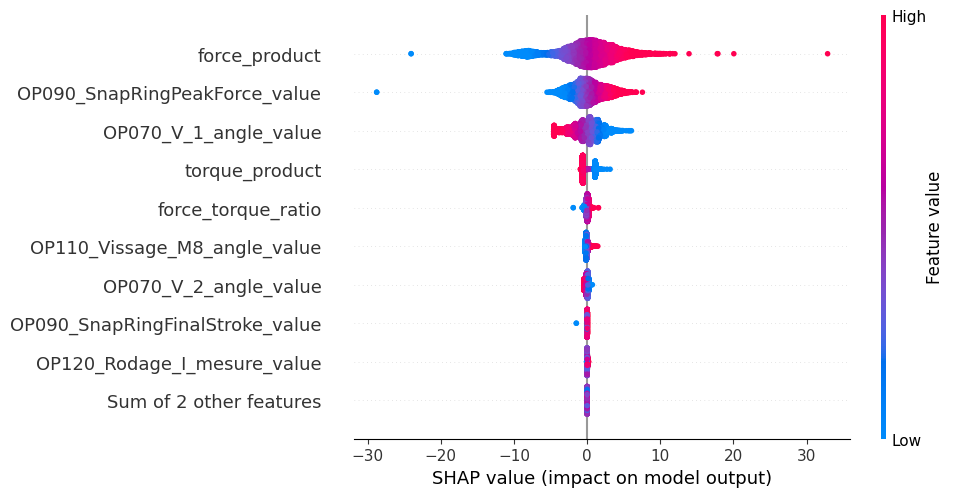

time: 5.7 s (started: 2023-11-07 17:40:56 +00:00)


In [ ]:
shap.plots.beeswarm(shap_values)

In [ ]:
threshold = 0.1 # Set a threshold for feature selection
selected_features = X.columns[mean_abs_shap > threshold] # Identify features with mean absolute SHAP values above the threshold
X_selected = X[selected_features] # Subset the data with selected features
print("Selected Features:", selected_features)


IndexError: ignored

time: 63.1 ms (started: 2023-11-07 17:41:41 +00:00)


In [ ]:
selected_features = ['force_product']

X_selected = X[selected_features]  # Subset the data with selected features
print("Selected Features:", selected_features)


Selected Features: ['force_product']
time: 8.15 ms (started: 2023-11-07 17:41:49 +00:00)


In [ ]:
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

X_train_selected.head()


NameError: ignored

time: 18.6 ms (started: 2023-11-07 17:41:46 +00:00)


In [ ]:
smote = SMOTE()

X_train_balanced, y_train_balanced = smote.fit_resample(X_train_selected, y_train)

time: 13.3 ms (started: 2023-11-07 15:47:25 +00:00)


In [ ]:
scaler = StandardScaler()
scaler.fit(X_train_balanced)
X_train_scaled = scaler.transform(X_train_balanced)
X_test_scaled = scaler.transform(X_test_selected)

time: 10.9 ms (started: 2023-11-07 15:47:27 +00:00)


In [ ]:
model_lr.fit(X_train_balanced, y_train_balanced)
y_pred_lr = model_lr.predict(X_test_selected)

time: 244 ms (started: 2023-11-07 15:47:28 +00:00)


Normalized confusion matrix
[[0.51037708 0.48962292]
 [0.42622951 0.57377049]]


<Axes: title={'center': 'Normalized confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

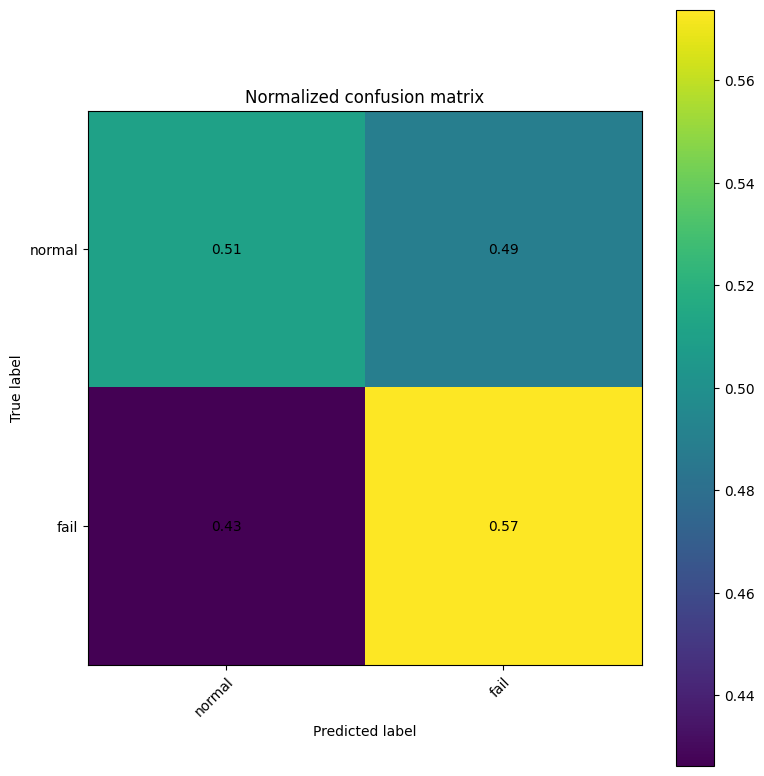

time: 1.35 s (started: 2023-11-07 15:47:29 +00:00)


In [ ]:
class_names= np.array( ['normal', 'fail'] )
plot_conf_mat(y_test, y_pred_lr, class_names)

In [ ]:
auc = roc_auc_score(y_test, y_pred_lr)
print("AUC on the test set:", auc)
accuracy = accuracy_score(y_test, y_pred_lr)
print("Accuracy:", accuracy)
# Precision
precision = precision_score(y_test, y_pred_lr)
print("Precision:", precision)
# Recall
recall = recall_score(y_test, y_pred_lr)
print("Recall:", recall)

AUC on the test set: 0.5400767199697145
Accuracy: 0.5391858612197595
Precision: 0.010357815442561206
Recall: 0.5409836065573771
time: 22.3 ms (started: 2023-11-07 14:50:42 +00:00)


### Drop the less correlated columns

In [ ]:
column_names = X_with_new_features.columns
print(column_names)

Index(['OP070_V_1_angle_value', 'OP090_SnapRingPeakForce_value',
       'OP070_V_2_angle_value', 'OP120_Rodage_I_mesure_value',
       'OP090_SnapRingFinalStroke_value', 'OP110_Vissage_M8_torque_value',
       'OP120_Rodage_U_mesure_value', 'OP110_Vissage_M8_angle_value',
       'torque_product', 'force_product', 'force_torque_ratio'],
      dtype='object')
time: 1.14 ms (started: 2023-11-07 17:44:54 +00:00)


In [ ]:
X_copy = X_with_new_features.copy()

time: 5.86 ms (started: 2023-11-07 17:45:01 +00:00)


Experiment dropping less contributive columns

In [ ]:
X_copy = X_copy.drop(columns=["OP110_Vissage_M8_torque_value","OP120_Rodage_U_mesure_value"])

time: 3.92 ms (started: 2023-11-07 17:45:03 +00:00)


In [ ]:
X_copy

OP070_V_1_angle_value  OP090_SnapRingPeakForce_value  \
0                      180.4                         190.51   
1                      138.7                         147.70   
2                      180.9                         150.87   
3                      173.5                         159.56   
4                      174.5                         172.29   
...                      ...                            ...   
34510                  158.2                         168.40   
34511                  139.4                         146.24   
34512                  165.5                         157.34   
34513                  152.4                         165.07   
34514                  197.8                         150.37   

       OP070_V_2_angle_value  OP120_Rodage_I_mesure_value  \
0                      173.1                       113.64   
1                      163.5                       109.77   
2                      181.2                       109.79   
3                      151.8                       113.25   
4                      177.5                       112.88   
...                      ...                          ...   
34510                  180.6                       110.65   
34511                  154.5                       108.14   
34512                  149.8                       112.77   
34513                  140.0                       111.19   
34514                  190.3                       113.81   

       OP090_SnapRingFinalStroke_value  OP110_Vissage_M8_angle_value  \
0                                12.04                          18.8   
1                                12.12                          18.5   
2                                11.86                          17.5   
3                                11.82                          15.6   
4                                12.07                          33.6   
...                                ...                           ...   
34510                            11.88                          14.8   
34511                            12.04                          15.5   
34512                            12.09                          24.4   
34513                            12.06                          13.6   
34514                            11.84                          21.5   

       torque_product  force_product  force_torque_ratio  
0             43.6920      2890.6794            3.995455  
1             41.0240      2218.2444            3.285938  
2             43.7582      2581.7743            3.904690  
3             43.7582      2583.6228            3.724660  
4             43.7582      2898.3318            4.420575  
...               ...            ...                 ...  
34510         43.6921      2373.2028            3.635401  
34511         41.0240      2116.9224            3.362500  
34512         43.8244      2104.6380            3.421450  
34513         43.5600      2102.1317            3.146970  
34514         42.8314      2714.8896            3.992447  

[34515 rows x 9 columns]

time: 40.7 ms (started: 2023-11-07 17:45:05 +00:00)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_copy, y, test_size=0.2, random_state=123, stratify=y)

time: 17.5 ms (started: 2023-11-07 17:45:10 +00:00)


In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

time: 11.9 ms (started: 2023-11-07 17:45:12 +00:00)


In [ ]:
smote = SMOTE()

X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)
pd.value_counts(y_train_balanced)


0    27368
1    27368
Name: Binar OP130_Resultat_Global_v, dtype: int64

time: 28.2 ms (started: 2023-11-07 17:45:13 +00:00)


In [ ]:
model = LogisticRegression(C=1)
model.fit(X_train_balanced, y_train_balanced)
X_test_scaled = scaler.transform(X_test)
y_pred = model.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.66      0.79      6842
           1       0.02      0.59      0.03        61

    accuracy                           0.65      6903
   macro avg       0.50      0.62      0.41      6903
weighted avg       0.99      0.65      0.78      6903

time: 192 ms (started: 2023-11-07 17:45:14 +00:00)


In [ ]:
# Probability prediction
y_prob = model.predict_proba(X_test_scaled)[:, 1]

# Set a new threshold
threshold = 0.48

# Reclassify instances based on the threshold
y_pred = (y_prob >= threshold).astype(int)

time: 8.23 ms (started: 2023-11-07 15:03:36 +00:00)


In [ ]:
accuracy_score(y_pred, y_test)

0.6544980443285529

time: 3.92 ms (started: 2023-11-07 17:45:22 +00:00)


In [ ]:
auc = roc_auc_score(y_test, y_pred)
print("AUC on the test set:", auc)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
# Precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)
# Recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

AUC on the test set: 0.6226177754563185
Accuracy: 0.6544980443285529
Precision: 0.015025041736227046
Recall: 0.5901639344262295
time: 20.5 ms (started: 2023-11-07 17:45:47 +00:00)


Normalized confusion matrix
[[0.65507162 0.34492838]
 [0.40983607 0.59016393]]


<Axes: title={'center': 'Normalized confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

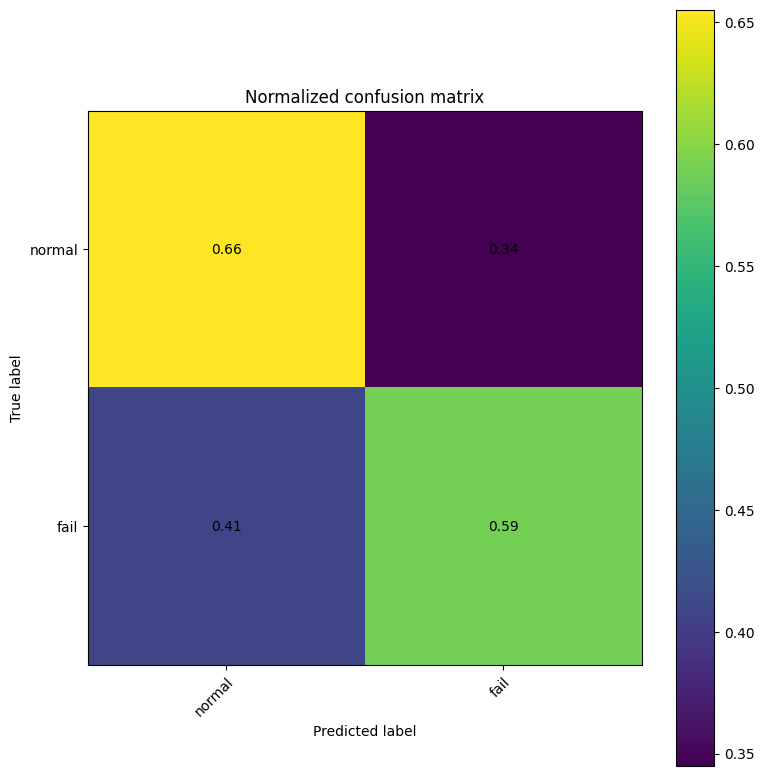

time: 370 ms (started: 2023-11-07 17:45:49 +00:00)


In [ ]:
class_names= np.array( ['normal', 'fail'] )
plot_conf_mat(y_test, y_pred, class_names)

In [ ]:
auc = roc_auc_score(y_test, y_pred)
print("AUC on the test set:", auc)

AUC on the test set: 0.6226177754563185
time: 5.35 ms (started: 2023-11-07 17:45:54 +00:00)


In [ ]:
k_fold = KFold(n_splits=100, shuffle=True, random_state=5)

# Create a parameter grid for hyperparameter tuning
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
    'solver': ['liblinear', 'lbfgs'],  # Solver for optimization
}

# Create a GridSearchCV object
grid_search = GridSearchCV(model_lr, param_grid, cv=k_fold, scoring='roc_auc', n_jobs=-1)

# Fit the grid search to your data
grid_search.fit(X_train_balanced, y_train_balanced)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)

# Get the best model
best_model = grid_search.best_estimator_


In [ ]:
model_lr_gs = grid_search.best_estimator_
model_lr_gs.fit(X_train_balanced, y_train_balanced)
y_pred_lr_gs = model_lr_gs.predict(X_test)
auc = roc_auc_score(y_test, y_pred_lr_gs )
print("AUC on the test set:", auc)

In [ ]:
class_names= np.array( ['normal', 'fail'] )
plot_conf_mat(y_test, y_pred_lr_gs, class_names)

## Random Forest


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_with_new_features, y, test_size=0.2, random_state=42, stratify=y)


time: 19.6 ms (started: 2023-11-07 17:45:59 +00:00)


In [ ]:
# Compute class weights to address class imbalance
from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)


time: 4.46 ms (started: 2023-11-07 17:46:00 +00:00)


In [ ]:
# Create and configure the Random Forest classifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(
    n_estimators=1000,               # Increase the number of trees
    max_depth=20,                  # Limit the depth of each tree (adjust as needed)
    max_leaf_nodes=16, # Each tree cannot have more than that
    class_weight='balanced',       # Use class weights to handle imbalance
    random_state= 0,
    criterion='gini',
    n_jobs=-1, # Use all the CPUs
    max_features = 'sqrt' # auto means=sqrt(n_features)
)

# Train the model
rf.fit(X_train, y_train)

# Make predictions
y_pred = rf.predict(X_test)

time: 24.6 s (started: 2023-11-07 17:46:02 +00:00)


In [ ]:
auc = roc_auc_score(y_test, y_pred)
print("AUC on the test set:", auc)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
# Precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)
# Recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

AUC on the test set: 0.6246292187597338
Accuracy: 0.8034188034188035
Precision: 0.02
Recall: 0.4426229508196721
time: 20.5 ms (started: 2023-11-07 17:46:26 +00:00)


Normalized confusion matrix
[[0.80663549 0.19336451]
 [0.55737705 0.44262295]]


<Axes: title={'center': 'Normalized confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

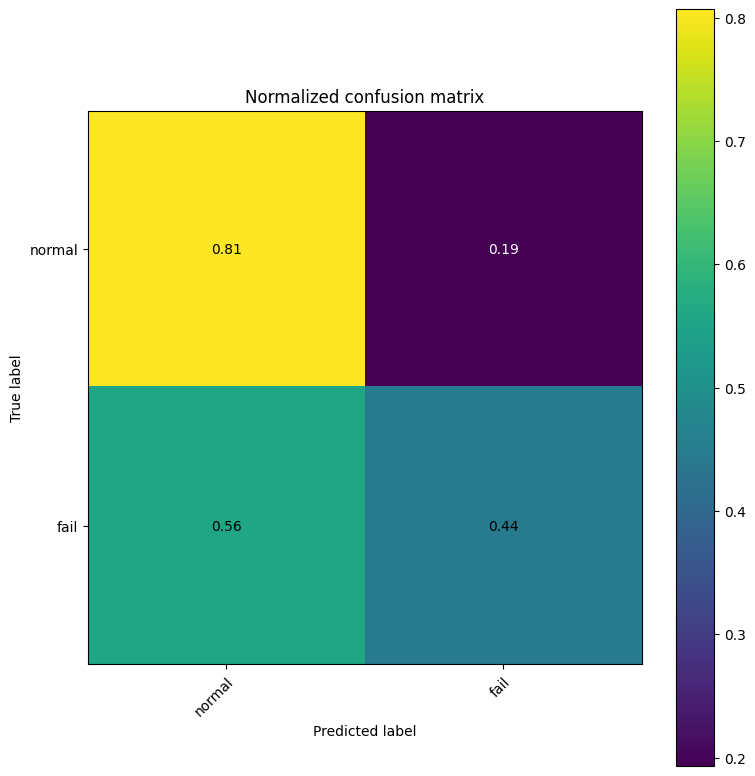

time: 376 ms (started: 2023-11-07 17:46:26 +00:00)


In [ ]:
class_names= np.array( ['normal', 'fail'] )
plot_conf_mat(y_test, y_pred, class_names)

In [ ]:
!pip install -U imbalanced-ensemble

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 746.5/746.5 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 87.5 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


time: 11.2 s (started: 2023-11-07 17:47:07 +00:00)


In [ ]:
from imbalanced_ensemble.ensemble import BalancedRandomForestClassifier

brf = BalancedRandomForestClassifier(n_estimators=1000, random_state=42,sampling_strategy='auto',)
brf.fit(X_train, y_train)

BalancedRandomForestClassifier(n_estimators=1000, random_state=42)

time: 19.1 s (started: 2023-11-07 17:47:18 +00:00)


Normalized confusion matrix
[[0.6691026  0.3308974 ]
 [0.39344262 0.60655738]]


<Axes: title={'center': 'Normalized confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

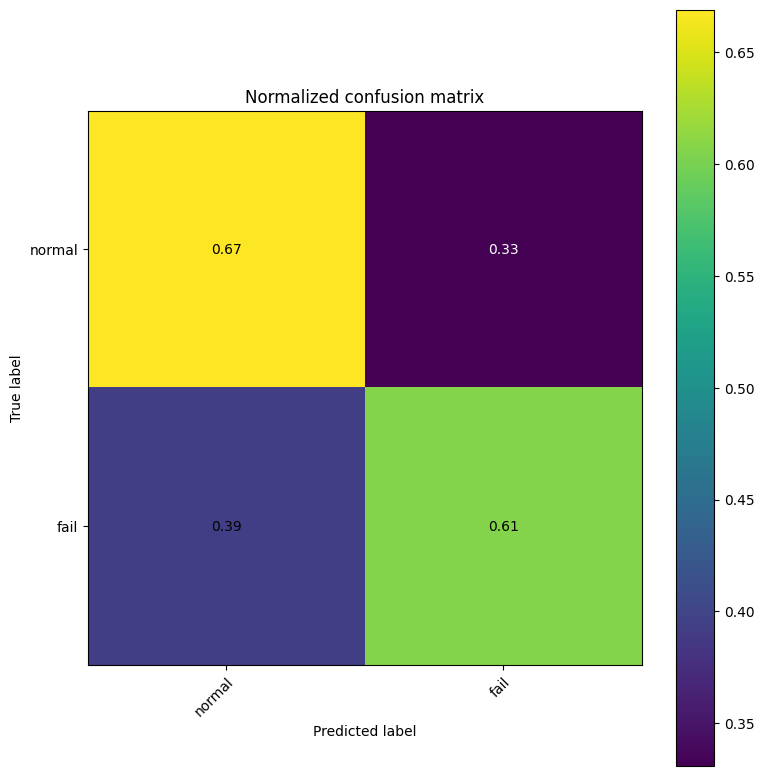

time: 2.26 s (started: 2023-11-07 17:47:37 +00:00)


In [ ]:
y_pred = brf.predict(X_test)
class_names= np.array( ['normal', 'fail'] )
plot_conf_mat(y_test, y_pred, class_names)

In [ ]:
auc = roc_auc_score(y_test, y_pred)
print("AUC on the test set:", auc)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
# Precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)
# Recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

AUC on the test set: 0.6378299893138331
Accuracy: 0.6685499058380414
Precision: 0.016079965232507605
Recall: 0.6065573770491803
time: 38.1 ms (started: 2023-11-07 17:48:10 +00:00)


In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X_dropped, y_dropped, test_size=0.2, random_state=42, stratify=y)
# df_dropped

time: 119 ms (started: 2023-10-31 09:24:35 +00:00)


In [ ]:
from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)


time: 18.9 ms (started: 2023-11-02 22:36:51 +00:00)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(
    n_estimators=1000,               # Increase the number of trees
    max_depth=20,                  # Limit the depth of each tree (adjust as needed)
    max_leaf_nodes=18, # Each tree cannot have more than that
    # class_weight='balanced',       # Use class weights to handle imbalance
    random_state= 42,
    criterion='gini',
    n_jobs=-1, # Use all the CPUs
    max_features = 'sqrt' # auto means=sqrt(n_features)
)
smote = SMOTE()
X_train, y_train = smote.fit_resample(X_train, y_train)
# Train the model
rf.fit(X_train, y_train)

# Make predictions
y_pred = rf.predict(X_test)

KeyboardInterrupt: ignored

time: 58.6 s (started: 2023-11-07 10:52:15 +00:00)


In [ ]:
auc = roc_auc_score(y_test, y_pred)
print("AUC on the test set:", auc)

In [ ]:
class_names= np.array( ['normal', 'fail'] )
plot_conf_mat(y_test, y_pred, class_names)

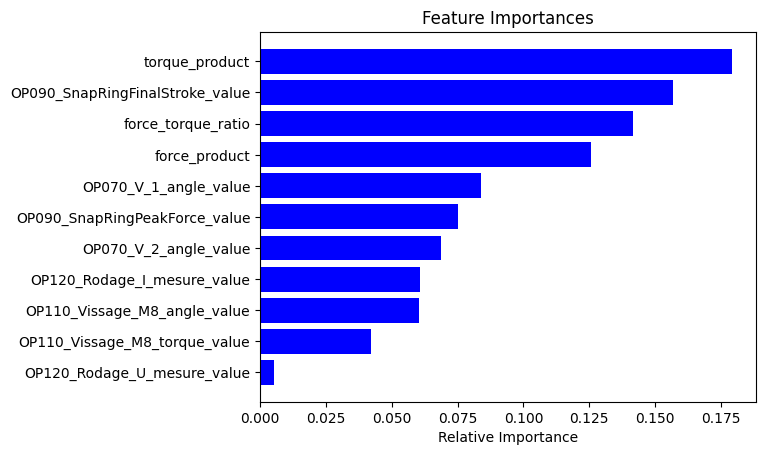

Index(['OP070_V_1_angle_value', 'OP090_SnapRingPeakForce_value',
       'OP070_V_2_angle_value', 'OP120_Rodage_I_mesure_value',
       'OP090_SnapRingFinalStroke_value', 'OP110_Vissage_M8_torque_value',
       'OP120_Rodage_U_mesure_value', 'OP110_Vissage_M8_angle_value',
       'torque_product', 'force_product', 'force_torque_ratio'],
      dtype='object')

time: 386 ms (started: 2023-11-07 17:48:20 +00:00)


In [ ]:
from visualization import  plot_feature_importances

feature_names = X_test.columns
plot_feature_importances(rf.feature_importances_, feature_names)
feature_names


In [ ]:
from sklearn.feature_selection import SelectFromModel
threshold = 0.04  # Adjust this threshold as needed

sfm = SelectFromModel(rf, threshold=threshold)
sfm.fit(X_train, y_train)

X_train_selected = sfm.transform(X_train)
X_test_selected = sfm.transform(X_test)

In [ ]:
# Train the model
rf.fit(X_train_selected, y_train)

# Make predictions
y_pred = rf.predict(X_test_selected)

In [ ]:
auc = roc_auc_score(y_test, y_pred)
print("AUC on the test set:", auc)

In [ ]:
class_names = np.array( ['normal', 'fail'] )
plot_conf_mat(y_test, y_pred, class_names)

### Balanced Random Forest

In [ ]:
from imblearn.ensemble import BalancedRandomForestClassifier

brf = BalancedRandomForestClassifier(n_estimators=1000, random_state=42)

brf.fit(X_train, y_train)

y_pred = brf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

time: 16.9 s (started: 2023-10-31 10:46:47 +00:00)


In [ ]:
auc = roc_auc_score(y_test, y_pred)
print("AUC on the test set:", auc)

AUC on the test set: 0.6456613203885356
time: 6.83 ms (started: 2023-10-31 10:47:07 +00:00)


Normalized confusion matrix
[[0.66837182 0.33162818]
 [0.37704918 0.62295082]]


<Axes: title={'center': 'Normalized confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

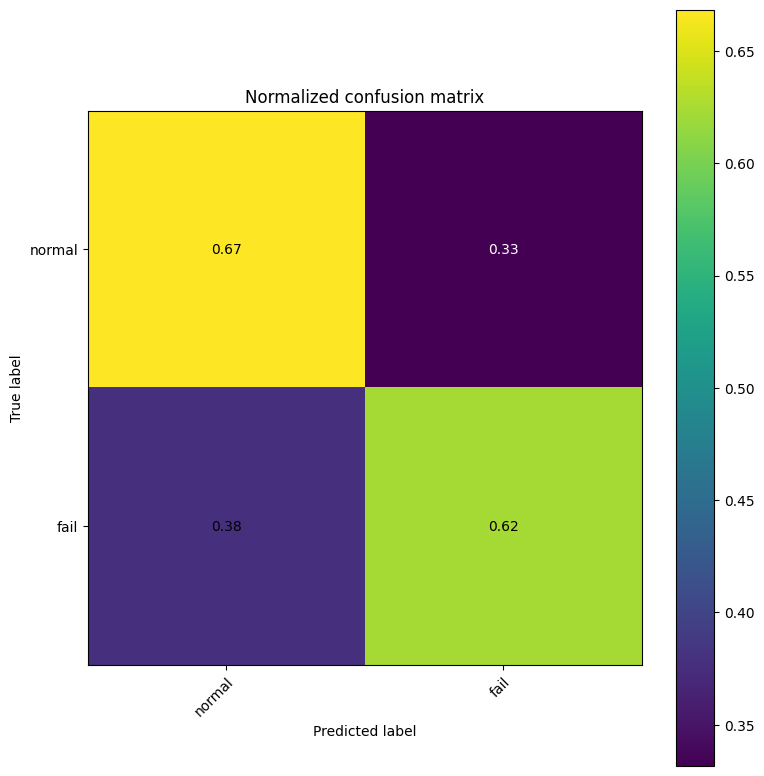

time: 671 ms (started: 2023-10-31 10:47:09 +00:00)


In [ ]:
class_names= np.array( ['normal', 'fail'] )
plot_conf_mat(y_test, y_pred, class_names)

### New features based on physics and same mounting station

In [ ]:
X_new = pd.DataFrame()

time: 1.37 ms (started: 2023-11-07 15:07:57 +00:00)


In [ ]:
# Group features by their first 4 letters
groups = X.groupby(X.columns.str[:5], axis=1)

time: 1.71 ms (started: 2023-11-07 15:07:54 +00:00)


In [ ]:
print(groups.get_group('OP070'))

       OP070_V_1_angle_value  OP070_V_2_angle_value  OP070_V_1_torque_value  \
0                      180.4                  173.1                    6.62   
1                      138.7                  163.5                    6.41   
2                      180.9                  181.2                    6.62   
3                      173.5                  151.8                    6.62   
4                      174.5                  177.5                    6.62   
...                      ...                    ...                     ...   
34510                  158.2                  180.6                    6.61   
34511                  139.4                  154.5                    6.41   
34512                  165.5                  149.8                    6.62   
34513                  152.4                  140.0                    6.60   
34514                  197.8                  190.3                    6.47   

       OP070_V_2_torque_value  
0                  

In [ ]:
X_new['Work_0P070_1'] = X['OP070_V_1_angle_value'] * X['OP070_V_1_torque_value']


time: 5.22 ms (started: 2023-11-07 15:07:58 +00:00)


In [ ]:
X_new['Work_0P070_2'] =  X['OP070_V_2_angle_value'] * X['OP070_V_2_torque_value']


time: 6.52 ms (started: 2023-11-07 15:05:27 +00:00)


In [ ]:
X_new.head()


Work_0P070_1  Work_0P070_2
0      1194.248      1142.460
1       889.067      1046.400
2      1197.558      1197.732
3      1148.570      1003.398
4      1155.190      1173.275

time: 10.5 ms (started: 2023-11-07 15:05:28 +00:00)


In [ ]:
print(groups.get_group('OP090'))

       OP090_SnapRingPeakForce_value  OP090_SnapRingFinalStroke_value  \
0                             190.51                            12.04   
1                             147.70                            12.12   
2                             150.87                            11.86   
3                             159.56                            11.82   
4                             172.29                            12.07   
...                              ...                              ...   
34510                         168.40                            11.88   
34511                         146.24                            12.04   
34512                         157.34                            12.09   
34513                         165.07                            12.06   
34514                         150.37                            11.84   

       OP090_StartLinePeakForce_value  OP090_SnapRingMidPointForce_val  
0                               26.37             

In [ ]:
# Calculate the average force (N)
X_new['Average_Force'] = (X['OP090_StartLinePeakForce_value'] + X['OP090_SnapRingMidPointForce_val'] + X['OP090_SnapRingPeakForce_value']) / 3

# Use 'OP090_SnapRingFinalStroke_value' as the stroke distance (meters)
X_new['Stroke_Distance'] = X['OP090_SnapRingFinalStroke_value']

# Calculate work done (Joules)
X_new['Work_Done_OP090'] = X_new['Average_Force'] * X_new['Stroke_Distance']

time: 6.02 ms (started: 2023-11-02 21:52:21 +00:00)


In [ ]:
X_new.head()

Work_0P070  Average_Force  Stroke_Distance  Work_Done_OP090
0    2336.708     108.833333            12.04      1310.353333
1    1935.467      91.403333            12.12      1107.808400
2    2395.290      92.236667            11.86      1093.926867
3    2151.968      96.373333            11.82      1139.132800
4    2328.465     100.233333            12.07      1209.816333

time: 18.4 ms (started: 2023-11-02 21:52:30 +00:00)


In [ ]:
print(groups.get_group('OP110'))

       OP110_Vissage_M8_torque_value  OP110_Vissage_M8_angle_value
0                              12.16                          18.8
1                              12.19                          18.5
2                              12.24                          17.5
3                              12.35                          15.6
4                              12.19                          33.6
...                              ...                           ...
34510                          12.23                          14.8
34511                          12.27                          15.5
34512                          12.17                          24.4
34513                          12.34                          13.6
34514                          12.23                          21.5

[34515 rows x 2 columns]
time: 28.3 ms (started: 2023-11-02 21:16:32 +00:00)


In [ ]:
X_new['Work_0P110'] = X['OP110_Vissage_M8_torque_value'] * X['OP110_Vissage_M8_angle_value']

time: 5.03 ms (started: 2023-11-02 21:53:21 +00:00)


In [ ]:
print(groups.get_group('OP120'))

       OP120_Rodage_I_mesure_value  OP120_Rodage_U_mesure_value
0                           113.64                        11.97
1                           109.77                        11.97
2                           109.79                        11.97
3                           113.25                        11.97
4                           112.88                        11.97
...                            ...                          ...
34510                       110.65                        11.98
34511                       108.14                        11.97
34512                       112.77                        11.97
34513                       111.19                        11.97
34514                       113.81                        11.97

[34515 rows x 2 columns]
time: 14 ms (started: 2023-11-02 21:16:50 +00:00)


In [ ]:
X_new['Electrical_Power'] = X['OP120_Rodage_U_mesure_value'] * X['OP120_Rodage_I_mesure_value']

time: 12.1 ms (started: 2023-11-02 21:55:18 +00:00)


In [ ]:
X_new.head()

Work_0P070  Average_Force  Stroke_Distance  Work_Done_OP090  Work_0P110  \
0    2336.708     108.833333            12.04      1310.353333     228.608   
1    1935.467      91.403333            12.12      1107.808400     225.515   
2    2395.290      92.236667            11.86      1093.926867     214.200   
3    2151.968      96.373333            11.82      1139.132800     192.660   
4    2328.465     100.233333            12.07      1209.816333     409.584   

   Electrical_Power  
0         1360.2708  
1         1313.9469  
2         1314.1863  
3         1355.6025  
4         1351.1736

time: 40.9 ms (started: 2023-11-02 21:55:26 +00:00)


In [ ]:
df_new = pd.concat([X_new, y], axis=1)

# Calculate the correlation between X_new features and y
correlation_with_y = df_new.corr()[y.name]

# Display or print the correlation coefficients
print(correlation_with_y)

Work_0P070                      -0.019499
Average_Force                    0.002579
Stroke_Distance                  0.015148
Work_Done_OP090                  0.006079
Work_0P110                       0.005451
Electrical_Power                 0.003682
Work_0P070_1                    -0.018288
Work_0P070_2                    -0.012089
Binar OP130_Resultat_Global_v    1.000000
Name: Binar OP130_Resultat_Global_v, dtype: float64
time: 48.6 ms (started: 2023-11-02 22:28:30 +00:00)


In [ ]:
X_new.head()

Average_Force  Stroke_Distance  Work_Done_OP090  Work_0P110  \
0     108.833333            12.04      1310.353333     228.608   
1      91.403333            12.12      1107.808400     225.515   
2      92.236667            11.86      1093.926867     214.200   
3      96.373333            11.82      1139.132800     192.660   
4     100.233333            12.07      1209.816333     409.584   

   Electrical_Power  Work_0P070_1  Work_0P070_2  
0         1360.2708      1194.248      1142.460  
1         1313.9469       889.067      1046.400  
2         1314.1863      1197.558      1197.732  
3         1355.6025      1148.570      1003.398  
4         1351.1736      1155.190      1173.275

time: 48.8 ms (started: 2023-11-02 22:29:26 +00:00)


In [ ]:
X_new.drop('Work_0P070', axis=1, inplace=True)

time: 13.9 ms (started: 2023-11-02 22:29:24 +00:00)


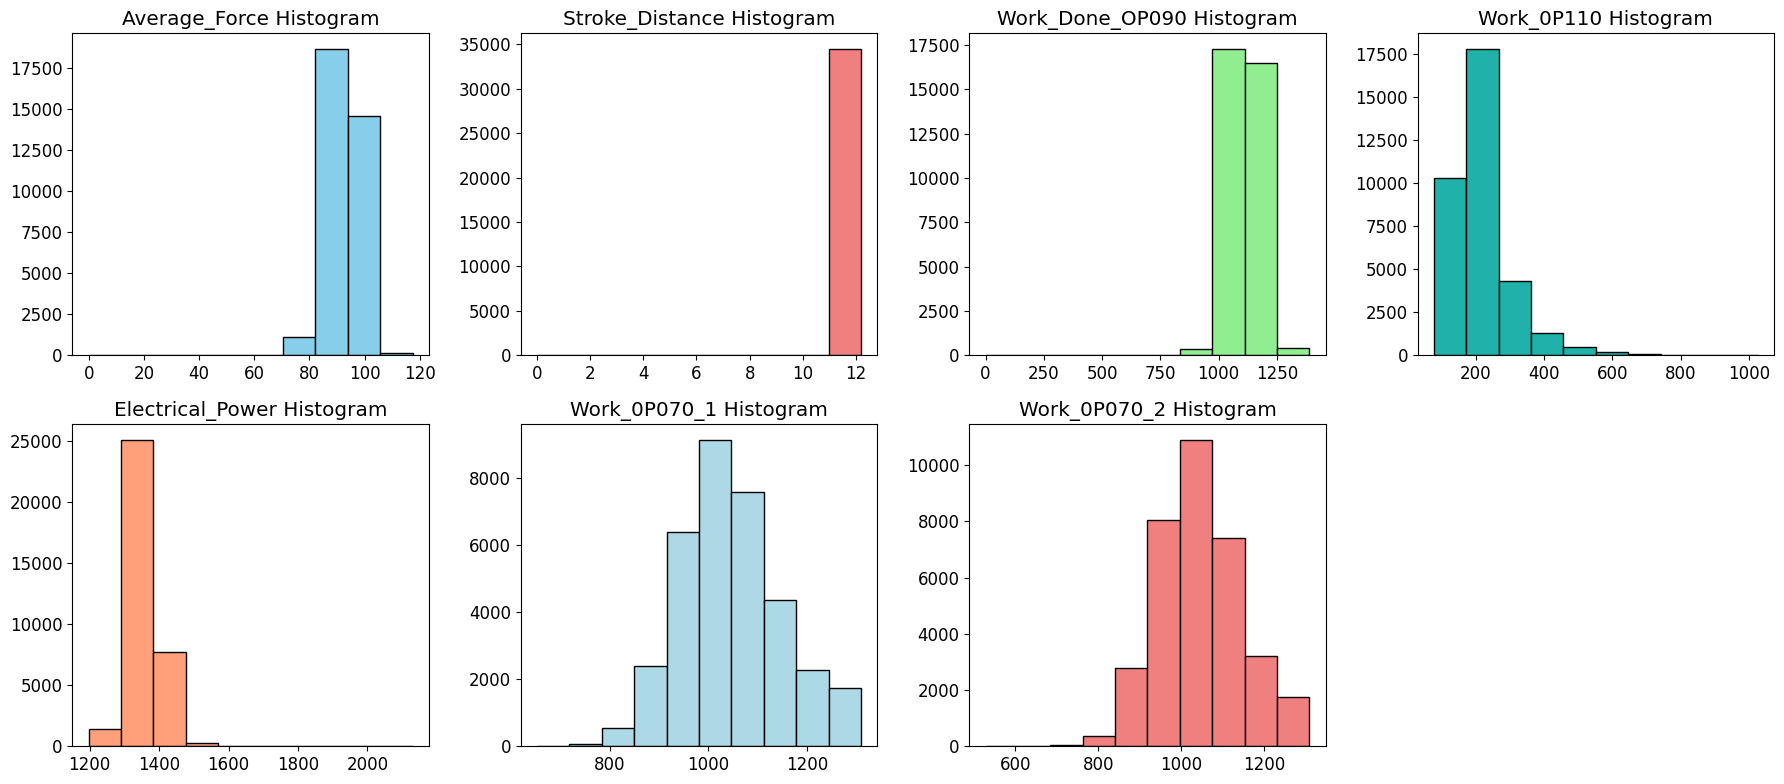

time: 4.59 s (started: 2023-11-02 22:31:18 +00:00)


In [ ]:
# Define your data for the specified columns
Average_Force = X_new['Average_Force']
Stroke_Distance = X_new['Stroke_Distance']
Work_Done_OP090 = X_new['Work_Done_OP090']
Work_0P110 = X_new['Work_0P110']
Electrical_Power = X_new['Electrical_Power']
Work_0P070_1 = X_new['Work_0P070_1']
Work_0P070_2 = X_new['Work_0P070_2']

# Create subplots for each histogram
fig, axes = plt.subplots(2, 4, figsize=(18, 8))

# Create histograms for each feature with titles
axes[0, 0].hist(Average_Force, bins=10, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Average_Force Histogram')

axes[0, 1].hist(Stroke_Distance, bins=10, color='lightcoral', edgecolor='black')
axes[0, 1].set_title('Stroke_Distance Histogram')

axes[0, 2].hist(Work_Done_OP090, bins=10, color='lightgreen', edgecolor='black')
axes[0, 2].set_title('Work_Done_OP090 Histogram')

axes[0, 3].hist(Work_0P110, bins=10, color='lightseagreen', edgecolor='black')
axes[0, 3].set_title('Work_0P110 Histogram')

axes[1, 0].hist(Electrical_Power, bins=10, color='lightsalmon', edgecolor='black')
axes[1, 0].set_title('Electrical_Power Histogram')

axes[1, 1].hist(Work_0P070_1, bins=10, color='lightblue', edgecolor='black')
axes[1, 1].set_title('Work_0P070_1 Histogram')

axes[1, 2].hist(Work_0P070_2, bins=10, color='lightcoral', edgecolor='black')
axes[1, 2].set_title('Work_0P070_2 Histogram')

# Hide the empty subplot
axes[1, 3].axis('off')

# Show the histograms
plt.tight_layout()
plt.show()

In [ ]:
X_dropped.head()

OP070_V_1_angle_value  OP090_SnapRingPeakForce_value  \
0                  180.4                         190.51   
1                  138.7                         147.70   
2                  180.9                         150.87   
3                  173.5                         159.56   
4                  174.5                         172.29   

   OP070_V_2_angle_value  OP120_Rodage_I_mesure_value  \
0                  173.1                       113.64   
1                  163.5                       109.77   
2                  181.2                       109.79   
3                  151.8                       113.25   
4                  177.5                       112.88   

   OP090_SnapRingFinalStroke_value  OP110_Vissage_M8_torque_value  \
0                            12.04                          12.16   
1                            12.12                          12.19   
2                            11.86                          12.24   
3                            11.82                          12.35   
4                            12.07                          12.19   

   OP120_Rodage_U_mesure_value  OP070_V_1_torque_value  \
0                        11.97                    6.62   
1                        11.97                    6.41   
2                        11.97                    6.62   
3                        11.97                    6.62   
4                        11.97                    6.62   

   OP090_StartLinePeakForce_value  OP110_Vissage_M8_angle_value  \
0                           26.37                          18.8   
1                           21.03                          18.5   
2                           25.81                          17.5   
3                           24.62                          15.6   
4                           29.22                          33.6   

   OP090_SnapRingMidPointForce_val  OP070_V_2_torque_value  
0                           109.62                    6.60  
1                           105.48                    6.40  
2                           100.03                    6.61  
3                           104.94                    6.61  
4                            99.19                    6.61

time: 36.4 ms (started: 2023-11-07 15:06:07 +00:00)


In [ ]:
# Separate target variable Y from features X
features_list = list(df.columns[0:-1])
target_variable = 'Binar OP130_Resultat_Global_v'

X = df.loc[:,features_list]
y = df.loc[:,target_variable]

time: 16.2 ms (started: 2023-11-02 22:58:17 +00:00)
